### Section Import and view data

##### Steps
. Import data
. Separate label from input
. Visualize input
. gray scale image if required
. separate test-train split
. train model
. predict and evaluate

In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc as smp
import tensorflow as tf

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.head(3)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  

[3 rows x 785 columns]

In [4]:
df.shape

(42000, 785)

In [5]:
y_train = df.label
df.drop(['label'],axis=1, inplace=True)
x_train = df.values
x_test = df_test.values

In [6]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [7]:
from sklearn.preprocessing import OneHotEncoder

#One hot encode label column. So now our y vector contains number and yhot will contain one hot encoded values
onehot_encoder = OneHotEncoder(sparse = False)
yhot = onehot_encoder.fit_transform(y_train.values.reshape(-1,1))
print(yhot.shape)

(42000, 10)


In [8]:
print(yhot)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
y_train[3]

4

In [10]:
df.shape

(42000, 784)

#### Reshaping and Normalizing the Images

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (42000, 28, 28, 1)
Number of images in x_train 42000
Number of images in x_test 28000


#### Building the CNN

In [12]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


#### Compiling and Fitting the Model

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, batch_size = 100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
42000/42000 [==============================] - 12s 287us/step - loss: 0.2995 - acc: 0.9123
Epoch 2/10
42000/42000 [==============================] - 12s 291us/step - loss: 0.1161 - acc: 0.9645
Epoch 3/10
42000/42000 [==============================] - 12s 282us/step - loss: 0.0779 - acc: 0.9763
Epoch 4/10
42000/42000 [==============================] - 12s 295us/step - loss: 0.0591 - acc: 0.9823
Epoch 5/10
42000/42000 [==============================] - 12s 286us/step - loss: 0.0461 - acc: 0.9857
Epoch 6/10
42000/42000 [==============================] - 12s 286us/step - loss: 0.0361 - acc: 0.9879
Epoch 7/10
42000/42000 [==============================] - 12s 284us/step - loss: 0.0296 - acc: 0.9908
Epoch 8/10
42000/42000 [==============================] - 12s 281us/step - loss: 0.0233 - acc: 0.9925
Epoch 9/10
42000/42000 [==============================] - 12s 282us/step - loss: 0.0217 - acc: 0.9927
Epoch 10/10
42000/42000 [=========

#### Evaluate the model

In [14]:
model.evaluate(x_train, y_train)

42000/42000 [==============================] - 4s 97us/step


[0.006249266468804784, 0.9987380952380952]

0


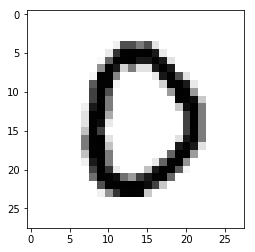

In [18]:
image_index = 19
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
#pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
#print(pred.argmax())

#### Make prediction

In [37]:
# Column in result file Id	Label
# read sample file
sub_lr = pd.read_csv('sample_submission.csv')

# Iterate over all sample records and predict the digit
for image_index in range(len(x_test)):
    pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
    
    # Each row will have the probabity of digit ranging from 0-9, take the max probability one. 
    sub_lr['Label'][image_index] = pred.argmax()

# write the result column in csv
sub_lr.to_csv('MNSIT_Pred.csv', index=False)

[[7.1141910e-09 7.7275225e-13 9.9999893e-01 1.1118746e-06 2.2832474e-11
  3.9543341e-11 3.6896831e-12 3.2390115e-09 2.7762765e-09 8.4073991e-13]]
[[8.6735398e-01 1.0703366e-06 3.0168441e-05 8.9084751e-06 6.3684778e-13
  1.3240902e-01 1.5068849e-08 3.4796324e-07 1.9314533e-04 3.4089198e-06]]
[[3.3630870e-10 2.3791533e-09 5.5261035e-07 5.0015399e-07 8.2192776e-07
  1.3037581e-09 1.3664979e-10 9.8012976e-08 1.3570813e-06 9.9999666e-01]]
[[3.0877653e-01 2.1997259e-08 4.2321078e-02 5.6909522e-07 1.7537796e-03
  1.1288350e-08 1.5454374e-05 7.4279960e-05 1.2499175e-06 6.4705706e-01]]
[[1.4347319e-10 2.8301262e-08 2.6748991e-03 9.9728405e-01 2.1783218e-12
  7.3047858e-07 4.2357446e-09 4.0063565e-08 4.0302253e-05 3.5824971e-08]]
[[4.2324109e-07 1.5137459e-10 1.7357196e-07 1.4688887e-07 8.3672376e-07
  1.6282415e-08 2.2657509e-09 9.6091652e-01 2.5344613e-07 3.9081637e-02]]
[[9.9994707e-01 1.9837361e-09 5.2976575e-05 4.6718181e-11 3.4205399e-14
  1.1614388e-13 3.8274877e-09 6.8516476e-10 8.126897

[[2.6088314e-11 7.6199733e-08 9.9999988e-01 2.1507022e-08 1.0987585e-15
  7.8094052e-14 9.2651381e-12 1.8441592e-09 3.6361696e-09 1.2068290e-14]]
[[7.4056038e-06 3.9946194e-06 7.8416502e-07 6.4021683e-06 3.6297843e-07
  2.4370569e-05 1.0045860e-02 1.7384872e-08 9.8970491e-01 2.0589522e-04]]
[[4.0373695e-09 1.1159570e-09 3.6164869e-09 6.6813993e-10 9.9998713e-01
  5.9948533e-08 8.3730788e-07 3.4779365e-08 6.8420632e-06 5.1740076e-06]]
[[4.4765125e-10 1.9774211e-06 8.6557293e-08 9.9991941e-01 1.6610559e-15
  7.0617825e-05 2.9541364e-10 1.9793756e-10 5.6081640e-06 2.4408719e-06]]
[[9.2832312e-15 3.3829716e-12 5.9890846e-16 8.9054976e-07 5.0976274e-16
  9.9999917e-01 1.7358235e-12 1.0782820e-13 4.5450178e-11 5.5127654e-08]]
[[1.11416874e-07 3.06802983e-09 5.37988967e-07 1.57264424e-08
  2.97349948e-06 1.36047811e-06 9.99994159e-01 1.39901532e-13
  8.46769410e-07 1.52860770e-13]]
[[4.3137896e-11 2.0301159e-09 2.5589639e-10 3.0931346e-03 6.4555829e-17
  9.9686724e-01 9.1648761e-10 1.0937420e

[[1.0348269e-09 4.8781985e-11 5.4565358e-10 4.0786130e-13 9.8545074e-01
  1.3893394e-12 4.0052551e-08 1.4003340e-02 9.2862507e-07 5.4492126e-04]]
[[9.0984329e-12 5.6078479e-06 1.7055701e-10 3.5011538e-04 1.4867650e-10
  9.9895859e-01 2.3616677e-07 4.1944449e-15 5.7222283e-06 6.7976705e-04]]
[[4.3007145e-10 9.9999642e-01 2.6974960e-06 3.8551686e-08 3.8752566e-09
  7.0556605e-09 1.3963063e-07 5.1867494e-07 2.0442407e-07 4.5121290e-12]]
[[6.0137903e-13 4.8802937e-11 3.8731983e-11 6.7314405e-13 9.9999452e-01
  2.0884605e-12 2.4518885e-11 1.5279819e-09 2.1663538e-10 5.4732263e-06]]
[[1.8202841e-10 1.0473999e-06 1.3950415e-08 7.2692428e-03 5.3065280e-16
  9.9272960e-01 2.9680516e-09 1.1373755e-08 1.4165381e-07 2.9706525e-08]]
[[2.1998396e-06 6.4572974e-09 5.1524732e-03 4.4476658e-09 6.9835619e-07
  9.3964536e-10 9.9484456e-01 4.8913945e-10 7.4156801e-09 3.5339229e-09]]
[[4.27584301e-10 7.02823309e-06 9.14462362e-07 9.99861360e-01
  1.10093754e-10 1.28854022e-04 1.47857056e-11 5.77702508e-09


[[3.6996425e-08 3.2682214e-14 3.2907221e-06 5.4863514e-09 2.9449886e-06
  2.0245475e-08 9.9862284e-13 3.2634723e-08 2.1886194e-08 9.9999368e-01]]
[[5.9809748e-09 3.4082552e-06 1.3596030e-05 9.9990141e-01 3.4148384e-09
  3.7138456e-05 4.3901953e-09 1.3050520e-07 4.6062614e-06 3.9538056e-05]]
[[3.0139962e-03 3.3092801e-05 2.4171561e-06 2.5852592e-04 2.1170261e-09
  1.0778723e-02 5.0686864e-04 8.9249301e-07 9.8539978e-01 5.6967256e-06]]
[[1.7214671e-09 2.5407792e-12 5.8503555e-13 7.9869084e-11 2.1670884e-16
  9.8299628e-01 1.6993707e-02 7.4119296e-15 1.0073831e-05 6.2940875e-10]]
[[8.6783740e-12 3.0675247e-09 4.2677506e-12 4.8126582e-05 1.0364344e-16
  9.9995160e-01 4.9530646e-09 2.9295573e-11 2.6688149e-09 1.9883667e-07]]
[[9.9994254e-01 7.9884730e-06 4.6042969e-05 7.8969548e-10 9.0231134e-10
  3.4822067e-13 3.6428979e-08 8.5478270e-08 3.2886526e-06 2.0711311e-13]]
[[3.0699028e-17 9.1747655e-16 4.8371832e-14 1.7664529e-15 1.0000000e+00
  6.6086452e-14 2.3306688e-11 1.6067090e-11 1.649376

[[5.5238520e-06 3.6633303e-08 9.1256801e-08 7.1940448e-08 5.6071702e-04
  1.2962780e-08 2.5219397e-06 9.9899215e-01 4.4581577e-07 4.3839373e-04]]
[[1.1773228e-12 3.0982130e-05 2.4953371e-08 9.9996865e-01 5.4403478e-15
  1.2468639e-08 2.5941494e-13 8.3011326e-10 1.1787683e-07 2.5052697e-07]]
[[9.9997294e-01 1.1937056e-08 3.1226464e-06 6.1323294e-07 1.0505190e-06
  1.7510062e-06 7.3358929e-06 1.7270665e-08 9.5314699e-06 3.5959233e-06]]
[[2.6685110e-13 1.7871673e-06 9.9999797e-01 3.4349249e-08 1.4764717e-20
  2.3470412e-14 1.4079126e-14 2.0298495e-08 1.8014788e-07 6.0484212e-18]]
[[3.1221686e-13 6.1732897e-12 3.9750008e-09 6.9630005e-08 5.2495036e-13
  7.0669074e-08 1.1038152e-10 5.7225325e-11 9.9999988e-01 4.2977280e-10]]
[[2.6703935e-17 4.3521231e-07 9.9999952e-01 2.8311958e-10 1.4635023e-22
  1.7505397e-16 1.6292265e-15 1.6744337e-09 1.0737724e-11 3.3085913e-20]]
[[9.9999917e-01 5.4086140e-08 7.5072450e-07 9.8076891e-10 2.3523951e-14
  3.7492040e-08 2.7949726e-10 5.1892151e-08 1.015519

[[2.8519470e-11 2.0999281e-07 1.4434378e-06 9.9462390e-01 2.2994651e-13
  4.9769813e-03 3.5420018e-11 1.1658887e-08 3.9741644e-04 3.4204557e-08]]
[[3.5674340e-08 7.6086446e-12 8.3608267e-09 7.1056341e-11 4.1771355e-09
  2.9359758e-11 1.0000000e+00 7.9567707e-17 5.0411608e-10 1.0579969e-15]]
[[3.2726934e-09 7.7262973e-07 1.2096069e-06 9.9931026e-01 5.6293588e-11
  6.8641937e-04 2.6145008e-08 9.8213820e-07 3.7537689e-07 4.6603932e-10]]
[[1.6563588e-09 4.2991186e-10 6.6689068e-08 1.7120534e-05 2.3115122e-06
  6.5073897e-09 2.1789187e-11 9.1552304e-04 6.1002280e-05 9.9900395e-01]]
[[1.1467124e-13 1.7839496e-13 2.5247773e-12 2.7306509e-14 1.0000000e+00
  4.1254434e-11 2.6743444e-10 3.7361843e-09 6.1237720e-10 2.9106996e-08]]
[[2.6377163e-15 1.1054725e-08 4.5368871e-08 1.0000000e+00 4.3984039e-14
  7.6122415e-09 2.6948805e-19 8.5763459e-11 1.0404705e-11 6.3929634e-15]]
[[4.5162132e-03 8.2425810e-05 1.0107341e-03 8.9703184e-03 6.4606678e-07
  6.6684916e-05 5.9021874e-03 8.6462518e-07 9.787935

[[1.04822005e-10 2.74323993e-13 1.40442158e-10 5.99288725e-08
  4.32589644e-07 1.30316756e-11 2.78094041e-12 9.21598428e-07
  8.60102489e-10 9.99998569e-01]]
[[5.6891909e-06 2.3683175e-09 5.7972713e-05 6.9480408e-03 4.2912163e-10
  6.9083366e-09 4.5918191e-12 8.0782145e-02 4.5579200e-06 9.1220164e-01]]
[[2.0650817e-09 9.9999654e-01 7.1783901e-08 3.9328985e-09 1.1995058e-08
  5.2942926e-09 1.7418429e-07 2.7464112e-06 4.5920081e-07 5.2707133e-10]]
[[2.59345549e-11 9.99999523e-01 1.40187915e-08 1.27275461e-08
  1.58621105e-09 2.75609713e-09 5.54936097e-09 4.36378940e-07
  2.47970924e-08 5.99795325e-10]]
[[2.2035013e-13 2.3901110e-11 1.2059974e-08 9.9999988e-01 2.3511655e-16
  4.5324731e-09 1.7039341e-15 7.7840089e-13 1.1944205e-07 5.0709079e-11]]
[[2.5117800e-10 1.4451142e-05 2.1512690e-06 9.9998200e-01 4.4029481e-11
  1.1838600e-06 1.6831954e-11 2.7287240e-07 5.4504110e-08 1.7134832e-10]]
[[3.9795891e-09 9.9999571e-01 1.0145408e-06 1.9307623e-07 9.1111167e-07
  4.3006975e-07 1.1893505e-0

[[3.6575694e-11 9.4835893e-12 1.8605273e-06 1.4106958e-09 8.8068844e-18
  1.0138413e-15 1.7058097e-16 9.9999809e-01 7.3535461e-10 2.8584644e-09]]
[[2.3340396e-12 5.0979266e-11 1.7260195e-12 2.8790159e-09 3.4094934e-05
  1.4865257e-09 2.2157342e-11 2.4599947e-07 1.2284732e-08 9.9996567e-01]]
[[1.21945495e-05 2.99211003e-08 1.67013422e-01 1.69524611e-07
  8.64735991e-02 1.06717962e-07 7.46490538e-01 5.57782605e-11
  9.93616231e-06 5.50780558e-12]]
[[1.84407938e-08 4.75846515e-11 2.73704037e-09 1.06324055e-11
  6.47276843e-10 5.29364463e-09 1.00000000e+00 4.47921322e-14
  2.06606948e-13 9.28219047e-12]]
[[8.7677397e-20 1.5686412e-09 3.5153856e-14 1.0000000e+00 1.1804738e-16
  3.5648962e-12 7.1886026e-21 1.0047966e-12 2.5019823e-12 2.0924033e-12]]
[[6.6158991e-17 3.8842797e-11 1.7046725e-11 1.0000000e+00 3.7822170e-16
  1.3065504e-09 1.5350070e-16 2.1340841e-15 7.8957259e-09 3.2137599e-09]]
[[4.3491141e-10 7.7172380e-10 9.9998176e-01 1.8071574e-05 4.9550730e-10
  7.4971440e-10 5.7440008e-1

[[3.0452164e-12 2.5896822e-08 7.8356897e-14 4.4825188e-06 1.1346751e-14
  9.9996114e-01 3.0149845e-08 7.2851541e-16 6.9099698e-08 3.4152708e-05]]
[[8.4212991e-11 5.3358529e-10 1.6318521e-11 8.0983069e-09 3.5272296e-05
  9.6982186e-11 2.8728406e-12 9.5814676e-07 3.5850782e-09 9.9996376e-01]]
[[6.0041895e-11 9.9999976e-01 2.0926464e-08 1.5526147e-09 4.0880033e-10
  8.4705523e-09 9.4992059e-09 1.9136066e-07 4.1545847e-09 8.1633374e-11]]
[[9.2292653e-11 9.9999964e-01 6.1193745e-08 2.5125194e-10 1.7551330e-09
  5.2455468e-10 6.5105006e-08 1.5153717e-07 4.3616076e-08 3.8790273e-12]]
[[1.16164283e-12 4.20514601e-09 1.76140915e-08 1.00000000e+00
  6.10288797e-14 1.71022769e-08 1.14935757e-13 2.10408926e-12
  1.19569075e-08 6.04909589e-09]]
[[9.5526784e-06 1.6252969e-07 6.1331307e-06 1.0620140e-10 7.4533524e-08
  1.6268824e-10 9.9998391e-01 1.5282323e-07 4.8237972e-12 7.2995263e-11]]
[[5.4570208e-08 5.3969568e-05 2.9995189e-07 9.9694532e-01 1.8392020e-10
  2.9428138e-03 6.0115851e-10 3.4328281e

[[1.0527813e-08 7.2766820e-11 4.4799351e-09 3.2705920e-08 1.0141348e-09
  9.9999845e-01 7.9513022e-08 7.5610734e-10 2.4055467e-08 1.4208681e-06]]
[[5.5833084e-07 1.5237902e-08 3.9594667e-04 5.0877000e-09 9.9955887e-01
  1.1050649e-08 1.9873129e-05 1.9243869e-05 4.9080877e-06 5.1767034e-07]]
[[8.7843829e-11 9.9999988e-01 8.5560657e-08 1.6036358e-10 1.1927578e-10
  8.3846957e-10 1.2616297e-08 4.4500521e-08 1.7739817e-08 4.2642276e-13]]
[[2.4895294e-12 8.0438337e-11 1.2386414e-09 2.8007875e-13 5.5843635e-08
  3.1545526e-13 1.0000000e+00 5.1755459e-13 5.0043108e-12 4.6108242e-14]]
[[2.2778373e-16 1.3428898e-09 1.4346878e-10 1.0000000e+00 8.3846744e-19
  5.8966709e-10 8.1232114e-17 1.9107789e-14 4.5881625e-11 1.0120991e-10]]
[[4.86241275e-04 1.36856470e-05 1.68393478e-01 6.52134040e-05
  8.54608193e-02 9.64814797e-04 1.95476580e-02 1.39320287e-06
  6.11612260e-01 1.13454364e-01]]
[[1.9071802e-09 1.1525535e-11 1.0094777e-06 3.7171030e-12 2.1722758e-06
  8.0283219e-12 9.9999678e-01 1.1596278e

[[1.3871766e-15 2.6938608e-13 1.5139331e-15 3.5306702e-08 3.8027476e-15
  1.0000000e+00 1.4678311e-10 6.1281468e-16 1.4438444e-08 1.1426478e-08]]
[[9.9988484e-01 1.6679498e-09 7.0724025e-05 2.5759773e-06 2.5947178e-10
  6.2783977e-07 3.0223662e-06 4.8106843e-09 3.8207618e-05 2.3718999e-10]]
[[5.6522352e-15 4.8009769e-09 7.5913668e-14 7.2071003e-07 3.3100568e-19
  9.9999928e-01 2.7875287e-11 1.9558422e-16 9.1866730e-11 4.0854134e-10]]
[[1.13317355e-09 1.30018505e-11 2.73420454e-07 8.38716587e-05
  4.82540327e-06 5.54741973e-06 5.68417455e-08 1.21789144e-05
  9.95976279e-08 9.99893188e-01]]
[[1.10846531e-06 1.43446879e-10 3.09099793e-04 1.63680870e-05
  4.06666286e-03 1.24727855e-08 4.37151300e-07 6.85170700e-04
  2.84187149e-06 9.94918287e-01]]
[[1.5470246e-08 6.0623407e-12 3.3297678e-08 5.3704351e-08 6.9852860e-05
  4.7701652e-11 4.7131549e-10 1.5973476e-06 2.5012598e-08 9.9992847e-01]]
[[2.4182527e-06 8.6963237e-09 1.4979322e-07 8.5360563e-07 7.9794694e-04
  9.7324584e-05 1.1311726e-0

[[4.5415139e-14 4.6577005e-13 3.8918921e-09 7.8979018e-11 1.4365895e-12
  2.5851116e-10 3.9358145e-10 4.3485148e-13 1.0000000e+00 1.0593944e-11]]
[[4.4138432e-07 1.8632854e-12 3.5779928e-07 1.2428580e-11 9.9998713e-01
  4.8998236e-12 4.4540349e-07 3.8282248e-09 2.2015777e-10 1.1569090e-05]]
[[1.4788804e-04 2.4841299e-07 2.4284673e-05 4.8652798e-04 3.4728960e-06
  9.3939567e-01 8.7145390e-03 6.8690720e-06 5.0954822e-02 2.6570010e-04]]
[[1.0284911e-12 4.4512335e-11 5.8144520e-09 7.2679859e-06 1.0992230e-09
  4.4796087e-07 5.7238068e-12 1.0332972e-11 9.9999225e-01 3.2037406e-09]]
[[8.8889515e-18 5.2226314e-12 1.0000000e+00 4.9981203e-08 7.5515601e-17
  5.9439644e-13 3.3761624e-15 1.6592732e-12 2.5710410e-08 1.2567661e-16]]
[[9.1709340e-12 9.9999988e-01 5.9633374e-09 1.4261760e-09 3.5087055e-11
  6.1857984e-11 4.8406563e-09 1.6452111e-07 3.7674361e-08 7.8889881e-11]]
[[1.4626738e-07 1.2470977e-06 1.9013385e-05 1.0424404e-06 3.5720970e-04
  2.6345874e-06 9.9961829e-01 6.7356593e-10 3.515192

[[7.0156715e-12 1.0000000e+00 1.6492114e-08 7.4277640e-10 3.5743364e-10
  3.1061735e-09 3.9651667e-08 4.4220968e-08 8.3407414e-09 2.4522481e-11]]
[[5.8892454e-08 1.3604792e-03 5.7364650e-05 1.6924405e-05 2.3848097e-11
  3.7832357e-05 1.5120672e-07 2.8906979e-06 9.9852437e-01 5.7485870e-08]]
[[8.5379497e-06 8.3485957e-06 6.2599194e-01 3.7351623e-01 2.0381312e-10
  5.1048424e-05 8.6427991e-07 2.2491672e-04 1.9431599e-04 3.8347744e-06]]
[[2.19242757e-08 2.61370872e-07 1.41601495e-05 3.67549120e-07
  2.60674329e-11 2.26132375e-08 5.65733516e-10 2.12196555e-05
  9.99963999e-01 2.51304444e-09]]
[[1.5286156e-03 3.9137220e-07 1.5195459e-03 9.1538531e-08 2.1081782e-05
  3.9135703e-10 9.9691004e-01 1.9001787e-05 9.7471627e-08 1.0871346e-06]]
[[9.9999702e-01 9.1349239e-09 6.0938248e-07 4.8273791e-11 1.1469103e-13
  5.0417420e-10 2.3711823e-06 7.4653554e-09 1.5263079e-09 5.8257609e-08]]
[[3.5917716e-07 9.9997783e-01 1.3522118e-05 5.7524374e-10 5.3295066e-11
  1.0423718e-08 8.3839768e-06 5.5837973e

[[1.8178678e-10 9.9999976e-01 9.8536947e-09 6.8852063e-10 1.0356476e-10
  2.9126357e-09 5.0192965e-09 2.9528292e-07 3.2170970e-08 6.5069901e-11]]
[[2.6330198e-08 6.1314777e-12 8.9360654e-08 5.0597354e-16 9.9999964e-01
  4.3726263e-16 1.7375229e-09 1.2344795e-07 1.5053765e-13 9.2104628e-08]]
[[5.7311486e-12 1.0269070e-13 2.8658820e-10 1.8637420e-13 4.7733870e-09
  4.9617287e-13 1.0000000e+00 1.3234759e-16 5.9915114e-16 2.6592919e-11]]
[[7.5721521e-12 9.9999690e-01 2.4006638e-06 1.1659222e-10 1.9922456e-07
  1.1949168e-11 8.5929881e-11 3.7365899e-07 6.2978998e-08 2.3445612e-13]]
[[9.9996591e-01 9.2413549e-11 3.3037886e-05 9.6895315e-07 1.8152457e-10
  1.3742540e-08 4.7845727e-09 5.3572947e-08 1.0887804e-08 1.4351913e-07]]
[[9.9999046e-01 4.2597392e-10 6.9485402e-08 1.4016867e-09 1.4523376e-08
  5.2422278e-10 2.2539997e-07 5.8779083e-06 2.3946744e-11 3.3965364e-06]]
[[3.2489581e-06 9.9608839e-01 3.4979446e-04 2.3912913e-05 1.3950080e-04
  2.0665999e-03 4.1836256e-06 1.0632806e-05 1.298308

[[2.3712421e-09 5.7043206e-08 6.0082780e-06 5.6901812e-05 6.7573430e-10
  2.6081587e-08 2.0187134e-09 2.4036698e-08 9.9993694e-01 1.4558131e-11]]
[[4.3555076e-08 1.1055988e-05 9.7247607e-08 2.4419091e-08 2.3883293e-04
  2.7069806e-05 8.5936023e-08 1.0314684e-05 9.9971217e-01 2.7865772e-07]]
[[2.4091622e-17 3.1300058e-08 1.0000000e+00 5.2824507e-12 6.5914624e-25
  1.2595299e-17 1.5527415e-14 4.4050716e-17 2.6700410e-15 1.0586431e-22]]
[[3.3138736e-09 1.3598721e-11 3.7585633e-06 2.8340743e-05 1.7898789e-15
  6.4196218e-13 2.2010009e-15 9.9996793e-01 5.6763079e-09 1.4105941e-09]]
[[2.5078483e-13 6.2537210e-13 3.8092817e-11 8.3349981e-17 1.0000000e+00
  8.4093245e-15 1.0841801e-11 1.2215898e-08 5.1370085e-11 7.4393720e-11]]
[[5.0421094e-11 3.5215486e-05 4.2207930e-06 2.3605541e-07 1.0151596e-06
  3.8311595e-07 6.5952668e-06 8.1911601e-08 9.9995220e-01 1.9094184e-08]]
[[5.0287176e-16 1.2000182e-11 3.1924502e-16 5.3395418e-08 6.7130888e-17
  9.9999976e-01 1.9271028e-10 5.6030688e-18 2.123535

[[2.30725107e-13 2.48723958e-10 9.45479606e-09 1.00000000e+00
  3.01505816e-14 8.17707679e-09 1.06766965e-13 2.65492186e-12
  2.75136749e-08 3.10296233e-10]]
[[1.46761592e-09 9.99929190e-01 6.35840333e-05 3.73304943e-09
  9.90171944e-09 4.88570517e-10 6.73241018e-10 7.32431772e-06
  1.35760585e-08 2.18550907e-11]]
[[3.8304088e-10 2.1995056e-06 1.8997459e-07 2.9791977e-07 9.2501267e-07
  6.4079956e-08 5.4864074e-07 1.2656689e-07 9.9999332e-01 2.2227368e-06]]
[[3.2862843e-08 7.3647288e-10 3.0468313e-05 3.9269664e-05 2.4724242e-10
  1.2759618e-04 3.2816491e-08 8.2523495e-11 9.9973625e-01 6.6333479e-05]]
[[9.4134606e-08 9.9999917e-01 6.2842201e-07 1.3224341e-10 3.8169826e-10
  2.6638665e-09 9.0035186e-08 8.2385947e-09 3.2804028e-08 4.9538477e-13]]
[[1.1904413e-14 2.6336306e-13 3.3042954e-17 4.7635779e-10 3.5586273e-14
  9.9999952e-01 5.7394217e-10 3.6540252e-15 1.5981298e-10 4.7197221e-07]]
[[4.1757110e-12 3.6945460e-12 1.0000000e+00 8.5888074e-10 4.5556655e-17
  6.3718477e-17 1.1736405e-1

  2.5010163e-09 2.4681368e-10 5.5044306e-06 1.3225841e-07 9.9999380e-01]]
[[1.1927700e-11 1.3330559e-09 3.3058253e-10 2.0859710e-11 9.9999154e-01
  1.5423305e-09 7.6383273e-09 3.0496005e-07 6.5749086e-06 1.5765054e-06]]
[[1.7951494e-05 2.0045929e-12 8.9904555e-09 1.5778662e-14 3.0638583e-09
  1.1352077e-10 9.9998200e-01 8.4183158e-16 3.8394514e-09 4.8388837e-15]]
[[7.0227602e-13 1.2558964e-11 1.3878516e-10 7.8311489e-14 9.9999952e-01
  3.6592875e-13 1.9607305e-10 1.0286811e-08 3.2080565e-09 5.1507624e-07]]
[[9.9999964e-01 1.3017971e-08 3.5016183e-07 1.2324019e-11 2.3296423e-14
  1.1874220e-12 2.0285796e-08 1.4034517e-09 4.1726826e-09 2.8226929e-10]]
[[6.3570416e-16 1.6519252e-08 1.0000000e+00 2.4870236e-12 7.2409604e-18
  4.3474611e-17 1.7112065e-12 3.2264374e-16 2.7822518e-14 3.1361269e-18]]
[[9.9999940e-01 4.9943200e-10 5.3666508e-07 2.3051254e-09 2.2698085e-12
  3.3729731e-12 1.1972641e-09 3.3222054e-09 5.2247234e-11 3.6658243e-10]]
[[4.5971429e-10 9.9999988e-01 1.4318591e-07 8.5652

[[2.37826512e-11 1.60206765e-10 1.00000000e+00 7.18560322e-09
  7.72286313e-16 9.85507672e-15 2.28748236e-11 1.08705414e-11
  1.69336045e-10 2.21291349e-18]]
[[6.3844166e-14 2.6207947e-10 1.2270865e-10 4.8331915e-11 9.9995875e-01
  8.8840060e-11 3.8417596e-08 1.3711698e-07 1.0446832e-05 3.0636122e-05]]
[[9.9064189e-01 1.3563169e-05 6.9485912e-07 1.1874171e-08 2.0417802e-12
  9.3113147e-03 3.9280753e-08 8.7051894e-06 2.8977405e-08 2.3742750e-05]]
[[1.1527449e-07 1.0007578e-08 1.5697232e-12 4.1380765e-08 1.5280339e-10
  4.3101810e-04 9.9956769e-01 5.2986599e-12 1.1261872e-06 1.3093584e-08]]
[[1.1590129e-09 1.2184873e-12 9.9999976e-01 1.9054863e-07 5.5339856e-12
  7.8912857e-12 1.6648309e-11 1.4658235e-08 9.2661007e-10 1.4347271e-12]]
[[1.8127707e-12 9.9999869e-01 1.7258595e-08 1.1840116e-10 4.2783742e-07
  4.6432166e-10 9.5875365e-12 8.5872614e-07 1.6109308e-09 1.2640904e-11]]
[[4.6114152e-08 2.2219501e-03 8.3691094e-07 4.9004370e-07 9.2705220e-01
  1.2311177e-05 9.6109334e-06 4.2033917e

[[1.7311743e-12 3.9422396e-11 8.9522847e-11 1.8104391e-08 5.8987968e-08
  6.5480745e-06 4.5192525e-09 2.0300585e-10 9.9999321e-01 1.2608703e-07]]
[[3.7406225e-09 3.9975443e-11 1.3675689e-08 2.6850623e-08 2.5852030e-06
  2.9951547e-10 3.6260644e-11 1.3366973e-04 2.1803093e-07 9.9986351e-01]]
[[6.4035173e-11 1.9050403e-13 3.8035807e-11 3.4467394e-14 9.9999952e-01
  9.2113830e-14 3.0292444e-09 1.2053772e-10 4.7442529e-11 4.3941580e-07]]
[[9.8000724e-05 1.2475416e-06 6.0281309e-06 3.9572368e-10 2.0685953e-07
  8.4731269e-08 9.9988163e-01 6.1345627e-06 2.5493618e-10 6.6212629e-06]]
[[3.8874948e-09 1.7763180e-09 4.2572196e-06 9.9996614e-01 9.4310748e-10
  2.5080199e-05 6.1332905e-10 6.5764874e-09 4.5155489e-06 3.5235946e-08]]
[[1.91176130e-10 1.55806354e-08 2.79250207e-06 9.99993086e-01
  3.14552567e-16 4.00161207e-06 1.16438595e-11 1.13727749e-09
  1.24374108e-10 1.05892295e-10]]
[[4.4819355e-17 1.5830095e-07 2.1788105e-07 9.9999881e-01 9.7045344e-15
  5.5043498e-11 3.2670693e-16 8.9054986e

[[3.4743369e-08 2.1643731e-09 3.5761897e-12 6.0920562e-09 8.8705744e-12
  3.0008371e-03 9.9698961e-01 1.3260692e-12 9.5365895e-06 1.4327417e-10]]
[[1.4232636e-12 6.5301640e-12 2.0921072e-09 1.6642099e-10 1.9527647e-16
  2.8813350e-16 1.1703985e-16 1.0000000e+00 5.1566889e-12 9.8941029e-11]]
[[1.2971391e-09 4.9882753e-10 3.0481331e-09 6.2394099e-09 7.1408444e-08
  1.2903513e-08 9.9999952e-01 2.4587171e-13 3.2074848e-07 7.2831142e-12]]
[[1.5931013e-07 1.9831437e-11 2.1701901e-06 1.1990055e-07 1.1272962e-11
  1.4767017e-11 7.5619995e-13 9.9985540e-01 6.8440850e-06 1.3526222e-04]]
[[4.35674123e-16 1.13102805e-10 4.99493804e-14 6.43520423e-07
  2.88629611e-15 9.99999404e-01 1.13306751e-08 5.52754008e-15
  2.46519610e-10 8.43100967e-09]]
[[3.8401223e-16 3.3426868e-09 3.6186123e-08 1.0000000e+00 3.4565307e-14
  2.9699412e-09 1.3679385e-15 2.8694015e-12 4.8664038e-08 1.0620797e-10]]
[[1.15902134e-04 4.45970654e-05 5.27556636e-04 3.01513438e-07
  4.39219439e-05 5.65444509e-07 9.99260962e-01 4.7

[[2.3393434e-01 1.7432123e-07 7.5638920e-01 1.4694917e-04 9.6833951e-08
  5.3343923e-05 7.3813098e-08 3.3795925e-05 2.0217405e-04 9.2397938e-03]]
[[2.1048889e-15 9.9231512e-11 1.0000000e+00 6.0015521e-09 3.4352065e-12
  4.1944496e-14 4.5987220e-10 3.8007317e-15 2.8088767e-09 7.1943982e-19]]
[[1.5608693e-09 9.9999607e-01 3.8229932e-06 3.3337388e-10 2.1153653e-11
  1.7627819e-10 1.7444902e-09 1.3725764e-07 7.0437181e-09 1.8299612e-13]]
[[9.9999964e-01 2.3144038e-09 2.9787563e-07 1.3506134e-09 1.5928470e-14
  8.3278301e-13 1.4799920e-10 6.8583695e-08 1.0093857e-11 1.1064868e-08]]
[[2.9416974e-08 1.1608077e-12 9.9999988e-01 1.2868487e-09 1.3763212e-11
  6.2196102e-11 1.1337658e-07 1.0621717e-12 6.0649971e-11 1.1129447e-12]]
[[1.64723843e-08 5.10739284e-10 6.82713835e-06 1.17740058e-07
  1.08799384e-16 1.24752444e-12 2.02945011e-14 9.99993086e-01
  5.16005988e-11 5.63217171e-08]]
[[1.0528622e-12 1.0437506e-12 9.9999905e-01 6.3045263e-07 2.5334302e-07
  5.2033398e-11 5.2508917e-09 5.4343197e

[[1.8493347e-11 3.6521553e-07 9.9999964e-01 4.0280995e-08 5.5057423e-14
  3.2231706e-12 3.8471653e-09 8.0834273e-09 5.6978761e-10 7.8041279e-15]]
[[9.9333283e-07 9.6914524e-01 4.0867781e-05 2.0250354e-02 4.0713438e-08
  9.5309906e-06 8.6976343e-10 1.0424684e-03 9.4641419e-03 4.6277120e-05]]
[[3.1047546e-11 4.1722580e-11 1.2030287e-09 7.7310351e-14 1.0000000e+00
  3.6557592e-13 6.4834443e-10 5.7615943e-09 8.2864116e-10 4.8183441e-10]]
[[1.5238760e-11 4.9954416e-08 1.4989885e-08 1.5064081e-09 1.0822898e-14
  2.1290436e-14 4.2119238e-15 9.9999988e-01 4.0967577e-12 1.8014436e-08]]
[[4.0897007e-08 4.5064213e-10 1.1372707e-08 4.9734967e-13 9.9920684e-01
  9.1356434e-10 7.9074409e-04 2.2184599e-07 8.7217034e-09 2.2011509e-06]]
[[3.6793517e-07 9.9580222e-01 7.3541116e-05 1.5974651e-03 3.8477523e-08
  6.4239509e-07 1.1577484e-07 2.3391501e-03 1.6329743e-04 2.3174642e-05]]
[[9.9999440e-01 3.4354940e-07 2.7861720e-06 9.2179270e-10 3.8772615e-08
  8.5815790e-12 2.5954293e-07 2.0994157e-06 3.790094

  1.3659927e-11 1.1684473e-10 5.2701172e-09 1.0852190e-09 1.2397147e-15]]
[[9.9999642e-01 7.2558953e-10 2.5231004e-06 5.3781417e-11 3.2457378e-13
  6.4650681e-11 1.4399031e-09 8.2448331e-08 1.3795137e-09 9.6036445e-07]]
[[5.18255994e-11 1.35781340e-06 5.55847248e-04 9.98093545e-01
  4.05777791e-06 6.03781191e-05 1.75585608e-08 1.10628626e-07
  1.28093222e-03 3.81324207e-06]]
[[2.7017268e-08 1.6771262e-06 9.2572467e-05 2.2182901e-05 6.3128905e-06
  2.0878991e-07 1.6093909e-07 2.0529503e-04 9.9966121e-01 1.0354764e-05]]
[[1.9638368e-15 3.9627451e-13 4.9981139e-18 1.2069342e-08 5.1850348e-19
  1.0000000e+00 3.9885994e-11 2.4872390e-18 2.3149787e-09 1.8346552e-09]]
[[9.9998224e-01 3.0025362e-09 3.7628276e-06 1.1311781e-08 1.1154557e-09
  2.0567020e-10 3.5029718e-08 6.5885811e-06 1.7278973e-07 7.2846155e-06]]
[[7.9170785e-13 2.1986151e-09 2.0385329e-08 1.9993434e-09 1.4585626e-14
  1.7098539e-14 8.6729228e-15 1.0000000e+00 2.3983965e-10 2.2286840e-10]]
[[4.75578688e-09 2.90859258e-04 9.9967

[[9.9999976e-01 6.5418408e-09 1.9773300e-07 1.7784135e-11 1.1198452e-13
  5.6078175e-10 2.4284201e-08 8.3808622e-09 1.3842758e-09 5.6788790e-10]]
[[6.7675954e-09 4.4566606e-10 4.9524595e-05 3.5245321e-07 1.8010367e-08
  2.3471172e-05 9.9992657e-01 2.9053759e-13 2.4210067e-10 4.4348425e-10]]
[[3.9786222e-08 7.0160006e-10 6.3316050e-09 2.9382736e-07 8.8192509e-12
  1.5238596e-10 2.9773242e-14 9.9980754e-01 6.3083727e-10 1.9218640e-04]]
[[5.0413551e-10 3.4665986e-06 3.1060465e-06 2.8909830e-07 9.9987078e-01
  9.8877464e-08 2.8784714e-05 7.3389947e-09 2.8662073e-09 9.3500523e-05]]
[[2.8573567e-12 9.3982480e-06 2.6165930e-04 9.9971884e-01 1.2742260e-12
  2.2563711e-08 1.4404879e-11 3.0544920e-06 7.0895035e-06 1.8357003e-09]]
[[3.2309135e-08 1.2978033e-11 2.3527069e-09 1.0793844e-07 4.4868281e-07
  4.1961403e-08 9.9999940e-01 6.7418106e-11 1.4418998e-09 4.6633468e-11]]
[[5.14628562e-09 4.21317822e-07 9.49832101e-05 2.16896951e-05
  9.84717082e-12 5.61015262e-11 5.99472620e-13 9.99882579e-01


[[2.5518359e-09 4.3194182e-06 5.0788030e-06 1.3016828e-06 2.5908475e-11
  5.1261404e-06 6.8977943e-07 7.9898413e-08 9.9998331e-01 6.3076712e-08]]
[[2.8309981e-09 3.4097988e-02 9.6122831e-01 1.0248160e-03 2.4647152e-08
  1.6541384e-06 8.6641281e-05 3.3504472e-03 2.1015145e-04 1.1294388e-08]]
[[2.3626327e-13 1.2943029e-16 1.0000000e+00 9.2960422e-09 4.3249221e-14
  1.4010664e-13 1.0129545e-14 2.1733390e-14 3.5363390e-15 2.4050064e-14]]
[[3.1954505e-06 2.8750325e-02 1.4626499e-01 4.3282977e-05 3.2943859e-08
  4.2664734e-08 1.3154354e-07 1.4237858e-03 8.2351422e-01 4.0844887e-09]]
[[5.1036398e-08 7.8022630e-11 9.9183546e-07 5.9898091e-14 2.3721141e-08
  9.6323215e-15 9.9999893e-01 6.9136840e-12 2.5495901e-12 2.7724542e-10]]
[[5.9885045e-13 5.5343487e-11 1.6590945e-10 4.8660640e-14 1.0000000e+00
  3.5495538e-13 5.7686839e-10 2.5327889e-08 5.0057123e-09 1.8446378e-09]]
[[2.0352888e-06 3.9946633e-05 1.2776603e-05 2.6591765e-04 1.0881297e-05
  5.7922116e-06 1.9233614e-04 3.0147795e-08 9.989589

[[9.90758538e-01 1.15740295e-04 2.34164308e-05 3.53719544e-04
  8.27238978e-07 1.19329989e-05 5.48912885e-06 7.56886089e-03
  7.23357800e-07 1.16090511e-03]]
[[2.4876446e-05 3.3363826e-10 4.0236071e-11 1.4079876e-09 3.8851769e-07
  4.4516740e-10 3.5684103e-12 9.9984086e-01 1.1850554e-11 1.3387912e-04]]
[[9.9990678e-01 3.8893074e-07 8.0713929e-05 2.1132562e-08 3.8877492e-11
  1.9222772e-09 5.8453219e-07 1.7639691e-07 1.1153813e-05 2.5823960e-07]]
[[1.1823385e-10 1.5693121e-08 3.4648973e-08 3.7129485e-08 2.4262580e-12
  8.0872031e-10 3.0727454e-12 3.6236222e-10 9.9999988e-01 2.7138823e-12]]
[[1.8412719e-11 1.1584793e-11 1.8228133e-09 9.1619450e-09 4.2263043e-19
  4.8790612e-16 2.2122710e-19 1.0000000e+00 1.4299232e-14 4.7304487e-11]]
[[1.0924106e-07 9.9998856e-01 4.5390470e-06 2.4862047e-07 3.2119356e-08
  2.0072051e-07 9.8385703e-07 1.5789577e-06 3.8630701e-06 3.5148201e-08]]
[[4.3751922e-17 1.8177811e-09 3.1110672e-10 9.9999928e-01 2.9578308e-16
  6.5908017e-07 1.4259994e-15 5.5456213e

[[8.73451938e-18 1.39898804e-11 2.84610185e-15 1.51504980e-06
  1.41034625e-17 9.99998450e-01 1.78561679e-11 2.75968099e-17
  6.37231934e-11 1.82406867e-10]]
[[1.4676348e-07 6.3933123e-11 4.4302105e-06 1.9698423e-10 3.8150776e-09
  1.7191613e-08 9.9999535e-01 3.4131985e-13 1.8858430e-09 3.8907885e-10]]
[[6.44455106e-12 2.53840941e-11 3.20148183e-12 6.89245275e-12
  9.99971271e-01 1.05624875e-11 3.49398999e-09 1.18717061e-07
  5.77566328e-10 2.86588347e-05]]
[[1.69393541e-10 1.37957250e-11 2.18253327e-09 1.09108145e-08
  8.76986018e-17 1.29499987e-15 7.37133996e-17 1.00000000e+00
  5.92227396e-12 1.79060669e-10]]
[[2.8105671e-07 6.5486332e-09 6.9442325e-12 1.3890427e-06 9.5725183e-10
  9.9999225e-01 2.3506193e-06 1.2970924e-09 2.8225568e-06 8.1976822e-07]]
[[1.0438237e-11 3.6682445e-11 1.3832413e-13 4.4801830e-08 1.3357200e-15
  9.9999988e-01 7.2271298e-08 9.3203928e-14 2.3164273e-09 2.2299831e-08]]
[[8.61798688e-11 5.03754393e-07 1.46413175e-08 3.72526288e-10
  9.99949336e-01 5.4605642

[[8.1759627e-10 2.2908546e-09 6.1186940e-09 1.1439009e-03 1.5939482e-05
  5.3682729e-06 2.3543495e-10 6.8389289e-07 7.8564370e-04 9.9804842e-01]]
[[6.4487110e-11 2.3997863e-11 2.5714776e-08 5.7533032e-09 6.1356086e-16
  2.3026425e-14 1.4603447e-17 1.0000000e+00 9.1243799e-13 3.8842467e-09]]
[[7.43868114e-08 2.08249362e-10 1.01247046e-07 8.61658833e-08
  1.06702006e-04 2.56492450e-09 1.76579318e-09 6.39342907e-05
  3.59283308e-06 9.99825537e-01]]
[[1.8401408e-07 2.0644599e-07 1.1156975e-05 2.0636835e-04 4.4033543e-14
  1.1278734e-08 4.3323987e-11 9.9978024e-01 1.3981355e-08 1.8434721e-06]]
[[1.48626216e-11 9.99999166e-01 7.61273668e-07 2.23328755e-09
  8.80186235e-09 6.17506990e-10 1.69157716e-10 1.10457009e-07
  1.02208215e-08 4.07160633e-13]]
[[1.8050585e-05 1.4653553e-09 1.6340706e-05 5.1535349e-06 8.1456406e-03
  9.8584497e-01 5.8947797e-03 1.6681161e-08 1.7052962e-05 5.8095386e-05]]
[[2.0468831e-07 1.2138777e-09 1.5996445e-08 6.8439785e-13 9.9999976e-01
  1.1844995e-12 2.0558575e-0

[[3.57646798e-07 4.28160007e-10 9.51957801e-08 3.69831639e-12
  4.06586587e-09 3.54381441e-10 9.99999523e-01 2.16447888e-12
  1.13279636e-10 1.50370272e-10]]
[[1.9626807e-09 8.7656311e-08 1.7019486e-04 4.5835554e-07 3.3049323e-13
  3.5665273e-08 1.6914032e-14 1.4630510e-04 9.9968290e-01 2.6414457e-11]]
[[3.4719976e-06 1.6771529e-06 2.4750349e-05 7.1766206e-09 1.8980079e-07
  3.1393863e-09 9.9996984e-01 2.2746303e-08 1.6322667e-11 3.1956403e-11]]
[[9.9967480e-01 1.5432361e-06 4.2074066e-06 5.0044687e-08 2.1879809e-11
  3.3832930e-05 2.8344421e-04 1.7467154e-06 1.2376981e-07 3.9598896e-07]]
[[5.9332481e-09 5.0560337e-11 6.3033334e-09 1.8224095e-07 5.3907974e-05
  4.3416790e-08 5.2033627e-11 2.6054398e-05 3.0294618e-07 9.9991953e-01]]
[[7.0631414e-15 3.1119156e-09 1.6274579e-11 1.5483827e-05 3.8710812e-14
  9.9996817e-01 1.8957704e-09 6.2175742e-15 1.6287129e-05 8.0592804e-09]]
[[3.5064784e-11 5.1112053e-08 3.6385448e-12 4.2309316e-09 3.6804471e-05
  2.6278332e-08 2.0650906e-11 1.1167429e

[[5.0821269e-10 2.3288166e-08 4.2113879e-08 2.3012879e-06 6.1447588e-07
  1.4340829e-08 6.9706996e-12 4.3091601e-05 2.7534001e-05 9.9992633e-01]]
[[7.3130188e-08 3.2966948e-08 1.4904898e-06 9.0406835e-04 1.4504572e-09
  7.3944580e-07 1.3239061e-07 6.0313393e-10 9.9909246e-01 9.7516579e-07]]
[[6.60313890e-06 9.83860549e-09 1.36100105e-04 1.08253616e-07
  4.58361137e-06 5.10461007e-07 9.99851942e-01 9.28827446e-15
  8.65194352e-08 2.60189385e-13]]
[[1.2350566e-14 6.2313162e-11 3.2454812e-17 3.0700400e-07 1.2722646e-15
  9.9999952e-01 1.9707881e-12 6.7713963e-16 2.6047547e-10 6.9048198e-08]]
[[7.8558401e-08 9.9997246e-01 5.7060066e-07 1.2172708e-06 5.8870696e-06
  1.4470055e-06 6.5863112e-08 1.2600460e-05 4.0909927e-06 1.5163881e-06]]
[[4.4546898e-15 1.4085650e-07 9.4317484e-11 9.9999988e-01 5.6069452e-16
  2.4160698e-09 3.3338224e-17 4.2879704e-09 2.8575345e-11 8.8687491e-10]]
[[2.2788198e-11 1.0974934e-11 2.7657396e-09 2.6958034e-09 1.2141803e-10
  2.2627225e-06 9.9999774e-01 7.9757456e

[[1.1034103e-11 9.9999976e-01 2.6984043e-07 1.9042092e-09 5.9955407e-10
  4.0808515e-10 4.3458423e-10 4.1422034e-08 7.4016554e-10 4.4135885e-14]]
[[1.8703636e-11 9.9999785e-01 8.3670344e-08 1.8834054e-07 1.0035994e-08
  2.8837584e-07 1.2130006e-09 1.4163552e-08 1.5168864e-06 1.1915186e-10]]
[[1.8067287e-07 1.7874054e-09 6.4207786e-09 1.0176876e-12 9.9999535e-01
  2.2433715e-09 2.3454179e-08 1.7295595e-06 6.9799726e-09 2.5920790e-06]]
[[7.5286545e-14 7.3552192e-11 2.8697331e-08 9.9999905e-01 2.0881310e-16
  9.4411189e-07 1.6448924e-13 6.7446179e-13 3.0559597e-10 3.0632736e-09]]
[[1.6372952e-10 4.0971848e-08 1.1423450e-06 1.3071140e-07 9.9865156e-01
  6.1325395e-08 2.3015225e-07 2.7341477e-05 2.4374411e-05 1.2950067e-03]]
[[4.3344928e-11 1.5044597e-08 9.9999261e-01 3.5527983e-06 1.9480632e-12
  4.0173101e-10 4.9942043e-12 1.2400993e-07 3.6745189e-06 1.7504751e-11]]
[[8.3533305e-14 1.0044002e-06 9.9999821e-01 8.4375358e-08 1.1076732e-17
  4.0990423e-15 2.0702550e-13 3.7777662e-10 7.030264

[[1.2806333e-11 2.2581967e-06 2.5783654e-14 1.4712685e-07 4.1454542e-15
  9.9998105e-01 1.4173440e-09 3.9917922e-13 1.6601292e-05 1.0224896e-10]]
[[3.9788597e-16 4.4701915e-16 9.3873884e-12 8.0524677e-11 3.2553953e-12
  9.3208098e-07 5.2335185e-11 2.9244219e-14 9.9999905e-01 9.5376016e-12]]
[[1.5575519e-12 2.3897664e-07 2.8253336e-07 9.9995279e-01 8.0173410e-14
  1.9340545e-08 6.7330759e-12 2.2361890e-09 4.6717349e-05 1.1689292e-08]]
[[1.0854500e-12 1.0000000e+00 1.1683802e-08 4.9553930e-09 7.9441514e-10
  1.9052694e-10 5.2963762e-11 2.3475367e-08 7.0497266e-09 4.0104167e-11]]
[[1.3288561e-08 4.5653367e-10 1.8661894e-09 7.8233235e-08 4.9132235e-15
  1.0744033e-12 7.2807454e-15 9.9999988e-01 6.8796210e-12 5.1796936e-09]]
[[2.5760180e-12 1.3608815e-14 2.3402127e-09 2.8295636e-16 1.0000000e+00
  1.9500115e-15 6.2525379e-10 5.7712152e-10 1.5372845e-11 5.0160152e-09]]
[[3.4391128e-08 2.3018776e-10 2.1135840e-09 1.7039282e-10 2.2640756e-06
  7.1468399e-08 9.9999762e-01 1.2128572e-12 9.485217

[[9.9999547e-01 2.5620418e-08 5.8756001e-08 2.6395643e-09 1.7614911e-09
  4.2357002e-09 4.2011729e-06 4.1570439e-07 1.5821687e-08 4.2805254e-08]]
[[1.1947994e-08 1.4270591e-11 1.0000000e+00 1.8874640e-09 1.1503095e-09
  2.3268808e-14 3.8063058e-10 8.4872392e-10 2.0961340e-12 3.7316718e-15]]
[[2.01444337e-07 1.69967529e-09 9.99994755e-01 3.83623819e-06
  2.65543490e-12 1.39731227e-09 1.11355496e-06 6.49701803e-09
  7.39067829e-08 1.00462986e-13]]
[[1.5304437e-07 2.4934288e-05 8.7091150e-03 8.4288567e-03 4.9674890e-07
  6.5348431e-05 2.8737810e-02 5.5597093e-06 9.5402771e-01 6.5102521e-11]]
[[6.0720894e-12 9.9999988e-01 2.6573270e-09 9.8528830e-10 1.1756687e-10
  2.9440519e-10 2.7719391e-10 1.2238583e-07 1.6490092e-09 8.8322648e-11]]
[[4.7379579e-11 9.9999738e-01 7.1735067e-09 2.2148097e-07 5.0663863e-07
  7.0555629e-08 3.7184179e-08 1.2722459e-06 4.1952615e-07 2.5383295e-08]]
[[9.7363171e-14 6.7976349e-12 9.9999690e-01 3.0061319e-06 1.1833476e-07
  3.0711356e-09 1.2158252e-09 6.2468648e

[[4.0950308e-08 9.0533717e-13 8.4399543e-10 7.8989210e-08 4.4480677e-07
  2.3587626e-07 1.1162808e-11 1.2520923e-04 3.9482425e-06 9.9987006e-01]]
[[1.0000000e+00 4.3612317e-13 5.7289684e-10 6.5186864e-13 3.4878461e-12
  2.3958863e-10 1.5528187e-10 3.4315988e-08 7.9870155e-09 2.3389766e-09]]
[[9.8807974e-13 2.7343958e-12 3.0824227e-10 2.6736890e-12 4.2772945e-09
  9.9527206e-11 1.0000000e+00 1.5125073e-15 1.5537689e-11 1.4433341e-13]]
[[1.6166599e-09 9.9996293e-01 3.4330282e-05 2.1269329e-09 3.6899146e-09
  1.3973983e-09 4.9036113e-09 2.7477624e-06 9.7437578e-09 1.0063038e-11]]
[[5.4064336e-11 9.9999988e-01 3.0913220e-08 3.4939600e-11 6.3090333e-10
  7.1386709e-11 1.7519283e-10 6.6793504e-08 5.8080202e-10 1.7822897e-13]]
[[8.4484225e-10 1.0230121e-09 1.3725235e-03 2.4107530e-06 1.8366248e-13
  8.1362315e-13 1.3095619e-15 9.9862504e-01 1.5863025e-08 1.3304657e-12]]
[[2.1942837e-08 1.1823074e-09 4.6194963e-09 3.5324671e-12 9.9977273e-01
  1.1913298e-10 3.6253674e-08 1.1699003e-05 4.354838

[[9.9313813e-01 1.7169281e-06 1.4985236e-03 5.7568304e-06 2.3032801e-06
  2.4093171e-07 2.3435697e-07 5.3877669e-04 1.3477026e-03 3.4665908e-03]]
[[4.6846663e-13 3.9667373e-08 5.3680806e-06 8.7654507e-03 4.4866472e-11
  3.1312575e-06 1.5750552e-10 4.2999089e-09 9.9122602e-01 9.6834324e-13]]
[[9.82265033e-11 2.41437577e-12 2.50155328e-08 1.06114465e-13
  2.13800178e-09 7.24996181e-13 1.00000000e+00 6.47942529e-14
  1.11878128e-11 6.33298583e-15]]
[[5.5247897e-11 2.1556959e-11 6.6114753e-11 2.8902454e-08 2.1212909e-08
  9.9995744e-01 3.9976723e-05 1.2333110e-12 1.2629455e-07 2.4818644e-06]]
[[9.9967372e-01 2.2627671e-07 5.2912187e-06 2.5961663e-07 3.3265796e-14
  3.0971886e-04 9.7052265e-08 2.3875504e-07 1.0380671e-05 9.8750554e-08]]
[[2.8133064e-11 9.3439489e-08 7.9982375e-11 3.8126541e-10 9.9949980e-01
  6.3934547e-09 5.8607896e-09 6.6032940e-06 6.1895906e-07 4.9295678e-04]]
[[2.53897120e-12 1.17153665e-11 1.56221358e-09 4.44628725e-08
  3.60265345e-10 1.34930087e-06 1.42359236e-09 6.0

[[1.5385538e-11 1.4838224e-09 5.3003299e-07 3.6217707e-09 2.8232132e-11
  1.7285283e-09 1.2084486e-09 3.8278319e-10 9.9999940e-01 5.9142198e-09]]
[[3.0692430e-12 2.3129485e-09 5.5457345e-09 2.4384796e-11 5.3718101e-09
  3.2196835e-11 1.0000000e+00 3.6905347e-14 3.6644278e-14 6.9073610e-13]]
[[1.0640194e-11 2.1686140e-10 9.0278771e-11 6.4079848e-09 4.7191606e-09
  1.1639499e-05 6.0863719e-09 8.1595166e-09 9.9998832e-01 5.0189808e-09]]
[[2.2247370e-06 2.7381386e-08 2.3101296e-05 6.7302567e-06 5.0989835e-04
  3.7158225e-06 5.4008802e-07 6.3466439e-03 4.3474906e-04 9.9267238e-01]]
[[1.9649231e-14 1.7035722e-08 6.0244226e-11 1.0734879e-03 3.5521523e-13
  9.9892610e-01 8.4143137e-10 2.1220976e-14 3.3075008e-08 3.1449150e-07]]
[[3.3382321e-11 9.9991679e-01 9.5477787e-07 1.0278798e-09 7.2719257e-07
  2.9995263e-11 8.7901561e-11 8.1542436e-05 5.9313647e-09 1.6882694e-10]]
[[9.9995983e-01 4.5451579e-08 3.6568390e-06 6.9536504e-10 2.8562853e-12
  1.2347400e-07 4.4610061e-08 1.7285581e-06 4.942762

[[2.7210834e-10 9.9999952e-01 2.7904821e-07 1.2452671e-08 1.8591081e-09
  1.9909601e-08 4.7780787e-08 1.5543019e-07 1.6585979e-07 1.4077746e-11]]
[[2.6768079e-11 1.0000000e+00 2.2273095e-08 2.8238665e-11 2.7078564e-10
  7.0470844e-11 1.7973999e-09 3.3516134e-08 5.9395115e-09 1.6415843e-13]]
[[5.3928268e-11 2.0502107e-06 9.9999762e-01 3.3455399e-07 4.1414359e-12
  4.0524658e-12 2.1675779e-08 5.4357765e-11 1.4615155e-08 3.3711721e-16]]
[[2.6109477e-04 1.0177327e-10 5.5489145e-06 9.6386054e-07 4.9544127e-05
  4.2191592e-09 5.9164593e-09 1.2855291e-04 3.4852079e-08 9.9955422e-01]]
[[7.1987668e-12 9.9999690e-01 1.4152872e-08 5.6355404e-10 9.1014568e-10
  2.1871928e-10 1.7873834e-10 3.0595199e-06 2.8325092e-08 1.9579328e-11]]
[[5.2661542e-09 6.9809644e-06 2.7447308e-03 8.7212352e-04 1.0358657e-10
  5.1111780e-08 1.0310911e-07 2.4055862e-06 9.9637359e-01 1.0183332e-09]]
[[4.4777720e-11 9.9999714e-01 3.2961529e-07 1.2927458e-07 1.7395589e-08
  3.7064340e-09 4.8601401e-11 2.4400863e-06 1.346572

[[9.9963903e-01 1.8477277e-06 5.1496221e-07 9.1022009e-08 4.5973998e-08
  2.2705754e-06 3.1365841e-04 1.7106029e-05 1.2706061e-05 1.2588873e-05]]
[[7.6071557e-18 2.5770324e-18 1.0000000e+00 2.0362566e-11 6.6347937e-20
  1.0104318e-19 2.9739001e-15 1.6288332e-18 8.5796900e-17 1.4543155e-21]]
[[1.96370295e-10 1.34422240e-09 1.32035091e-10 8.75320184e-05
  1.11175305e-11 9.99910355e-01 1.04924682e-08 3.62977259e-10
  2.52383856e-08 2.13291378e-06]]
[[1.2254926e-09 1.1753689e-08 6.1583603e-07 2.5584720e-08 7.1128936e-12
  9.7747234e-11 6.6910060e-14 9.9999928e-01 1.7589261e-09 9.6644527e-08]]
[[9.9996710e-01 3.9636603e-08 6.1748137e-06 2.0799301e-10 2.0217219e-09
  2.7204039e-06 2.0641961e-05 3.0112988e-06 8.2049489e-08 2.6606608e-07]]
[[1.5941797e-09 1.2669011e-12 6.7143464e-09 8.1678986e-12 4.0156389e-10
  4.8081053e-11 1.0000000e+00 3.9133854e-15 3.4967168e-13 9.6934559e-13]]
[[6.7020868e-11 7.9103065e-13 3.0925715e-10 2.8463234e-07 3.1011765e-05
  6.0522219e-11 3.6930358e-11 1.7337138e

[[6.6001848e-10 9.9999499e-01 3.3181254e-07 3.8687351e-10 4.2771369e-08
  9.1967489e-11 6.3358335e-10 4.6032014e-06 2.9377215e-10 8.8424698e-11]]
[[1.7728321e-11 1.3487239e-13 3.4695542e-11 1.9258830e-06 1.1029465e-09
  5.1040083e-10 3.9658215e-13 2.1146533e-07 2.7550202e-09 9.9999785e-01]]
[[2.5300491e-09 3.8952996e-09 5.7532028e-09 4.2264893e-11 9.9999774e-01
  3.6951334e-10 1.8094910e-08 3.0819589e-07 9.2587288e-07 9.2442502e-07]]
[[9.98848081e-01 1.10354238e-04 2.48418772e-04 5.99980083e-08
  1.01566664e-04 3.23194554e-10 2.50447852e-06 2.90635449e-04
  3.98300472e-04 4.42018866e-08]]
[[9.9999690e-01 7.4206856e-11 3.0875622e-06 9.0953484e-10 7.8230903e-12
  4.4809447e-13 8.4529961e-10 8.4669090e-09 9.0155097e-12 4.0471523e-10]]
[[5.5628148e-16 3.1632412e-17 1.3858203e-15 5.7095492e-15 9.9999452e-01
  9.9832859e-13 8.8752582e-12 1.1974533e-11 5.2519943e-11 5.5424503e-06]]
[[1.8612515e-13 2.1488865e-11 1.6865270e-06 3.3522480e-07 1.1909200e-08
  1.9315491e-09 8.8437278e-11 2.4270738e

[[9.5647821e-12 1.5100209e-08 2.6353462e-07 9.1584035e-10 9.1782432e-08
  4.8969844e-07 6.2731870e-10 2.0804313e-08 9.9999917e-01 3.7132131e-09]]
[[2.8204831e-11 9.9999702e-01 1.4728742e-07 3.3230592e-09 4.3576084e-10
  9.2338366e-11 1.2105728e-09 2.8026568e-06 1.9118801e-08 2.8692358e-11]]
[[1.2662825e-06 7.6990955e-06 4.8328326e-07 2.1557492e-08 2.4906015e-07
  4.2010907e-08 9.9999022e-01 5.0727502e-09 1.1734357e-09 1.1604131e-09]]
[[1.5457244e-18 4.5136764e-10 1.1434653e-17 2.9960145e-06 5.7796649e-15
  9.9999690e-01 4.5287222e-11 1.9129197e-19 1.9669676e-12 6.0707755e-08]]
[[1.9976911e-11 4.2110802e-08 6.3488109e-04 9.7024407e-05 7.7660377e-13
  5.0674554e-08 1.9216950e-08 3.7470111e-09 9.9926800e-01 1.3790918e-10]]
[[4.7192444e-10 7.3422712e-10 7.4893616e-12 2.4805846e-07 5.2708479e-06
  5.2795026e-09 5.9416996e-14 1.2078669e-06 7.7165035e-10 9.9999332e-01]]
[[9.5130357e-09 1.9605603e-04 3.5606498e-01 6.0987931e-01 1.5494810e-09
  1.7719289e-07 2.8804459e-10 3.2207616e-02 1.648381

[[1.4406687e-11 4.1419329e-07 9.9999118e-01 9.0898646e-07 7.1494436e-18
  1.1046554e-12 5.2714584e-14 7.2168259e-06 2.5924254e-07 9.0006678e-15]]
[[4.3498135e-06 6.3943667e-06 1.4709546e-07 1.5248967e-04 8.0414175e-04
  9.9882704e-01 2.0691723e-05 1.0441602e-10 1.8402837e-04 5.5498526e-07]]
[[1.35164054e-15 9.85277637e-09 8.27201762e-12 1.00000000e+00
  2.04540160e-17 2.94441316e-09 4.11170148e-16 1.09965714e-13
  1.63232622e-10 6.65655364e-10]]
[[3.2774266e-11 1.7596783e-08 1.6231390e-07 7.3486990e-07 2.7506914e-13
  4.2957699e-12 2.6280996e-13 9.9999905e-01 7.3815032e-10 2.6131509e-08]]
[[4.6111454e-06 5.2233001e-13 8.2168768e-08 2.5913001e-13 2.6313347e-07
  4.6026998e-14 9.9999499e-01 2.3922919e-12 8.5478829e-12 9.5648434e-10]]
[[6.8729571e-20 7.5589207e-14 7.3859939e-20 9.5973514e-09 2.8517097e-18
  1.0000000e+00 1.0601761e-12 3.1812100e-21 1.8968841e-12 1.4066648e-10]]
[[1.6293428e-10 1.0376144e-11 2.3594024e-10 1.2857116e-05 1.0738518e-05
  1.1324199e-06 1.7461903e-10 1.8949684e

[[2.9210104e-10 9.9969387e-01 2.1501744e-05 5.0797953e-09 3.0544069e-08
  1.0084465e-10 4.0832213e-11 2.8458479e-04 1.1934333e-07 1.5304671e-10]]
[[1.2844444e-04 8.7488137e-05 1.4301545e-04 6.7978702e-03 1.9419627e-04
  5.1989573e-05 7.3770864e-04 1.8150253e-05 9.8899287e-01 2.8482990e-03]]
[[2.0020605e-10 1.2989577e-05 9.8767849e-10 2.2725636e-02 2.5105261e-12
  9.7721195e-01 1.6278639e-08 2.2151895e-08 6.7999304e-06 4.2609750e-05]]
[[3.6459127e-09 1.1837194e-10 2.1638721e-07 2.8116808e-08 2.9729565e-16
  1.2810713e-13 1.5281192e-15 9.9999976e-01 1.5532255e-12 5.6515060e-11]]
[[9.9999881e-01 1.8862101e-08 2.3808166e-08 7.3333988e-13 1.5183204e-12
  2.9034464e-10 1.1378260e-06 2.7008976e-08 4.4285017e-10 8.7555119e-09]]
[[1.4094408e-10 2.6694329e-06 1.8452093e-10 6.4379049e-07 4.4966035e-04
  1.1668930e-06 4.2189616e-09 2.8154324e-07 1.7711072e-08 9.9954551e-01]]
[[9.7843952e-07 5.3212869e-07 2.1101002e-06 8.4643856e-09 1.5405290e-10
  7.4525894e-07 9.9999440e-01 1.3281841e-13 1.225687

[[1.3609244e-05 1.3120982e-03 4.5435289e-01 4.7380498e-01 5.0130918e-08
  6.2079518e-03 6.0629992e-07 2.1678887e-02 4.2185448e-02 4.4350451e-04]]
[[3.3758829e-09 2.2834957e-13 2.9648588e-09 3.2473324e-07 1.9595885e-07
  7.5424360e-09 1.3439216e-10 2.8637107e-04 6.7523329e-06 9.9970633e-01]]
[[1.1771297e-09 7.4429707e-12 2.3031295e-10 1.9378790e-15 9.9999964e-01
  1.0392572e-13 7.2304469e-09 5.7481596e-08 4.1053652e-10 4.0037321e-07]]
[[2.8730371e-10 4.0933903e-10 1.7856864e-06 7.3005191e-07 1.3693786e-10
  4.1817955e-08 3.2644878e-10 4.9197740e-07 9.9999678e-01 8.3574555e-08]]
[[1.7239013e-14 7.7903287e-14 6.2052781e-16 2.4817139e-09 1.0627659e-14
  9.9999940e-01 4.0764062e-11 2.3107452e-14 4.3234932e-10 5.5012259e-07]]
[[2.0747973e-11 2.3419089e-08 2.0083253e-11 1.0191389e-04 1.3118924e-14
  9.9989617e-01 5.6100447e-08 7.5106671e-11 2.8535865e-09 1.8740488e-06]]
[[1.3137773e-08 6.9416708e-09 1.8308299e-07 7.0560584e-09 1.3483230e-08
  3.5840301e-07 9.9999940e-01 1.7192173e-12 2.649734

[[1.3407391e-06 2.6548495e-09 1.2756587e-07 7.5023326e-07 1.0880371e-11
  3.4007769e-07 6.7263592e-08 7.8325979e-07 9.9999595e-01 6.0149534e-07]]
[[4.55469662e-09 1.82153908e-05 5.13878149e-05 1.15225215e-04
  2.64379785e-11 2.73363014e-07 1.20856714e-06 7.03759939e-09
  9.99813735e-01 8.52461213e-09]]
[[6.3464767e-04 5.4612461e-05 4.5373611e-07 1.2124816e-07 1.1636943e-08
  4.9541271e-05 9.9925834e-01 3.9850786e-11 2.2718916e-06 1.6397905e-10]]
[[3.4157981e-07 6.5588568e-10 9.0802899e-08 2.3954962e-08 8.6254418e-01
  1.9764765e-09 5.8502881e-08 3.1898174e-04 2.4009421e-06 1.3713394e-01]]
[[9.9999189e-01 3.5225982e-11 2.2821158e-08 1.2671966e-10 1.6719681e-11
  2.1967699e-07 2.0431710e-07 7.8195463e-08 5.2339037e-06 2.2105255e-06]]
[[7.1696832e-10 1.0297725e-07 9.9972993e-01 2.2729908e-05 2.0275965e-18
  8.9033737e-12 1.9793701e-14 2.3846663e-04 8.6707532e-06 1.0663801e-13]]
[[4.0652230e-01 6.6459206e-06 6.9069909e-05 7.7325085e-06 1.6924718e-06
  2.9072843e-02 3.7089577e-01 1.9145003e

[[8.1780444e-11 9.9999917e-01 1.2687404e-08 1.0866942e-08 1.2922731e-10
  2.8879341e-09 1.9853084e-09 7.9254505e-07 5.4751883e-08 1.9616959e-09]]
[[7.3818977e-05 8.3237313e-11 9.9944550e-01 3.3100885e-06 3.1218117e-10
  3.8227649e-10 2.9552211e-10 4.3186125e-07 4.7683599e-04 1.2842412e-08]]
[[1.2277298e-12 7.1348427e-11 3.6863134e-13 5.1428660e-08 9.4363109e-08
  8.4716434e-10 1.1940296e-14 4.3875747e-07 2.5099669e-09 9.9999940e-01]]
[[1.9589807e-15 7.7702902e-09 1.6168724e-11 1.0000000e+00 4.2468538e-15
  3.1975067e-10 6.9440663e-18 1.9671435e-11 8.2377649e-10 1.0788735e-09]]
[[2.3879157e-10 9.5537925e-01 4.4591904e-02 5.0526010e-06 5.7203516e-14
  8.1057884e-08 2.3686565e-05 2.7844773e-09 9.8977537e-09 2.3099190e-13]]
[[2.8582242e-06 1.3816022e-14 1.4078402e-05 4.8058554e-11 5.4364707e-05
  2.0471277e-11 9.9992871e-01 1.4548788e-12 1.4979013e-12 1.2479708e-11]]
[[7.8971994e-12 1.1938955e-06 9.9999750e-01 1.2899403e-06 5.1431519e-15
  1.1304753e-11 4.9649024e-11 1.4101333e-08 2.179582

[[5.4236567e-12 3.8983114e-08 1.6396272e-10 1.2880019e-10 9.9970019e-01
  8.0804624e-10 8.0515550e-10 6.0022541e-07 3.4559729e-08 2.9926188e-04]]
[[1.8147171e-12 5.2995639e-09 1.8363099e-10 8.6652300e-12 9.9999988e-01
  2.4107977e-10 1.0224323e-11 6.0324950e-08 1.1644201e-08 5.4217043e-08]]
[[1.8730910e-15 2.1465802e-07 9.9999976e-01 2.5461893e-09 3.4398326e-17
  1.0037341e-14 6.9779425e-12 4.3594186e-09 2.4569446e-10 1.4165271e-17]]
[[9.0486489e-02 5.1141530e-12 9.8083696e-08 3.3868526e-11 4.7413582e-06
  6.8335124e-09 9.0940201e-01 1.0978470e-06 3.9151823e-10 1.0562203e-04]]
[[1.0858348e-08 2.6987966e-13 3.3859087e-09 9.9587749e-07 2.8278970e-07
  1.4795615e-08 3.2696406e-12 6.6990483e-06 1.2269687e-07 9.9999189e-01]]
[[4.9835440e-12 9.9999964e-01 3.2050433e-08 8.9465269e-10 1.9959687e-11
  4.2526427e-10 1.3869853e-08 3.7112503e-07 3.3308879e-08 8.2063731e-12]]
[[3.3071649e-07 2.9749201e-09 1.8708233e-09 3.4566348e-08 1.2575618e-06
  5.4105237e-10 1.2944454e-10 1.7541781e-02 7.069893

[[9.9990153e-01 3.2306091e-12 2.0751350e-09 1.7673880e-11 1.1015309e-12
  5.8296812e-09 2.1993927e-09 1.7382085e-08 9.6006006e-05 2.4605347e-06]]
[[7.3044691e-07 6.1392141e-10 9.9979478e-01 2.0365042e-04 8.1197454e-10
  2.3663207e-08 5.4896637e-10 6.5067924e-09 8.7746628e-07 5.8880830e-12]]
[[5.5747257e-10 1.5111017e-09 9.6984877e-05 7.1581383e-08 5.7006422e-05
  1.5059867e-04 9.9966991e-01 3.2185576e-12 2.5442310e-05 1.4921115e-11]]
[[9.2590747e-15 5.9071657e-11 1.2477545e-10 1.1466742e-13 9.9999905e-01
  1.7179122e-12 2.8552563e-10 9.2987551e-07 8.8541769e-09 2.0069189e-08]]
[[1.25426493e-04 7.72723894e-08 2.51068100e-09 3.09968762e-08
  1.46308325e-08 7.65846835e-06 9.99866247e-01 2.75098895e-08
  4.38997859e-07 7.97807598e-09]]
[[5.47271242e-08 4.59858143e-08 1.01113095e-07 9.94448146e-06
  9.28191568e-08 1.76703543e-06 2.26967884e-07 6.37400092e-07
  9.99976039e-01 1.10932997e-05]]
[[6.9174973e-08 7.5787440e-08 1.8014774e-05 2.0104066e-05 1.3410804e-02
  9.6961958e-07 1.3554056e-0

[[1.7345425e-10 1.0000000e+00 4.8877036e-09 2.9569000e-10 1.1505136e-09
  1.7261309e-09 5.3690268e-08 1.2908245e-08 1.6575337e-08 3.8603423e-11]]
[[4.9431476e-10 7.8988449e-13 1.2867650e-10 4.4803425e-10 6.0562493e-11
  1.4104372e-06 1.7431124e-05 1.0439629e-12 9.9998116e-01 6.7664896e-10]]
[[5.9039041e-04 2.2130866e-09 9.9787474e-01 2.0416647e-07 1.4774709e-03
  6.8896760e-08 2.2199631e-05 5.5396038e-07 3.3920272e-10 3.4231845e-05]]
[[6.0018992e-01 2.8597024e-06 2.5385298e-05 2.2071370e-05 8.2659612e-09
  3.9903769e-01 5.6931636e-05 2.0295363e-04 1.6302713e-05 4.4583803e-04]]
[[5.50138999e-17 3.87411154e-12 3.74252625e-12 1.00000000e+00
  1.35557594e-14 3.73326897e-10 1.72322897e-17 5.87895843e-11
  6.24900262e-12 8.82810630e-11]]
[[7.4864936e-08 1.7559627e-07 2.4369666e-07 1.6143197e-07 3.4133471e-10
  1.8746853e-06 6.4916274e-11 1.8802608e-06 9.9999535e-01 1.9333118e-07]]
[[1.4577543e-09 7.6492198e-14 1.5365892e-08 1.2102275e-13 1.0000000e+00
  1.4411233e-12 3.3582815e-08 2.7330310e

[[7.2671674e-11 3.1180927e-10 1.4779575e-05 1.0984334e-13 3.0399669e-09
  4.8002954e-13 9.9998522e-01 4.5284330e-16 5.4709982e-12 1.3225428e-16]]
[[1.4059323e-07 1.6085372e-07 4.4612056e-09 1.2697289e-07 6.8512734e-10
  9.9960452e-01 2.1415757e-07 3.5160845e-08 4.5326694e-09 3.9478153e-04]]
[[7.1124747e-15 5.0953247e-08 5.8371402e-12 1.4013000e-06 5.1942146e-16
  9.9994004e-01 3.8065495e-10 2.0174443e-14 5.8551133e-05 3.9645905e-11]]
[[2.8516253e-10 6.8633821e-10 5.1731473e-07 2.4748385e-06 1.3347047e-08
  4.7707534e-08 3.4543408e-09 1.1006841e-09 9.9999690e-01 4.0013846e-09]]
[[1.7627934e-11 9.9998403e-01 2.0699545e-08 1.0089340e-09 2.1370637e-08
  9.3047708e-11 1.5925649e-09 1.5915326e-05 3.0579230e-08 2.4495364e-10]]
[[9.1563987e-07 8.2632709e-05 1.0136829e-03 1.3207363e-04 5.7065517e-08
  4.3576694e-07 3.7398311e-07 1.5665445e-04 9.9859136e-01 2.1729717e-05]]
[[1.3585119e-12 1.4022050e-03 9.9820828e-01 9.7424863e-06 7.0979598e-16
  7.3999563e-11 3.4682302e-11 3.7967612e-04 4.065406

  4.6944704e-10 1.9450290e-12 1.1421571e-02 1.1305380e-06 3.5968461e-12]]
[[1.6258176e-15 4.1753220e-10 8.3108391e-15 7.2066052e-07 7.8892111e-18
  9.9999928e-01 1.3113611e-12 5.0498387e-17 3.6354129e-12 2.4675314e-08]]
[[6.4994371e-15 8.0469865e-13 9.3915549e-15 6.4236351e-06 8.5241791e-14
  9.9999237e-01 4.7497650e-09 3.2290774e-13 1.4243990e-08 1.1440861e-06]]
[[1.1554947e-09 1.8170007e-11 1.4499698e-06 2.4524474e-05 3.8246281e-11
  1.0570164e-06 5.5015614e-12 1.8658482e-05 9.9994469e-01 9.6541989e-06]]
[[3.1593757e-08 5.5693755e-07 2.6960148e-08 4.8532174e-09 4.7301419e-06
  5.1000125e-08 2.4123883e-10 9.9995935e-01 1.5935532e-08 3.5273617e-05]]
[[3.4186363e-12 3.9589372e-09 1.6303500e-10 8.4675448e-06 3.2427042e-13
  9.9996924e-01 1.6438747e-05 6.5819659e-13 5.7850511e-06 3.6926714e-08]]
[[1.7763410e-09 9.2964092e-10 5.3563101e-09 4.7438804e-09 6.7137803e-06
  9.0993035e-07 9.9999237e-01 9.5942704e-14 4.5047861e-11 7.7291014e-11]]
[[1.1041483e-07 8.2913454e-11 4.9672794e-06 7.5181

[[9.9999964e-01 2.0590782e-09 4.6018287e-09 2.0617053e-11 3.3848514e-12
  1.3337292e-11 3.9202953e-07 2.2808367e-08 2.6761957e-10 8.7436201e-09]]
[[1.7083627e-13 3.5200320e-13 9.8049679e-07 4.8137650e-07 3.3281735e-11
  3.9583283e-09 1.6080671e-12 4.1577358e-12 9.9999857e-01 5.7489591e-10]]
[[1.7186183e-06 1.4262649e-10 9.9997878e-01 1.2505975e-05 2.9265325e-07
  1.8594109e-08 8.7195684e-10 9.7545492e-09 6.8232007e-06 1.1924871e-10]]
[[1.6809665e-10 5.5396382e-10 6.3296130e-07 2.2458343e-08 9.6387334e-12
  2.5227161e-11 7.4693405e-14 9.9999917e-01 1.4955347e-08 1.5629627e-07]]
[[9.3128421e-09 4.2924648e-07 2.8470066e-07 1.8221074e-08 9.9937207e-01
  2.7531508e-08 1.2332265e-08 1.7151023e-06 8.9612495e-09 6.2560546e-04]]
[[2.3016934e-08 5.6310911e-10 3.4458267e-08 4.7148220e-04 1.0884953e-06
  7.9344509e-06 1.1621300e-10 3.3785566e-06 1.6780470e-03 9.9783808e-01]]
[[3.88272081e-09 8.74791742e-15 4.88188309e-12 6.64406699e-08
  2.85939739e-09 1.03045794e-10 2.87901192e-12 8.37104089e-05


[[4.9003145e-11 9.9999905e-01 7.5879973e-07 1.4151140e-09 3.0250468e-12
  3.5710418e-10 2.8750496e-10 2.5777373e-07 9.5601269e-09 1.1492994e-13]]
[[2.7813543e-10 2.5695456e-15 3.9745407e-15 7.2241741e-13 2.4893314e-14
  3.8552030e-12 6.1446383e-19 9.9999964e-01 1.1196822e-14 3.2079257e-07]]
[[3.1953449e-13 6.8065219e-06 6.5555908e-11 1.4097490e-10 9.9999094e-01
  6.3588739e-09 1.8848421e-09 1.9625418e-06 6.7476691e-08 2.1577409e-07]]
[[8.5324073e-06 8.9101890e-09 3.1074938e-05 2.4675566e-07 9.9844617e-01
  1.2321052e-06 1.0083390e-03 7.5942631e-07 9.4688054e-05 4.0899194e-04]]
[[2.8511437e-14 1.0153147e-09 3.7181172e-14 5.9508757e-06 4.6956108e-16
  9.9999404e-01 3.6024175e-10 1.9796599e-13 7.5973644e-11 3.4492629e-08]]
[[5.3841576e-10 6.9491973e-04 1.4248054e-03 9.4653362e-01 7.6266070e-11
  6.6526646e-08 2.1124918e-10 5.1343679e-02 2.8441034e-06 1.3418682e-09]]
[[2.0483280e-09 2.8962874e-11 9.9999881e-01 1.0937421e-06 3.3099963e-09
  7.4438768e-11 1.1724546e-09 1.0222825e-08 1.672787

[[1.0000000e+00 2.8461322e-12 1.7438227e-08 2.2087613e-13 5.7369948e-10
  1.8531285e-10 2.5511499e-08 3.6353260e-08 1.7993825e-09 1.5503906e-08]]
[[2.2660038e-07 1.7768054e-08 8.6540748e-09 2.1229996e-06 9.6543641e-11
  5.7068114e-08 6.3998799e-11 9.9999583e-01 3.2372289e-09 1.7707969e-06]]
[[4.2688921e-03 2.4676638e-02 1.3664208e-04 1.0776927e-02 1.0237820e-05
  2.0044784e-04 9.8689962e-03 4.2100858e-02 9.0523410e-01 2.7263453e-03]]
[[9.9999821e-01 1.7062336e-08 3.3258058e-07 4.8263789e-12 6.8836192e-14
  3.7611468e-12 1.4373724e-06 6.1129000e-09 5.0937577e-11 4.2829889e-11]]
[[3.70719178e-10 1.49284185e-09 6.90215927e-07 6.40717928e-07
  4.79108220e-09 6.09417896e-07 5.60296947e-08 9.09181064e-12
  9.99997973e-01 1.32689335e-08]]
[[2.6420361e-05 1.4177416e-06 7.1305869e-05 4.0735651e-04 2.6698161e-09
  8.3240120e-05 7.3860815e-09 2.9046242e-07 9.9940944e-01 4.5414458e-07]]
[[9.9997807e-01 7.1163669e-08 7.0181653e-07 3.0997663e-13 4.0599003e-11
  9.2145584e-14 2.1104655e-05 1.0191852e

[[1.0424689e-07 4.2074222e-10 1.1033365e-08 1.0387821e-05 4.8657291e-04
  1.9148785e-04 1.6030747e-08 2.0620220e-04 5.1935117e-06 9.9910009e-01]]
[[9.9999976e-01 2.1849695e-09 8.2460359e-09 1.8479069e-11 2.0828909e-15
  2.0632930e-07 2.5254017e-09 4.3924451e-09 2.9581432e-08 1.5563060e-09]]
[[7.3927109e-10 9.9996936e-01 4.5948333e-08 2.5647409e-09 1.3279561e-09
  1.1106159e-09 2.6568860e-09 3.0628325e-05 1.5841898e-08 5.6923404e-09]]
[[5.6980930e-14 7.5530673e-14 2.3531226e-11 5.5683688e-14 9.9999964e-01
  3.0111608e-14 1.1468034e-10 2.0484547e-09 7.0910500e-11 3.5267132e-07]]
[[2.4423710e-10 9.9999952e-01 7.9555091e-09 2.3166074e-09 1.5642375e-08
  1.0035691e-07 3.9191416e-08 2.4605589e-07 6.5298252e-08 4.9955613e-09]]
[[1.7101467e-08 2.6673621e-09 9.9999642e-01 1.1440640e-07 3.9349687e-13
  5.4220083e-11 3.0227923e-10 2.4747430e-06 9.3063250e-07 3.7155349e-16]]
[[1.0467512e-09 9.9989665e-01 1.5124821e-06 1.6872737e-09 2.5191715e-05
  1.5437469e-09 9.7327106e-09 7.6586752e-05 1.035954

[[1.1106113e-09 9.6957468e-05 9.9988317e-01 1.6127270e-06 1.6858844e-16
  1.0594413e-13 2.6055533e-11 9.4525019e-09 1.8194572e-05 7.0336081e-16]]
[[2.4839156e-14 8.1126409e-08 7.1327909e-11 9.9999988e-01 2.6242158e-16
  2.3757341e-08 6.5387813e-14 2.8583288e-12 3.2150409e-09 5.1766125e-09]]
[[4.0518735e-06 3.6203989e-09 5.7170337e-06 2.4366539e-10 4.1144001e-05
  3.7347420e-11 9.9994862e-01 7.8036605e-10 2.5409133e-08 4.6266811e-07]]
[[2.7412432e-11 1.3085549e-10 8.1275132e-11 3.2294441e-11 4.5654480e-11
  1.4605492e-08 1.0000000e+00 1.0657459e-15 8.0758128e-10 7.7917935e-13]]
[[9.2756802e-11 6.8733989e-06 4.5903376e-05 8.2626275e-06 5.2717050e-14
  7.0574237e-12 3.4225708e-12 9.9993885e-01 7.4966010e-08 1.4272237e-09]]
[[1.0426051e-12 1.2411980e-12 1.6140931e-14 7.3460515e-06 1.0634430e-11
  9.9998820e-01 4.1989470e-10 3.3487527e-10 1.2465043e-06 3.1714428e-06]]
[[5.2277037e-16 1.4400256e-10 3.6771081e-10 1.0000000e+00 1.0026275e-16
  9.0034313e-10 1.5794188e-17 3.3822617e-10 1.339713

[[1.1195848e-13 3.9447648e-10 1.5588728e-13 4.2670127e-08 1.4686821e-14
  9.9999988e-01 1.3331159e-12 2.0220939e-12 1.4316160e-07 1.3468014e-09]]
[[5.3933964e-09 6.0919728e-11 4.9300647e-10 1.3960938e-08 2.6442452e-13
  1.5374594e-11 3.9386049e-14 9.9999928e-01 2.2866806e-09 7.5478783e-07]]
[[4.8937183e-03 1.5688821e-06 9.5928041e-04 9.9381965e-01 2.9708330e-10
  4.5691636e-06 1.9493096e-09 8.5521824e-05 4.2239622e-05 1.9330125e-04]]
[[9.7320860e-13 1.0894614e-09 3.8641204e-12 7.9137881e-06 1.1351764e-14
  9.9999082e-01 1.3137724e-06 1.1382655e-11 1.6211214e-08 6.5668315e-10]]
[[2.2242887e-10 2.4459669e-03 6.5069607e-09 1.5637764e-07 9.2057389e-01
  1.4970558e-06 4.3050409e-07 7.6616444e-02 1.2273244e-06 3.6037108e-04]]
[[6.1768240e-08 5.9473926e-08 4.8389232e-08 2.5579661e-08 7.3104583e-10
  7.8566813e-07 9.9999797e-01 1.4740852e-13 1.0723122e-06 2.3136727e-12]]
[[3.1944794e-12 3.8244748e-11 9.9999988e-01 1.4385549e-07 9.0608444e-11
  4.2603299e-11 2.1092133e-11 2.6055840e-11 6.340947

[[1.6959415e-11 1.1027359e-09 2.9387575e-12 1.4185715e-03 5.9812761e-13
  9.9856818e-01 4.0908962e-10 2.1224565e-12 8.1541165e-09 1.3200175e-05]]
[[4.7743337e-10 8.8951256e-11 4.1119137e-07 6.2570685e-08 3.0228217e-10
  1.5654041e-10 9.5127010e-13 9.9999464e-01 2.6461446e-06 2.2109366e-06]]
[[1.44995405e-11 2.45340470e-05 8.87212803e-10 6.17972784e-09
  9.99913454e-01 1.51856394e-09 2.30837767e-08 1.09952758e-07
  2.51903245e-08 6.18689883e-05]]
[[2.1260014e-09 4.5962109e-11 6.0549624e-08 1.7672219e-14 6.3063204e-08
  4.0737592e-14 9.9999988e-01 9.9243793e-15 3.7936754e-12 1.1775970e-13]]
[[2.0153470e-13 1.8090017e-08 1.0000000e+00 2.8220439e-09 2.0659833e-20
  2.4014663e-15 4.1562495e-13 1.7621845e-09 4.5433747e-11 6.1236739e-19]]
[[6.0370816e-08 1.8804055e-04 7.2119897e-03 9.9255931e-01 4.9724374e-13
  5.7120451e-06 1.2874782e-09 3.4815101e-05 1.3351459e-07 3.0726823e-09]]
[[1.4080941e-12 1.0531388e-11 7.0458737e-15 3.5163670e-09 5.6663582e-15
  1.0000000e+00 8.6437844e-09 1.0847250e

[[1.0482990e-11 9.0908313e-14 1.0000000e+00 5.5968841e-11 2.0389294e-12
  7.8351792e-16 2.9072703e-12 7.3642736e-09 2.9203793e-13 2.0517483e-16]]
[[9.1428767e-08 4.0155679e-09 9.8935002e-01 5.9937895e-07 5.3304829e-11
  5.3553998e-07 2.8106459e-10 5.1392408e-06 1.0643328e-02 1.2138247e-07]]
[[1.5399499e-12 9.6036228e-09 9.0270718e-05 9.9990940e-01 2.5593984e-12
  1.8903526e-08 1.5499992e-11 5.0875624e-09 3.5849212e-07 1.6844148e-12]]
[[1.7846450e-07 3.8979609e-12 5.0060431e-09 4.6706510e-09 1.0380864e-05
  5.4149966e-11 1.5997626e-12 3.5834015e-05 1.3377907e-10 9.9995363e-01]]
[[1.7016503e-12 9.9999988e-01 7.8221554e-09 2.5352606e-10 3.6554839e-11
  6.7636327e-11 4.2214028e-09 8.1688498e-08 2.2516133e-08 1.5007619e-12]]
[[1.0180005e-10 9.9998891e-01 8.8496945e-06 4.9780807e-10 2.3263753e-07
  2.9844338e-09 1.5181319e-08 4.8107677e-07 1.5222349e-06 7.6365731e-13]]
[[3.3751965e-15 4.4240032e-08 1.0000000e+00 9.3620738e-09 8.0658809e-22
  1.8957037e-17 1.6324934e-15 1.4457465e-11 2.101348

  1.5696036e-06 9.9995947e-01 7.0949426e-08 7.7438841e-07 4.5188119e-07]]
[[2.7831026e-10 3.6254358e-10 1.3085780e-10 5.8177721e-07 7.8630575e-05
  2.6050131e-08 1.5356090e-11 3.6990383e-07 1.2364539e-09 9.9992037e-01]]
[[2.4802171e-10 9.9999928e-01 2.3149860e-07 6.1833711e-09 1.8769132e-11
  6.4343508e-09 5.5486115e-08 5.2222822e-07 5.5834647e-08 1.4071943e-11]]
[[5.4745959e-09 2.0197365e-11 1.2905885e-08 2.3467037e-07 3.4292589e-07
  4.4419225e-11 1.8175246e-11 2.9464691e-06 1.0527853e-08 9.9999642e-01]]
[[3.3626682e-07 4.5395563e-09 1.5395445e-09 4.5507850e-08 1.8130616e-09
  1.7988323e-07 9.9999928e-01 1.6889287e-12 1.3939048e-07 1.2559161e-10]]
[[3.0718414e-07 2.8317051e-09 8.8322089e-08 9.6393032e-13 9.9999011e-01
  1.0208959e-12 9.1838347e-06 3.8228552e-07 1.8047436e-13 5.1620774e-09]]
[[7.7971550e-18 2.7727187e-12 4.7903525e-16 1.7811534e-07 4.1034747e-16
  9.9999988e-01 4.3276654e-12 1.2059937e-18 5.1577530e-11 1.0951471e-08]]
[[9.12011081e-14 8.38544661e-14 6.20289445e-11 1.0

[[1.5175814e-05 4.7954849e-08 9.0720052e-05 2.1551424e-08 9.9988794e-01
  2.9563855e-08 4.9067357e-06 1.0515758e-07 9.5989357e-08 8.9624831e-07]]
[[3.4328871e-06 4.5612575e-10 9.8892781e-07 6.7503877e-11 9.9999475e-01
  9.9870450e-12 5.3389681e-07 1.6772952e-10 1.9361832e-09 3.2014248e-07]]
[[4.1821628e-14 2.2526068e-11 1.4816271e-11 1.0000000e+00 3.4505462e-16
  1.9296429e-08 5.1028653e-16 8.4579850e-11 1.5001039e-12 1.0454946e-09]]
[[2.5715236e-14 1.5872809e-12 7.7768683e-14 5.6800113e-16 1.0000000e+00
  1.0776934e-12 6.2020603e-13 2.8129042e-12 1.4857496e-12 1.2559390e-09]]
[[4.1900647e-09 6.0748340e-10 1.0196769e-06 2.6531294e-10 9.9862063e-01
  5.9587418e-11 9.4050570e-08 1.3423313e-03 2.3727775e-09 3.5782767e-05]]
[[4.8332485e-09 8.9094415e-10 7.9384186e-08 1.8341803e-08 2.3956029e-10
  4.2624515e-11 6.7050288e-13 9.9997520e-01 9.7143538e-09 2.4643505e-05]]
[[7.1052236e-05 4.3805201e-07 4.2969202e-07 1.6403516e-07 5.3256908e-08
  1.9050829e-06 9.9952912e-01 1.2834926e-10 3.968748

[[6.0378447e-06 2.1140293e-07 4.5931706e-06 4.7488402e-10 9.9998689e-01
  6.5650024e-10 2.0119576e-06 2.0686353e-07 2.2558677e-10 5.1176148e-08]]
[[9.7857711e-10 2.7540730e-09 3.1762343e-07 1.1643372e-08 3.0124307e-09
  5.5674678e-07 9.9999917e-01 8.9018060e-14 1.0423392e-10 5.3990816e-15]]
[[1.3676216e-09 9.9999022e-01 5.2362736e-07 3.5266513e-08 4.9411619e-06
  3.3682591e-06 3.7846581e-07 2.7180641e-07 4.2746066e-07 7.2759354e-09]]
[[4.9643436e-16 1.2576948e-15 2.7519501e-08 2.3838188e-04 4.4513082e-12
  3.5308032e-09 6.3492531e-15 1.8330994e-12 9.9976164e-01 2.6325248e-11]]
[[9.9999714e-01 1.5607937e-09 1.2723195e-08 6.1030048e-12 1.7282210e-13
  1.1444086e-09 2.7493113e-06 7.5499031e-08 2.9463021e-10 5.6271158e-08]]
[[3.8892960e-12 6.6177464e-08 9.9999988e-01 2.8274367e-09 3.2509254e-15
  7.6957470e-16 2.2060876e-13 1.2277721e-09 6.6076075e-15 4.2459235e-18]]
[[1.0942638e-06 8.0521018e-10 2.7285827e-09 7.9719720e-12 1.0043434e-08
  4.8320306e-11 1.5465505e-10 9.9639857e-01 2.565539

[[1.5018190e-09 3.6953749e-11 7.6388446e-10 8.9205423e-06 4.2955179e-14
  9.9999106e-01 2.9358294e-09 3.4841331e-11 3.7711771e-08 5.0607685e-10]]
[[5.6544873e-06 2.8908880e-11 1.1283163e-06 7.4416293e-11 7.3929846e-07
  5.3376213e-11 9.9999249e-01 4.0727736e-14 9.9653832e-09 2.6275536e-11]]
[[9.9979991e-01 5.5533468e-07 6.2197910e-07 3.1550968e-08 2.1483155e-09
  1.4812779e-06 1.6865935e-04 2.5253908e-07 2.8289161e-05 3.4805254e-07]]
[[8.5116561e-17 2.9299929e-09 1.6873586e-12 1.0000000e+00 3.7680319e-16
  3.0220497e-09 2.2441731e-17 5.2821911e-15 3.8109802e-12 3.9764098e-10]]
[[1.4989062e-11 3.6770243e-06 9.9999619e-01 1.4800032e-07 8.2298019e-14
  4.1946377e-12 2.0564717e-10 7.1579445e-09 3.8083880e-11 3.6344476e-18]]
[[4.9814847e-08 2.0242439e-08 8.2890566e-09 7.1532908e-09 4.8575367e-07
  1.8293949e-05 9.9998105e-01 1.7679886e-13 1.3492276e-07 2.1780797e-09]]
[[2.0968926e-08 1.8968016e-10 1.4316473e-06 9.2157492e-08 8.1471413e-11
  9.5259471e-05 9.9990201e-01 1.2372780e-13 1.133744

[[1.5261323e-08 5.1045270e-09 9.9999595e-01 3.8521648e-06 8.7004054e-08
  5.4078129e-08 1.1635770e-07 1.3779937e-08 3.1988939e-08 6.3939106e-12]]
[[2.2900513e-11 1.3796199e-07 2.4475685e-07 3.9874470e-07 7.9400264e-09
  1.3814491e-10 4.9825168e-11 9.9999893e-01 2.0135211e-08 1.9048707e-07]]
[[3.15559021e-07 1.94051939e-08 9.91362512e-01 7.68991129e-07
  6.24575868e-12 9.98045258e-11 1.42197495e-11 6.56178527e-05
  8.57064594e-03 1.09211435e-07]]
[[8.7308379e-08 6.2082339e-09 1.2749645e-05 1.1338633e-07 2.8050556e-06
  3.2836076e-06 2.5195737e-07 7.1583128e-07 9.9995327e-01 2.6727117e-05]]
[[9.9999881e-01 7.1388673e-11 5.9065697e-10 7.3113184e-13 6.3319426e-14
  4.8637816e-08 1.2365717e-06 1.8227635e-08 7.1190731e-10 5.5152580e-11]]
[[9.9999940e-01 3.2654197e-09 1.5817186e-07 7.7123785e-12 3.5293108e-14
  5.7296239e-09 4.9436487e-08 9.8646602e-08 6.9134373e-08 2.1689745e-07]]
[[9.63680850e-13 1.13467423e-10 1.27734573e-10 6.17589486e-12
  9.99998331e-01 1.58389565e-10 1.14448125e-10 6.4

[[2.3220953e-11 1.7363980e-11 4.9380916e-11 1.8000615e-07 2.2102484e-09
  6.3718872e-08 1.6364048e-08 6.3937399e-08 3.3776077e-09 9.9999964e-01]]
[[6.5629102e-10 3.9732095e-05 9.9995995e-01 4.5760821e-08 3.5562373e-12
  4.1119708e-11 1.1064027e-08 7.9043936e-08 2.8821177e-07 3.2610562e-14]]
[[1.32414355e-08 9.99994874e-01 9.84962639e-07 6.25670848e-09
  8.40730578e-08 3.02883905e-08 2.92866093e-06 6.97231201e-07
  3.65278936e-07 6.63184885e-09]]
[[9.0044077e-18 3.9721648e-10 8.1225348e-12 1.0000000e+00 4.2262742e-18
  3.2581178e-09 2.7479707e-18 2.7140134e-11 1.6613841e-10 2.0420011e-11]]
[[6.1364533e-12 3.6433565e-07 9.9999833e-01 2.6139205e-07 1.0895136e-12
  7.8189096e-12 2.6510644e-10 1.3052295e-07 9.0259886e-07 1.3872763e-13]]
[[9.79510657e-12 2.97891591e-02 9.70026731e-01 3.32010160e-07
  1.11031691e-10 3.12163961e-09 6.92522040e-10 1.16893556e-04
  6.68548673e-05 1.86616543e-12]]
[[8.2713155e-13 2.6116392e-14 1.0384770e-08 1.8903301e-06 2.6145889e-11
  7.2488845e-08 8.7530001e-1

[[3.0179335e-11 7.5135627e-12 3.0113826e-12 2.2288929e-13 4.1650199e-12
  3.6886767e-14 1.5649306e-15 9.9999988e-01 1.2356898e-12 1.1315180e-07]]
[[1.4411006e-06 5.9399052e-05 4.7447375e-05 4.8436465e-07 9.9982870e-01
  1.4555106e-06 3.4076093e-05 1.3673426e-06 5.3642100e-07 2.5024694e-05]]
[[9.9999118e-01 2.0217168e-07 6.6250645e-06 1.4422305e-07 8.6068691e-10
  4.3812767e-10 6.3174980e-08 1.6726523e-06 1.5888929e-09 7.1833983e-10]]
[[1.01867514e-10 2.34841896e-10 5.07580511e-09 2.23634132e-11
  9.99999046e-01 2.49257386e-11 2.69518324e-10 1.09137133e-09
  4.03829548e-09 9.88720899e-07]]
[[5.9225385e-08 8.5024524e-08 1.1013211e-08 2.8423163e-01 2.4082747e-06
  1.6013297e-04 2.7283797e-09 2.7203969e-06 5.5836944e-04 7.1504462e-01]]
[[1.9143234e-09 1.6508141e-12 1.4296713e-09 7.3668666e-08 2.0099351e-06
  1.4767122e-07 3.2606161e-07 2.5696811e-05 9.2709088e-06 9.9996245e-01]]
[[1.7222338e-07 1.9893864e-07 1.0969215e-05 5.0712210e-06 4.6672199e-09
  1.1935841e-06 6.8753092e-09 2.2493450e

[[3.9334136e-09 9.9995577e-01 3.4572113e-05 4.2934931e-09 1.3938780e-08
  2.7925455e-09 4.8861262e-09 9.6550511e-06 1.3814567e-08 1.8560029e-11]]
[[1.2595196e-06 1.8046112e-09 3.7186071e-06 6.8134432e-07 5.4117154e-05
  1.6847036e-08 5.3042393e-09 7.2836898e-05 2.1336332e-06 9.9986517e-01]]
[[6.50630383e-11 1.59781681e-08 1.45760355e-08 9.99999166e-01
  2.65444757e-13 2.54370889e-08 4.49272433e-12 2.72917163e-07
  1.54790136e-08 5.49323488e-07]]
[[2.4759952e-09 2.1682313e-13 8.1667144e-09 4.2841192e-10 4.1671466e-14
  6.8464775e-05 9.9993157e-01 2.7027523e-15 4.0191996e-08 3.9498085e-11]]
[[2.0358120e-03 5.8174408e-08 1.9686662e-05 3.0313161e-09 6.3968180e-08
  2.4591604e-05 9.9791962e-01 3.9431228e-08 7.5425852e-08 1.6255994e-07]]
[[3.3457392e-09 1.9321635e-05 4.2552270e-07 9.9281341e-01 2.0161299e-09
  6.7395093e-03 4.6724901e-07 6.8124412e-10 3.5774306e-04 6.9129383e-05]]
[[2.7050367e-08 8.4627622e-08 9.9994898e-01 4.9494214e-05 1.8228124e-11
  2.8409095e-09 4.5595066e-11 1.4458791e

[[1.16766394e-07 8.62753893e-07 1.01110254e-05 9.46916998e-08
  1.81812204e-10 2.76035550e-09 4.85282821e-11 9.99962211e-01
  6.48219185e-08 2.64894861e-05]]
[[1.6199810e-13 5.8721625e-11 7.7382406e-11 3.4977484e-07 7.7112368e-14
  9.9999917e-01 4.3190809e-07 3.6835804e-12 1.1693128e-09 9.7450860e-11]]
[[7.9689362e-06 4.5584998e-06 1.9963023e-04 1.7014485e-03 7.8975837e-08
  1.8423416e-03 3.0251001e-06 3.8718099e-07 9.9602181e-01 2.1881561e-04]]
[[1.1157322e-09 9.9999928e-01 3.3045038e-07 2.0051432e-09 1.8206350e-11
  9.1919929e-09 1.6477790e-07 1.4412689e-07 8.2287848e-08 7.2606157e-12]]
[[3.8754845e-13 8.0992249e-15 2.2679773e-14 3.4750094e-09 6.7099939e-13
  9.9999440e-01 7.4984872e-09 8.6719192e-14 4.4721764e-06 1.1087701e-06]]
[[5.1343896e-10 9.9999881e-01 1.0090688e-06 1.9787776e-10 2.0865983e-08
  4.2291007e-10 1.9838537e-09 1.9844160e-07 1.5954829e-09 2.4282076e-13]]
[[1.03791828e-11 9.99998808e-01 2.92650011e-08 1.00754604e-11
  4.17459376e-07 1.32790334e-10 1.24863037e-10 7.0

[[1.0250718e-12 6.1335994e-15 6.9216838e-13 5.9234253e-16 1.0000000e+00
  3.8358660e-14 4.9762725e-11 2.1933784e-10 2.0180791e-12 1.4315895e-08]]
[[8.7964795e-11 4.0727321e-07 3.5351000e-08 6.8301051e-05 7.8584882e-12
  9.9992633e-01 3.9115739e-06 1.7054454e-10 3.8259012e-07 6.1089759e-07]]
[[1.8500788e-10 3.0527875e-08 9.0159375e-07 1.0533382e-08 3.8965168e-12
  1.5837900e-11 6.3246980e-15 9.9999893e-01 7.4001281e-09 1.0943217e-07]]
[[1.8121765e-12 2.8144349e-09 2.3921228e-05 3.0243545e-08 4.2569812e-10
  1.1792644e-08 5.4747342e-13 1.5720520e-08 9.9997604e-01 1.1668067e-08]]
[[2.1488765e-06 2.7909300e-10 1.9237888e-05 5.3251413e-05 2.3037048e-04
  8.3008143e-07 2.3219434e-06 1.2499996e-05 3.9315151e-07 9.9967897e-01]]
[[7.2132702e-13 1.6154289e-08 2.2657630e-10 1.0080814e-11 9.9999976e-01
  2.2855020e-11 3.8809980e-11 9.6331348e-08 1.3309588e-08 8.7375241e-08]]
[[9.0581432e-14 8.4047332e-14 9.8731983e-01 1.2680109e-02 6.4546621e-14
  2.7638603e-09 3.0231978e-10 2.3300164e-12 3.931458

[[4.7869077e-07 6.7981572e-11 6.0698196e-10 1.2529951e-08 2.4050968e-07
  1.9269621e-09 9.5957797e-10 6.1721953e-06 4.3844580e-08 9.9999309e-01]]
[[1.5936199e-05 4.7558925e-14 9.2909815e-08 2.2248246e-10 9.8743629e-01
  3.0546929e-05 1.2158699e-02 7.1370387e-08 1.1372073e-10 3.5826149e-04]]
[[9.9991369e-01 2.0594118e-09 2.2047841e-08 7.9869687e-12 7.8161352e-11
  1.1986222e-06 3.6464895e-05 2.0250971e-07 4.8394828e-05 4.9585835e-10]]
[[9.9936908e-01 8.8184237e-07 5.8226561e-04 5.9548292e-08 1.1485509e-10
  1.1991934e-10 3.7418211e-08 4.7928395e-05 2.7554210e-09 4.4793985e-08]]
[[1.3506748e-10 9.3771761e-12 3.4758682e-10 1.5848639e-15 9.9999976e-01
  2.6617890e-14 4.4020316e-09 2.0437329e-07 4.5231260e-10 5.2620139e-09]]
[[2.8027027e-11 4.7764076e-10 3.7876653e-09 1.9556756e-12 9.9999976e-01
  6.7233219e-11 2.3161729e-07 1.0349821e-10 2.5252909e-09 2.9038714e-09]]
[[2.1102405e-05 9.7796061e-08 5.7788513e-04 2.0868173e-07 1.0535778e-06
  2.4706128e-07 1.4451618e-06 1.2642060e-05 9.984098

[[1.15580377e-07 1.01094145e-07 5.42261514e-05 7.28638305e-09
  2.33168379e-07 2.78525061e-08 9.99945045e-01 1.40549996e-12
  2.49006860e-07 4.73114725e-14]]
[[5.3521955e-13 3.4989145e-12 5.3408748e-06 1.4924334e-08 1.8513133e-10
  6.1625731e-09 5.2222704e-10 2.2344193e-09 9.9999464e-01 1.3044324e-12]]
[[1.8691546e-12 5.4462521e-07 9.9999833e-01 3.8614239e-08 3.0236838e-19
  1.7548977e-15 6.7210323e-14 3.8406078e-08 1.0492472e-06 1.3671458e-19]]
[[1.6732082e-07 2.2171831e-08 1.3086458e-08 1.1091912e-05 2.3306027e-10
  4.8913606e-08 1.2706911e-11 9.9984145e-01 4.5122799e-09 1.4715579e-04]]
[[5.1610606e-08 4.7241485e-11 1.4335126e-06 6.0702727e-09 6.8884829e-06
  6.5465895e-07 9.9999094e-01 8.5519453e-15 5.5805669e-11 3.4413894e-10]]
[[5.4689177e-11 3.2897587e-11 1.6406551e-07 5.6229888e-05 2.0032363e-08
  7.9579115e-07 3.3251777e-09 3.2246209e-08 9.9994004e-01 2.7902802e-06]]
[[8.2353959e-12 8.1248902e-07 2.2041620e-04 3.3044287e-07 2.4555710e-10
  2.8778958e-08 5.3453231e-10 2.6953376e

[[3.9440933e-15 6.1033512e-11 3.2736705e-10 1.0000000e+00 1.3168735e-16
  5.7838578e-09 1.5533924e-15 3.1706403e-13 2.7751584e-08 1.0805601e-09]]
[[9.6807816e-13 1.0000000e+00 1.4001101e-09 5.3552551e-10 2.4774341e-10
  1.3799811e-10 1.0157973e-09 5.3993627e-08 1.6174795e-08 4.6980492e-12]]
[[1.4040263e-11 9.2678108e-11 4.6682864e-08 6.6582743e-08 9.0416329e-14
  9.0133617e-10 1.5346778e-10 9.2001580e-12 9.9999988e-01 1.2669288e-10]]
[[1.9273120e-12 4.4677327e-06 2.6359253e-13 2.7430382e-08 3.4528464e-16
  9.9999499e-01 4.0254062e-07 1.3242728e-15 9.1894329e-08 1.0412018e-11]]
[[1.2640469e-10 2.0661610e-12 1.5569736e-10 2.2172011e-15 8.7617491e-10
  7.1790879e-15 1.0000000e+00 1.1083817e-12 4.4203966e-14 6.7215787e-15]]
[[8.5948261e-07 9.1118846e-09 9.9986732e-01 8.4634676e-06 3.6079624e-07
  9.9614761e-07 6.9208522e-07 1.4132453e-08 1.2061747e-04 7.2810315e-07]]
[[4.4675197e-10 4.7625601e-09 1.2193816e-08 1.0013358e-06 1.5071839e-15
  1.0333366e-13 3.3097971e-15 9.9999893e-01 3.082082

[[9.9958044e-01 3.0888514e-05 7.1473311e-05 1.5645185e-08 2.4488305e-08
  1.6653260e-08 3.1538573e-04 6.2886909e-07 3.3410424e-07 8.1865267e-07]]
[[9.3319345e-11 2.0639842e-05 1.3547316e-05 8.1062964e-05 9.6111834e-01
  3.0816273e-07 6.4310200e-08 1.1200434e-02 2.7419077e-02 1.4641669e-04]]
[[1.7243952e-09 6.2124009e-06 2.0542001e-10 1.3142670e-04 2.3409117e-09
  9.9979883e-01 1.7700090e-08 6.2362446e-12 6.3342020e-05 2.4888641e-07]]
[[1.6909193e-11 9.9999976e-01 5.1834515e-08 2.2935863e-10 5.3976337e-11
  5.6385779e-10 3.5265821e-09 2.1648835e-07 4.3015781e-08 1.4905832e-12]]
[[9.99988198e-01 4.71326359e-07 1.05591735e-05 2.17863128e-09
  1.66170674e-10 1.62968371e-11 3.36180335e-07 2.36768486e-07
  1.08425113e-09 7.89949297e-08]]
[[3.1985866e-07 5.5837578e-01 4.4161767e-01 4.4582805e-07 2.7427356e-07
  1.6998689e-10 8.6209482e-08 3.3650301e-07 5.1386314e-06 1.5045187e-14]]
[[2.2748833e-10 2.4561516e-06 9.2159985e-07 9.1440043e-08 5.4340255e-08
  1.6414846e-07 9.9999630e-01 8.8646708e

[[1.7707923e-21 4.2923709e-10 4.9570511e-15 1.0000000e+00 2.8444803e-21
  1.5549734e-10 4.0689382e-21 1.3320973e-15 1.6272629e-13 5.4734873e-13]]
[[3.1892194e-11 1.7129778e-09 5.0573027e-12 6.9073454e-04 7.1557099e-14
  9.9927860e-01 1.3987059e-08 3.0863961e-11 1.0699264e-08 3.0786476e-05]]
[[2.9228597e-06 1.5167515e-08 1.8790937e-03 6.2728614e-02 1.7497230e-07
  6.9022700e-03 9.6166830e-10 6.4793898e-07 9.1171336e-01 1.6772844e-02]]
[[2.0830148e-08 5.0024325e-12 9.7400248e-11 8.5997397e-11 2.9551361e-10
  2.0735009e-12 3.1597792e-14 9.9996603e-01 2.0102602e-10 3.3937937e-05]]
[[5.9337387e-12 6.1108028e-12 1.2351516e-10 1.5645788e-11 2.0351481e-09
  2.5782573e-10 1.0000000e+00 4.5350345e-16 1.0350124e-13 6.3532270e-11]]
[[1.0139017e-05 1.1577436e-06 9.9176592e-01 7.4122346e-04 4.2243651e-04
  4.5585541e-05 1.0016187e-04 2.2568017e-06 6.9104317e-03 7.0055682e-07]]
[[1.03353815e-13 1.29422588e-08 9.99970794e-01 2.92574168e-05
  1.85821961e-15 1.52735113e-09 3.71155840e-12 8.67122374e-09


[[5.5032724e-06 2.3873232e-05 2.6266004e-03 4.5284972e-02 9.1272967e-05
  9.4274890e-01 4.6421585e-04 6.7610376e-06 1.9428552e-04 8.5535990e-03]]
[[2.0195203e-02 2.6482683e-02 8.2027666e-02 2.3943157e-01 9.8125711e-05
  2.4283452e-02 9.6097647e-04 4.2718124e-02 9.2077693e-03 5.5459434e-01]]
[[9.9997580e-01 1.2568685e-07 2.1646521e-05 3.9266035e-09 1.8031456e-09
  2.6555478e-11 2.9033478e-07 3.7619404e-07 2.3151259e-09 1.8456429e-06]]
[[4.3318463e-11 7.5245593e-13 6.8079062e-12 2.4040079e-07 3.7928709e-09
  1.6521944e-10 1.5774858e-13 3.0394727e-05 1.1877826e-08 9.9996936e-01]]
[[1.7345453e-11 2.2151728e-07 7.2234446e-10 1.2200772e-03 4.3698027e-12
  9.9877256e-01 1.0624482e-07 2.3968636e-11 3.3159740e-06 3.7310313e-06]]
[[4.1942144e-07 3.9563408e-14 1.7254041e-13 1.9825475e-10 4.6181302e-11
  2.1352387e-10 3.1753078e-13 9.9988985e-01 2.0441843e-11 1.0962837e-04]]
[[6.4378773e-11 2.8681621e-08 9.9999321e-01 2.7568517e-06 2.8990196e-10
  7.2824374e-10 3.7844830e-10 2.6001445e-08 4.073453

[[3.3197253e-10 9.9995124e-01 1.2639186e-05 1.1784819e-08 6.8188616e-10
  3.1573652e-10 1.2015237e-08 3.5737045e-05 3.1814082e-07 1.3967151e-10]]
[[6.6667309e-07 5.4411146e-12 1.0162376e-05 6.1787819e-10 9.9997449e-01
  1.4881153e-10 3.7443505e-07 1.8250326e-08 1.4144094e-10 1.4316371e-05]]
[[4.5824514e-11 1.0000000e+00 1.1023389e-09 1.2750604e-09 4.9730109e-10
  3.9626697e-09 6.3811418e-09 2.2155897e-08 5.3439447e-08 2.1152215e-10]]
[[8.0310286e-07 1.9921259e-08 1.5697305e-08 4.4671172e-08 9.5597785e-10
  8.9199079e-05 9.9990976e-01 9.2636587e-10 7.6158280e-08 1.9220529e-08]]
[[8.1893242e-10 2.1523599e-12 8.7011820e-09 4.0897093e-15 9.9999988e-01
  7.4857723e-15 5.4013295e-08 1.0221224e-07 8.3967837e-09 2.6978136e-10]]
[[2.3713526e-14 4.9459527e-07 9.9999952e-01 4.1285978e-11 2.2261428e-21
  7.0200577e-16 4.1428024e-12 9.6124471e-12 1.7568023e-11 4.0518496e-22]]
[[3.9970485e-11 9.9974900e-01 5.6674668e-07 2.4386699e-09 9.5368719e-08
  2.3499910e-10 2.2600333e-10 2.5028773e-04 4.470379

  5.9872629e-10 1.6997541e-07 7.1698389e-07 7.4003623e-07 5.1491836e-05]]
[[9.6233126e-11 4.3988680e-12 4.1964596e-09 1.4444471e-08 5.7096086e-12
  1.5029845e-12 4.8636727e-16 9.9999964e-01 1.2824869e-09 3.9618413e-07]]
[[2.66606435e-06 2.00848244e-02 1.50919004e-05 3.09570282e-07
  7.66764788e-05 1.37284545e-07 3.68783986e-07 9.69464660e-01
  1.09020874e-07 1.03550917e-02]]
[[7.4255103e-14 6.2565398e-08 4.0722490e-08 9.9999988e-01 6.2693388e-14
  7.2787359e-10 7.1155294e-16 3.5994441e-10 7.4975082e-10 6.0224005e-12]]
[[5.3250282e-12 3.1597686e-08 8.2853395e-09 1.3924624e-11 9.9999976e-01
  1.7337261e-09 2.6078266e-07 1.1812577e-08 4.7004150e-08 1.4939646e-12]]
[[1.3687803e-11 2.8458647e-11 2.0450813e-08 1.8780570e-07 9.4784403e-09
  2.4225764e-07 1.0516574e-09 5.8833977e-10 9.9999893e-01 5.6553080e-07]]
[[6.5602677e-08 2.3073562e-11 2.8361233e-06 5.0920100e-08 4.8360797e-14
  2.6734053e-12 1.9197377e-14 9.9999690e-01 1.1491886e-11 6.1077550e-08]]
[[3.9084362e-06 1.9914969e-06 2.690766

[[4.0499328e-09 3.9226034e-10 5.5594379e-10 1.2887068e-12 2.8446885e-09
  4.9965750e-13 5.6058365e-12 9.9999845e-01 2.0868531e-11 1.5125955e-06]]
[[1.0965755e-10 1.4570213e-11 4.8280676e-06 1.2362320e-08 8.1840104e-11
  1.1072850e-06 2.0445660e-10 6.5328226e-10 9.9999404e-01 8.4667882e-09]]
[[1.3126074e-08 2.1346265e-09 2.2043546e-08 6.3862843e-10 1.7054242e-09
  5.7903941e-07 9.9999928e-01 3.8231815e-15 1.2297707e-07 1.3825896e-12]]
[[9.9975342e-01 4.2059420e-07 1.2171401e-04 5.8183938e-05 7.8650204e-11
  4.1113399e-06 2.4250923e-07 7.4555946e-06 2.6424780e-06 5.1871710e-05]]
[[1.0713541e-08 3.5269504e-06 2.1501050e-06 1.8179076e-08 2.0255068e-07
  4.9129568e-07 4.1977239e-09 9.1757101e-06 9.9998438e-01 5.9008382e-08]]
[[4.9663513e-06 5.5570554e-06 1.3308701e-06 1.4035880e-04 4.9880205e-04
  9.9047244e-01 1.4909958e-04 7.3173396e-07 8.7240078e-03 2.7207625e-06]]
[[2.65625788e-09 9.99997973e-01 2.54851358e-08 7.47409601e-09
  5.86822324e-08 9.66397948e-08 3.32485222e-08 1.54974441e-06


[[2.5422461e-10 9.9395741e-13 4.1691901e-08 1.3852926e-08 4.0821265e-06
  7.5443748e-12 3.4014538e-10 2.9922106e-07 1.5214253e-07 9.9999535e-01]]
[[7.2667622e-10 9.9999762e-01 7.9317374e-07 6.5241710e-07 2.0464686e-11
  9.4862813e-08 5.0342642e-08 3.9129773e-07 4.9180420e-07 2.2814477e-10]]
[[7.2072956e-14 1.2413742e-10 5.2220486e-09 9.9999940e-01 3.1304357e-18
  5.4497491e-07 2.1825981e-17 2.6050435e-13 2.3633617e-09 1.4866071e-09]]
[[7.3809319e-09 1.2281865e-08 1.1683460e-06 8.0223208e-06 7.6481897e-11
  4.0877840e-06 2.3925809e-08 6.9655243e-07 9.9998593e-01 2.2917947e-08]]
[[2.0918581e-08 2.2758395e-06 9.9979848e-01 1.5950856e-05 2.5830213e-08
  1.1593467e-07 2.2422584e-09 6.0795384e-05 1.2237046e-04 5.4365965e-09]]
[[1.8263078e-12 9.1550127e-08 1.1934842e-09 1.9861693e-05 1.3394643e-07
  2.3918929e-08 1.8422472e-08 6.4737733e-08 9.9995780e-01 2.2087404e-05]]
[[1.7752645e-12 9.5848880e-14 1.4181416e-09 2.0877200e-15 1.0000000e+00
  1.2782080e-14 5.5691656e-11 6.1108594e-09 6.109768

[[9.9999797e-01 5.3607091e-11 2.8106237e-07 1.0352172e-10 2.2784294e-11
  3.0587091e-10 7.7104083e-09 4.0052490e-07 1.2205253e-08 1.4636474e-06]]
[[1.7144739e-19 1.0379218e-14 1.0000000e+00 1.6040771e-13 9.6935476e-17
  1.5426669e-17 1.4202563e-12 1.3445866e-20 1.6572060e-18 5.6506240e-22]]
[[6.5416916e-10 3.3143357e-07 4.3268327e-09 3.1791645e-04 5.6968395e-13
  9.9966478e-01 1.4626164e-05 1.6571186e-10 2.1432279e-06 1.4359199e-07]]
[[1.6237756e-08 2.0206806e-10 3.2398624e-08 5.4467975e-08 7.8109207e-11
  2.1764115e-11 2.3478393e-13 9.9997306e-01 3.4215752e-10 2.6817776e-05]]
[[1.1191527e-10 1.5824881e-09 1.0558135e-07 1.2785409e-11 9.9989462e-01
  1.0979585e-10 5.2831011e-09 3.2314856e-05 3.4125411e-10 7.2988063e-05]]
[[2.6760294e-09 2.1549283e-11 3.8207038e-08 4.3218606e-11 1.8432916e-08
  1.1216390e-09 9.9999988e-01 5.9008942e-16 5.3609235e-11 3.0386953e-13]]
[[1.0481921e-13 6.8480492e-11 8.2053290e-08 2.1379726e-06 7.6670007e-13
  1.4917131e-06 3.2350018e-13 2.4317465e-10 9.999963

[[3.9930242e-12 1.9080375e-08 1.4100088e-09 9.9999928e-01 8.5886320e-15
  2.6878007e-07 1.0300061e-12 5.0169990e-12 6.9793778e-08 3.4483256e-07]]
[[5.3039356e-10 2.3132553e-07 1.6863792e-08 1.3115305e-05 6.4774097e-09
  9.9765766e-01 1.9137156e-06 5.1144737e-09 2.3252568e-03 1.9462377e-06]]
[[1.02666915e-08 4.13802724e-07 4.30065484e-06 5.62752085e-08
  8.97306383e-01 3.09428501e-08 6.16999518e-09 1.01954624e-01
  8.09662015e-05 6.53171970e-04]]
[[6.2375193e-08 2.8486094e-10 8.3408268e-06 1.8021465e-12 5.6823161e-08
  6.0837179e-14 9.9999154e-01 3.0012999e-12 1.4524256e-11 2.5781504e-11]]
[[4.5322264e-05 4.4077694e-07 8.9185996e-05 4.0178747e-08 4.1453372e-06
  1.4467235e-04 5.3151120e-07 4.8327860e-07 9.9971265e-01 2.4963786e-06]]
[[3.3449979e-11 9.9999976e-01 1.7337194e-09 5.0991827e-10 2.6100082e-09
  2.1354625e-09 4.3857145e-09 2.6784929e-07 1.7418444e-08 2.0757467e-09]]
[[1.03172583e-11 3.02209395e-14 1.00000000e+00 1.90937133e-08
  1.12996252e-08 1.73189284e-12 1.04731425e-10 9.9

  1.15661794e-11 8.10106288e-11]]
[[8.0722730e-17 1.6455907e-13 2.5262915e-18 1.9432719e-08 6.1503923e-17
  1.0000000e+00 2.6299952e-11 7.6632892e-16 4.2092446e-10 2.5209134e-08]]
[[6.4410269e-11 8.7376451e-05 1.2376540e-09 1.5345805e-07 9.9967170e-01
  1.0219189e-08 1.0550134e-09 9.9032681e-05 1.6571967e-06 1.4008078e-04]]
[[9.99887824e-01 1.13462073e-09 8.15322949e-07 3.21348068e-08
  1.01605294e-10 1.14422028e-05 1.52981556e-06 5.08091659e-07
  9.77765376e-05 1.48618895e-07]]
[[5.89770203e-13 4.32059181e-07 9.09821729e-09 9.99998927e-01
  7.75699763e-13 9.54343715e-09 1.43933684e-11 3.17368520e-10
  3.10262948e-07 1.97495183e-07]]
[[1.21987394e-11 9.99995947e-01 2.76415921e-08 1.87753091e-10
  1.07298256e-07 4.47760440e-11 7.84791052e-11 3.89552133e-06
  1.82240181e-10 1.93269324e-11]]
[[1.6878565e-10 9.9991632e-01 8.3144572e-05 9.0631513e-10 1.5769243e-07
  1.1960244e-11 4.6781506e-10 2.3427233e-07 1.6131827e-07 3.0805657e-14]]
[[4.3551782e-16 1.5441488e-10 4.5402630e-14 7.9376440e

[[1.2189295e-11 8.6522115e-05 1.2186438e-05 9.9987376e-01 1.6634460e-12
  2.7272479e-05 2.9034317e-10 1.2329633e-08 3.5973038e-09 2.0732952e-07]]
[[1.8280593e-15 6.1860267e-11 3.5503920e-15 3.1675253e-08 5.0747687e-16
  9.9999869e-01 1.3271766e-06 2.0932744e-16 1.4081045e-10 1.1402445e-09]]
[[1.0400342e-10 2.7843019e-13 5.3898436e-08 1.6048742e-07 4.4031866e-18
  3.6597715e-16 4.5581286e-19 9.9999976e-01 8.7847472e-12 2.8569852e-10]]
[[6.1322537e-11 1.0394874e-09 3.0750495e-08 2.1107827e-07 1.9771173e-16
  8.5800245e-15 8.0685149e-17 9.9999976e-01 3.6203644e-12 1.7911400e-09]]
[[6.5725134e-11 2.1421454e-12 1.2509636e-07 1.2826728e-13 6.9380633e-08
  5.6570701e-15 9.9999976e-01 4.2867791e-15 2.0475824e-14 9.2700814e-13]]
[[9.9914408e-01 4.6194746e-06 2.0553097e-04 1.1210708e-08 4.6604756e-12
  1.9105435e-09 6.5947110e-09 2.8425957e-08 6.4572890e-04 3.1842196e-11]]
[[4.4944723e-08 1.7736536e-06 2.1617417e-07 9.8513669e-07 2.3946215e-11
  9.4150028e-06 1.8545075e-08 4.8145495e-08 9.999874

[[1.4919400e-10 8.3959940e-12 8.2524272e-14 7.6531016e-08 3.1048938e-07
  1.4519946e-09 6.3639564e-14 6.8826375e-07 1.5043551e-11 9.9999893e-01]]
[[6.4584924e-07 1.9365734e-06 2.1234026e-05 4.8563322e-09 2.6599761e-08
  8.6699163e-07 9.9997532e-01 1.3747723e-09 5.4361893e-09 4.6968451e-10]]
[[8.0382989e-07 1.3373199e-06 8.8548159e-06 7.2836975e-04 1.2256502e-09
  1.1069972e-06 4.6845460e-07 2.3340340e-06 9.9925655e-01 9.2460759e-08]]
[[2.5747888e-09 1.4098825e-10 5.5706924e-08 1.2982508e-07 2.2386776e-11
  9.8168016e-08 1.7620762e-06 1.8816063e-11 9.9999797e-01 6.4219590e-09]]
[[4.9309450e-09 1.1376775e-10 2.1591694e-08 6.8103093e-12 6.7375407e-09
  3.3995935e-11 9.9999809e-01 3.8401522e-12 1.4767250e-13 1.9224483e-06]]
[[6.3552505e-07 3.0390648e-10 1.4571750e-06 1.8368396e-09 4.0191188e-09
  2.5265179e-10 9.9999785e-01 1.1901347e-11 8.4135310e-10 1.0796760e-09]]
[[1.4676286e-15 1.2916902e-10 3.4136374e-17 5.2387946e-08 1.8078879e-15
  1.0000000e+00 7.1419736e-13 3.0152177e-15 9.097203

[[1.5061666e-10 5.1505422e-06 9.9999261e-01 6.3229315e-08 9.2000287e-14
  2.5462111e-12 3.9128270e-11 1.7858953e-06 3.6642638e-07 1.5431913e-13]]
[[8.2925583e-11 1.1286409e-14 1.3668623e-10 3.0759280e-17 1.0000000e+00
  4.5495897e-16 1.0245549e-10 8.1105450e-10 6.8457982e-12 1.3580230e-08]]
[[9.9979252e-01 3.1060784e-10 1.1734282e-04 6.0978277e-07 4.1122962e-06
  1.5283035e-08 3.5473782e-08 2.3625800e-07 2.4311967e-05 6.0816827e-05]]
[[1.4357648e-16 5.4006983e-13 7.0505190e-13 1.0000000e+00 3.5479560e-17
  4.4388049e-11 1.5621356e-20 4.2969113e-09 6.3936317e-12 1.4381296e-09]]
[[7.6801824e-13 2.0463052e-10 1.3159459e-07 6.1123274e-08 2.1915234e-11
  3.4006231e-07 2.0452606e-09 8.1118003e-12 9.9999940e-01 1.5792963e-07]]
[[1.04316236e-10 6.13821101e-07 9.35054811e-10 2.55136615e-06
  2.11224123e-03 9.03734190e-08 1.94196197e-08 1.13568240e-05
  5.76969285e-07 9.97872591e-01]]
[[3.5498014e-11 1.3289101e-11 1.8416171e-10 6.3050637e-10 3.1663439e-09
  2.1670331e-08 1.0000000e+00 9.8444763e

[[1.0216699e-15 1.7252253e-09 1.4648883e-10 9.9999976e-01 2.6569713e-17
  2.7572258e-07 1.7947200e-17 4.3440065e-12 4.3866842e-13 1.1373720e-09]]
[[1.3082408e-06 2.3527156e-09 1.2048988e-06 2.7032720e-06 4.6011475e-03
  1.5631623e-09 3.6087081e-10 5.5572358e-03 9.4960677e-07 9.8983544e-01]]
[[7.6495559e-07 2.2870199e-10 7.1971147e-07 2.9476759e-09 4.6694083e-11
  1.0523513e-05 9.9998796e-01 8.5316472e-16 1.7171038e-08 2.4887610e-14]]
[[2.9013833e-07 1.3532540e-06 2.2340671e-05 8.8528395e-06 2.9841948e-10
  9.8566233e-12 7.0332601e-11 9.9991512e-01 7.9215624e-08 5.1920095e-05]]
[[1.5424287e-11 1.2698268e-05 9.9996471e-01 1.8177636e-05 3.9510838e-19
  8.0449571e-12 5.1225442e-14 4.2670626e-06 1.5554311e-07 1.0115431e-16]]
[[7.5495667e-14 5.9858052e-10 2.0773919e-11 8.6703537e-08 5.0227357e-12
  9.9988711e-01 1.1181684e-04 4.0396780e-16 1.5481007e-07 8.5860171e-07]]
[[3.9815234e-14 2.1121649e-10 2.1696546e-12 3.1110165e-13 9.9999976e-01
  9.8029484e-13 6.2349014e-13 1.1616741e-11 1.662470

[[1.4098636e-04 2.0919920e-06 5.6264224e-03 6.3450527e-03 1.2410148e-08
  9.2684662e-01 4.6721139e-05 6.7692172e-06 5.8308534e-02 2.6767757e-03]]
[[5.4077611e-16 7.8136005e-12 7.0447379e-17 2.3946356e-09 6.8694815e-17
  1.0000000e+00 3.8353667e-11 9.7271821e-17 5.6233200e-09 1.5954664e-09]]
[[4.7925575e-09 1.3437195e-11 4.4569989e-14 6.6053249e-06 4.0632611e-15
  9.9999309e-01 1.3678133e-09 5.9421162e-11 7.9046331e-10 3.6801472e-07]]
[[2.2598432e-09 4.6366244e-12 3.7774669e-08 3.9869148e-09 4.8127883e-17
  5.6805804e-14 3.0329584e-16 1.0000000e+00 4.8825900e-12 1.1536609e-08]]
[[2.0826811e-10 9.9989080e-01 9.5447365e-05 3.1845764e-07 2.9278138e-12
  5.9967546e-09 1.6639481e-07 8.9786175e-07 1.2331968e-05 1.6290199e-13]]
[[2.6246235e-08 1.8007961e-11 1.8167331e-09 1.5115005e-09 1.9314158e-11
  6.5521836e-02 9.3445802e-01 5.5336361e-14 2.0216336e-05 1.4694061e-10]]
[[7.7242184e-16 6.5642869e-10 1.2719087e-11 1.0000000e+00 5.2890895e-14
  9.3767903e-11 7.4084949e-17 2.4087448e-09 9.311262

[[8.4070147e-12 9.9999845e-01 9.2652090e-09 2.3668509e-09 6.5519812e-10
  3.6456071e-10 2.9712324e-10 1.5147465e-06 4.4372537e-09 9.0227874e-11]]
[[9.9997115e-01 3.2248857e-07 2.1272976e-05 2.2784619e-09 1.3123012e-10
  5.9011479e-10 1.5298643e-06 5.8081940e-07 1.2460533e-09 5.0745825e-06]]
[[8.2446992e-12 7.3377975e-09 1.5887135e-11 9.9473700e-06 1.0940273e-12
  9.9978775e-01 2.2352887e-11 2.2869031e-09 2.0227433e-04 2.5203386e-09]]
[[5.8730671e-05 3.5361660e-09 7.4530868e-03 3.1499638e-09 3.5795817e-06
  6.2300867e-09 9.9241239e-01 3.5098219e-11 7.2140203e-05 4.5912460e-13]]
[[1.4252234e-05 3.6861592e-03 9.7057176e-01 6.7660515e-03 4.9491685e-11
  4.5370214e-08 1.7791131e-09 1.8948888e-02 1.1685148e-05 1.3179043e-06]]
[[8.6769356e-09 5.5961559e-06 2.5732863e-09 9.9118692e-01 1.1958158e-12
  8.5402587e-03 2.0965710e-07 1.9716499e-08 2.6945136e-07 2.6685279e-04]]
[[1.7854765e-14 1.9845017e-10 1.1940100e-09 3.7062350e-07 1.5076315e-10
  2.1525870e-14 1.0825704e-14 9.9999964e-01 1.710638

  5.2546838e-12 1.9338102e-11 9.9993479e-01 2.3483063e-08 3.8090772e-07]]
[[9.5862512e-11 9.9998438e-01 6.9005416e-08 5.0154175e-10 2.0760156e-09
  4.2467151e-11 5.8792256e-11 1.5555135e-05 6.8292700e-09 9.6622987e-12]]
[[8.5358196e-12 7.2243032e-12 1.8557414e-11 5.9407802e-07 8.9239570e-08
  5.0621757e-06 1.6653791e-09 3.8079361e-06 4.6516746e-08 9.9999034e-01]]
[[1.6525011e-04 1.4634123e-01 6.7579186e-01 5.0701998e-02 1.6764450e-09
  2.2672788e-05 2.5708141e-06 1.2689194e-01 2.3010163e-05 5.9455670e-05]]
[[4.6630805e-10 1.2455617e-07 3.7635592e-09 9.9998939e-01 3.5407189e-13
  9.5905943e-06 1.2741472e-13 7.2210495e-11 1.4567049e-09 9.9774581e-07]]
[[1.6099415e-12 1.4925089e-09 1.6628876e-09 2.5070820e-10 1.2234240e-13
  4.3693331e-13 1.7757639e-14 1.0000000e+00 3.5624104e-11 4.7658161e-10]]
[[7.8197621e-13 8.0098410e-14 9.6372623e-12 1.0440176e-08 4.1064713e-08
  4.6350976e-13 2.0347309e-13 6.4486235e-06 6.0565867e-08 9.9999344e-01]]
[[2.3962582e-07 4.6008395e-07 1.2856260e-07 1.0028

  1.4913672e-03 6.4756884e-09 3.6582915e-06 1.0916450e-04 1.0670510e-03]]
[[5.1985541e-04 8.0460849e-10 3.3480052e-07 2.4749334e-06 2.9875455e-05
  1.1001802e-06 1.1875330e-07 4.6436530e-02 2.6393811e-06 9.5300704e-01]]
[[9.99973297e-01 2.67446031e-11 6.95920406e-08 3.35200943e-12
  6.24975942e-14 1.11601241e-06 2.55640953e-05 1.16113952e-09
  1.46734553e-08 1.04299876e-13]]
[[6.9079041e-16 5.6186000e-10 1.0000000e+00 6.2063153e-11 2.7584314e-18
  8.7241800e-17 1.2482657e-13 1.9514923e-15 2.1565131e-17 1.5693911e-22]]
[[2.6390548e-15 2.2836659e-09 1.2044936e-09 1.0000000e+00 1.1261986e-13
  1.8226047e-09 4.3421289e-15 1.8421202e-13 4.1507697e-08 5.1922959e-09]]
[[7.8971265e-09 4.4401455e-10 2.1631896e-11 1.4240842e-04 1.8178239e-13
  9.9983418e-01 1.5957831e-09 3.9722694e-11 1.4420103e-06 2.1978567e-05]]
[[9.3676925e-07 1.7565603e-09 5.7641887e-07 1.1317830e-08 1.1292359e-09
  4.2215711e-06 9.9999428e-01 5.7566175e-13 1.0499089e-09 5.2425651e-11]]
[[9.9998569e-01 2.0489692e-09 1.764615

  9.9999392e-01 3.8704102e-06 4.7249417e-13 8.2252535e-07 1.8255902e-08]]
[[3.9576456e-13 3.3221559e-09 1.3783077e-10 9.9999976e-01 8.7201237e-16
  3.3895216e-09 2.1817033e-14 8.1945648e-12 2.2693150e-09 1.7996481e-07]]
[[3.7154385e-14 5.8684631e-14 1.0000000e+00 9.6994679e-09 8.7699270e-17
  1.5993448e-13 5.4014193e-13 7.5247425e-14 4.0825611e-12 3.5403171e-17]]
[[9.7840758e-10 6.5910228e-09 1.4150060e-10 2.0623510e-10 1.3471169e-09
  3.5349896e-07 1.2355075e-07 1.1554335e-11 9.9999952e-01 5.0312958e-09]]
[[1.3057201e-10 1.0589307e-09 5.6337356e-08 2.1695899e-07 3.2406212e-13
  5.4677504e-12 2.0524115e-14 9.9999797e-01 8.3065910e-09 1.7818933e-06]]
[[4.8112778e-08 5.4591553e-08 2.8381436e-11 3.4674321e-04 5.3328812e-14
  9.9965298e-01 1.9205461e-10 4.0279300e-09 4.7239734e-08 1.2573091e-07]]
[[1.0506255e-09 9.9999380e-01 7.7964592e-07 7.4861739e-10 1.0834825e-08
  7.9148071e-10 2.5608002e-09 5.4138081e-06 4.1297071e-08 1.4827093e-11]]
[[6.2228903e-11 2.4052172e-08 9.2329901e-11 1.7173

  3.4975509e-11 2.7955321e-10 1.1168108e-06 6.4628381e-08 1.9260548e-13]]
[[5.2424448e-10 4.9968912e-07 8.5280635e-06 9.9998999e-01 8.0481173e-17
  8.4654630e-07 7.0912755e-12 7.2309049e-08 4.4936707e-11 2.3209031e-08]]
[[9.5979821e-12 8.9863776e-11 9.9999857e-01 1.3866176e-06 6.8660014e-13
  9.6138174e-11 1.7615057e-10 8.5184582e-11 4.7354187e-10 1.4887996e-16]]
[[2.4528010e-10 1.5555605e-10 9.9005684e-09 2.8669150e-10 5.5975860e-08
  4.1750798e-09 9.9999988e-01 2.3880283e-15 5.4054230e-11 5.2771779e-14]]
[[2.3350155e-11 9.9999976e-01 9.0125232e-09 9.1288364e-09 8.8680713e-10
  7.2767126e-09 2.6950696e-08 1.6395737e-07 6.4172838e-08 1.4897839e-09]]
[[3.4404536e-08 5.6096078e-06 4.8422494e-06 9.2089258e-02 7.5395117e-05
  1.0965982e-02 3.9355589e-07 6.4684208e-08 1.0498178e-02 8.8636023e-01]]
[[5.1170586e-15 1.6020353e-12 7.0137850e-12 1.0000000e+00 2.1583545e-19
  9.0560004e-09 1.0487017e-17 1.1264173e-10 7.6641818e-12 3.0402681e-12]]
[[2.43524195e-13 4.81034812e-09 2.78684880e-08 4.8

[[8.5826382e-13 4.7706665e-09 1.1206449e-09 9.9999821e-01 1.2200616e-13
  1.7668386e-06 1.0070685e-12 7.0411697e-12 3.1197604e-08 1.4222192e-08]]
[[5.2092672e-17 1.7144270e-09 1.9281758e-11 1.0000000e+00 3.3313693e-17
  4.7010047e-13 1.0879286e-20 6.7289840e-10 2.0293704e-11 8.7114656e-12]]
[[1.6558142e-05 3.8559893e-09 4.4068315e-06 5.1632642e-06 2.8757866e-05
  2.2143477e-06 1.8907247e-09 8.0050202e-05 1.9755964e-07 9.9986267e-01]]
[[5.1364854e-08 1.0975359e-06 3.0846863e-06 1.5928557e-05 9.6184237e-07
  1.1587266e-07 4.6183248e-09 8.2423909e-08 9.9997294e-01 5.7266293e-06]]
[[1.14300548e-07 7.55112851e-05 1.08738225e-02 5.65240407e-06
  7.02131093e-01 3.06560608e-08 2.24593418e-06 2.85193741e-01
  1.71618199e-03 1.63741333e-06]]
[[4.1901510e-10 9.9998927e-01 1.6732082e-07 8.9024024e-09 5.1009992e-09
  1.0809314e-10 1.1673876e-08 1.0053213e-05 6.1454210e-07 3.1689698e-08]]
[[3.3656161e-08 9.9966776e-01 2.9357942e-08 8.2415099e-08 2.3774177e-04
  1.8684408e-06 1.6437615e-07 1.5707537e

[[2.4569691e-12 2.7871327e-09 1.4852294e-09 7.2383061e-10 9.9990201e-01
  5.5979266e-11 2.8684941e-10 2.3510168e-08 7.3237061e-08 9.7883451e-05]]
[[2.5843826e-06 1.3489075e-01 7.6135439e-05 4.0036754e-04 8.5537621e-09
  8.2576162e-07 1.8339216e-08 8.6429143e-01 1.9050083e-06 3.3593472e-04]]
[[4.9729190e-11 2.1598101e-12 1.5540335e-12 1.9052906e-09 1.4787294e-07
  7.2404656e-12 1.3667972e-12 7.7015560e-05 1.8488409e-10 9.9992287e-01]]
[[4.4731188e-09 2.9116330e-07 5.0647117e-07 3.2086147e-05 1.7950760e-04
  1.3873513e-07 1.2795801e-08 5.0096251e-06 2.5367388e-04 9.9952877e-01]]
[[1.7799638e-12 2.2992435e-12 1.4847086e-10 1.1192279e-10 5.8565150e-16
  8.1488201e-16 1.7747860e-17 1.0000000e+00 4.2162449e-13 1.1886389e-09]]
[[5.2973920e-11 9.9999726e-01 6.1843878e-08 9.2185957e-08 6.0567601e-08
  2.3445358e-07 2.2639668e-08 8.6918794e-07 1.2997509e-06 5.0439747e-10]]
[[1.04866804e-09 1.61702665e-11 1.46964796e-08 5.52954437e-16
  6.39034958e-09 2.88099298e-17 1.00000000e+00 5.14037313e-10


[[9.2160031e-09 9.9998724e-01 3.1522982e-06 3.3332947e-07 3.2178440e-07
  6.1752650e-07 5.1670298e-08 6.7140218e-06 1.5469193e-06 1.2501907e-07]]
[[6.4006454e-06 2.8880152e-07 8.8135749e-07 8.6695305e-05 7.5456405e-11
  1.1383902e-06 3.5693942e-05 6.2310317e-09 9.9986887e-01 1.1536850e-09]]
[[1.17882315e-10 1.38145245e-10 3.52977803e-09 1.85909474e-08
  1.58405855e-05 1.02841534e-10 5.96526606e-10 1.52961161e-06
  1.97264711e-07 9.99982357e-01]]
[[9.9828303e-01 7.7386826e-09 6.8815330e-06 7.1716549e-08 6.4547669e-07
  1.4079876e-07 1.7034786e-03 5.0816857e-07 4.2617921e-06 1.1145841e-06]]
[[3.6271871e-07 2.1277497e-08 7.2626462e-06 3.4128973e-07 5.3442850e-09
  2.1634101e-04 9.9750000e-01 2.1762269e-12 2.2756048e-03 9.4355623e-10]]
[[8.47525644e-06 1.32302425e-09 7.90113863e-03 7.99539407e-07
  6.82506785e-13 1.15278245e-10 2.70175288e-11 9.92089629e-01
  5.63039482e-09 1.22828157e-08]]
[[2.6488536e-09 2.2806900e-02 9.6384364e-01 2.5480535e-05 3.0237544e-12
  5.1477225e-03 5.7595898e-0

[[1.8822671e-07 1.2517060e-09 2.6624967e-09 1.2783726e-08 1.3214631e-08
  7.1993181e-06 9.9999225e-01 3.9087284e-12 3.7054019e-07 4.0435610e-10]]
[[2.5519391e-09 1.1583284e-10 3.7070769e-09 9.0408153e-10 6.4516073e-11
  7.3692323e-11 1.1360650e-14 9.9999893e-01 1.0006879e-11 1.0383141e-06]]
[[7.6406988e-15 1.1840815e-09 5.8872243e-12 9.9999988e-01 3.8014912e-12
  7.1038286e-08 2.4851750e-15 2.3886652e-12 2.0802413e-09 2.3727587e-08]]
[[2.4847152e-08 6.7210500e-04 5.5826378e-01 2.0960061e-04 1.7971887e-08
  9.5238793e-06 2.5143387e-09 1.2936274e-03 4.3954837e-01 2.9873909e-06]]
[[2.3832538e-12 5.0013211e-09 1.1541557e-12 1.5651483e-04 3.2342370e-16
  9.9984336e-01 1.5596146e-11 3.6406916e-14 4.7091442e-09 6.0305730e-08]]
[[1.5918004e-14 1.1403165e-12 6.3504406e-12 2.9805095e-05 3.4732096e-12
  9.9993753e-01 2.2349822e-09 2.5580111e-12 1.8544680e-06 3.0718031e-05]]
[[2.5166730e-11 2.1380062e-13 3.6725682e-13 3.7141629e-07 7.1195214e-09
  3.4349208e-11 5.6525778e-14 1.2497617e-06 9.607075

  5.9277785e-14 5.5953292e-16 9.2979908e-06 3.1150826e-09 8.9022751e-23]]
[[9.94053543e-01 1.03826584e-04 2.65211263e-03 2.18306968e-06
  5.03767694e-08 2.39894252e-05 6.13552356e-06 3.19438323e-06
  3.13947583e-03 1.56329224e-05]]
[[3.1858496e-04 4.2956131e-07 1.3519545e-03 6.5939391e-01 2.2657778e-07
  3.3576742e-01 5.0656492e-04 4.4818574e-07 1.7144454e-05 2.6432474e-03]]
[[9.9977344e-01 1.7061306e-07 1.2655156e-04 5.4794964e-09 6.3885459e-06
  3.7970318e-07 9.1481292e-05 3.4440830e-09 1.6023893e-06 2.7245719e-09]]
[[2.5485554e-07 1.7166929e-10 7.2917936e-04 5.1078475e-09 1.8365923e-05
  1.6973486e-08 9.9925214e-01 2.3477983e-13 7.7941803e-10 8.6494495e-10]]
[[9.1683398e-07 8.5569142e-11 4.8108809e-08 6.9872156e-05 2.2440860e-10
  9.2483853e-05 5.9105812e-08 5.8643695e-07 9.9982601e-01 9.9535300e-06]]
[[5.3751300e-12 1.3655770e-10 3.2416096e-07 7.3541536e-08 8.4301530e-14
  6.7383944e-14 1.1139902e-14 9.9999952e-01 4.9558349e-09 7.9636507e-08]]
[[3.8962451e-09 9.9985707e-01 9.043850

[[5.4739191e-12 1.6511623e-09 4.5128887e-05 2.0251814e-07 8.3962969e-11
  8.8652889e-09 2.3341715e-10 1.4228358e-07 9.9995434e-01 1.0060247e-07]]
[[3.1719866e-10 4.0526729e-09 4.2206651e-07 1.8496515e-04 2.9052615e-07
  2.9005757e-06 8.7356633e-10 9.5173047e-05 8.8581936e-07 9.9971539e-01]]
[[1.4181302e-12 9.9999917e-01 3.7169193e-07 1.0599539e-10 3.8534445e-08
  5.2088018e-11 1.2487159e-11 4.9534992e-07 2.7188998e-09 6.6897036e-14]]
[[4.9610212e-16 1.7448912e-11 3.7733461e-09 1.4611001e-09 3.6471162e-13
  7.7048245e-16 1.4906592e-17 1.0000000e+00 3.9436028e-12 2.2812798e-13]]
[[7.9251942e-07 1.3840534e-07 6.2580581e-04 1.7256178e-05 1.7664115e-07
  6.6290298e-08 5.9176571e-08 2.5851382e-03 9.9677050e-01 1.0897324e-07]]
[[6.8427703e-08 5.7106759e-09 3.1644722e-09 1.2385393e-10 9.9073750e-06
  3.1769757e-11 4.2120155e-10 9.9997139e-01 6.8695982e-10 1.8593097e-05]]
[[9.6454268e-13 9.8859791e-09 7.4159522e-07 9.9997675e-01 2.2653270e-13
  5.0509735e-11 3.2453150e-13 1.6907001e-05 5.656771

[[4.9474431e-12 2.0336490e-14 1.8748824e-11 1.0091747e-14 1.0000000e+00
  1.8618624e-13 1.9412909e-11 3.4782865e-08 8.1733379e-12 9.7106678e-09]]
[[9.9991000e-01 9.0802679e-08 8.9429494e-05 2.9607438e-07 1.0054420e-09
  2.6275324e-11 1.6653232e-07 9.4479735e-10 1.0899189e-07 1.3833715e-11]]
[[2.4775282e-10 9.1190904e-09 4.3953702e-07 7.7753498e-11 9.9999022e-01
  1.7281317e-11 2.3716163e-06 3.0438812e-07 5.4918559e-07 5.9688537e-06]]
[[6.78387721e-07 1.69404890e-09 2.96584360e-04 9.17056209e-09
  3.46744746e-05 8.60890523e-08 9.99667883e-01 1.12251185e-13
  1.36651977e-07 6.22322818e-11]]
[[1.8837774e-09 1.7598139e-12 1.0000000e+00 9.2627406e-11 8.7014597e-14
  5.5156219e-15 3.1301652e-09 3.5375013e-14 1.7693912e-10 3.9591634e-17]]
[[9.9993563e-01 2.6181723e-07 1.7234754e-05 3.0268607e-10 2.6626973e-12
  3.1120204e-10 4.5205794e-05 2.8564275e-09 1.6548448e-06 6.4317901e-10]]
[[2.4291984e-08 7.3642333e-08 5.5514162e-09 4.4476415e-06 3.0341749e-07
  3.0641353e-05 1.2747640e-08 6.2872241e

[[1.1153174e-06 7.1394449e-04 9.8736109e-07 5.5199791e-07 9.7038549e-01
  1.3970117e-07 1.3575703e-07 2.8134692e-02 1.0163263e-05 7.5274246e-04]]
[[1.0065301e-12 4.3598494e-09 1.7158177e-15 3.8873020e-07 1.9500731e-12
  9.9999952e-01 1.9500983e-09 8.3393917e-15 9.4427577e-08 1.1109042e-08]]
[[3.6740125e-14 3.2260903e-08 5.3593837e-08 9.9998760e-01 5.9243224e-09
  8.4489857e-06 7.4732946e-12 1.3621983e-12 3.5711851e-06 2.3644478e-07]]
[[4.0920176e-07 2.6115042e-05 1.6038634e-01 3.1533377e-04 1.7999909e-07
  2.2832544e-03 8.8355527e-04 8.8083176e-08 8.3610469e-01 5.2763358e-08]]
[[9.9992979e-01 3.3685745e-07 2.9535843e-06 7.4327167e-09 7.1918343e-08
  1.4122759e-10 8.9588241e-07 6.1424893e-05 2.9686043e-10 4.4468766e-06]]
[[3.8269011e-08 2.2993870e-08 5.0352383e-10 1.8606086e-07 3.7719619e-09
  9.9986207e-01 8.9726235e-09 1.1175475e-08 1.3768597e-04 4.6562990e-11]]
[[2.5039806e-09 9.9999774e-01 1.3994243e-06 1.1176410e-09 2.3660224e-10
  4.5782524e-09 2.0724036e-09 6.2921868e-07 2.309736

[[3.1581424e-12 2.3709301e-09 1.0000000e+00 1.1768406e-09 4.2077307e-16
  6.8900344e-16 1.5704626e-15 2.3197568e-09 5.3818888e-10 3.7614096e-17]]
[[6.8769881e-12 4.4845586e-10 1.4688711e-06 1.3372960e-08 3.0918996e-13
  1.7601187e-10 2.9882655e-14 5.2004928e-10 9.9999857e-01 1.3146132e-12]]
[[9.99979496e-01 2.70727551e-09 1.06305413e-06 1.03486497e-09
  3.95524902e-09 7.65544517e-09 2.58126647e-07 1.12540165e-05
  3.42351996e-08 7.98259953e-06]]
[[1.2414965e-12 1.7033170e-07 4.9831028e-10 1.0882148e-05 1.2501595e-13
  9.9998832e-01 1.0986988e-09 3.2254323e-13 5.5720494e-07 1.9185500e-10]]
[[1.4155893e-08 9.9988616e-01 1.4388269e-06 1.5337902e-05 3.5016399e-08
  5.1455492e-05 2.1169038e-08 1.4409368e-05 5.0123053e-06 2.6105909e-05]]
[[5.9809821e-08 4.5270405e-11 5.4026046e-08 6.7933270e-11 9.9999940e-01
  5.0183586e-12 9.4812058e-10 1.0495249e-07 3.1787997e-10 3.8968076e-07]]
[[3.4150574e-10 8.7144741e-07 2.2105173e-04 9.9976009e-01 2.5212712e-11
  3.2843857e-06 2.9988689e-10 7.9357122e

  1.25153967e-08 7.82247080e-05]]
[[4.7292705e-17 1.0905575e-15 6.1306021e-16 2.6023551e-08 6.3152383e-20
  1.0000000e+00 3.1148172e-13 7.1266917e-17 6.5368906e-09 1.6775320e-09]]
[[1.8234149e-11 9.9998951e-01 7.7713388e-08 4.7691578e-10 6.1265348e-10
  4.1319597e-11 4.6588646e-11 1.0407644e-05 1.0627302e-08 4.6284998e-12]]
[[1.87724072e-11 2.03965421e-11 1.27805855e-08 8.05981757e-12
  9.99982953e-01 1.19612764e-10 7.51939695e-07 3.54814023e-09
  1.63096429e-05 5.12206739e-08]]
[[3.7682448e-12 2.0379985e-12 3.7862504e-15 2.3100752e-10 1.6761656e-12
  9.9995148e-01 4.4137840e-12 3.4737417e-12 4.8496127e-05 2.6997911e-08]]
[[1.0322736e-09 9.9994421e-01 4.8053138e-08 1.6446370e-08 1.7413722e-08
  1.2581755e-09 8.6467491e-09 5.5712306e-05 1.7702149e-07 5.3283982e-09]]
[[1.31340443e-07 1.58260942e-08 4.04301354e-05 1.24396665e-05
  7.04185252e-11 2.52448675e-08 3.46188322e-08 1.19566885e-05
  9.99934435e-01 5.11699795e-07]]
[[5.4594405e-11 9.9991846e-01 1.0615336e-06 3.8051335e-09 1.124041

[[9.7172985e-11 1.9489462e-11 9.9999893e-01 1.7844696e-08 1.0935003e-06
  9.0741439e-13 4.5722125e-08 5.0573077e-13 3.8176406e-08 5.8094509e-15]]
[[2.2764776e-11 9.9995351e-01 1.0988944e-07 1.0339167e-09 9.1636987e-10
  7.1406416e-11 3.9288511e-10 4.6242334e-05 8.5093347e-08 1.2935161e-10]]
[[2.7014866e-09 5.7665662e-08 2.4725257e-09 3.9254897e-04 3.3655845e-12
  9.9959379e-01 1.6127315e-07 4.7389785e-09 1.8892108e-07 1.3207900e-05]]
[[6.8314897e-15 1.0466129e-14 2.9003804e-15 5.0899130e-17 9.9999964e-01
  7.9571402e-15 1.5960183e-11 7.1736217e-08 2.0766907e-11 2.0932342e-07]]
[[1.4682148e-12 2.0298362e-12 7.1558899e-13 3.2784527e-07 6.2268024e-10
  8.0198553e-10 3.2054722e-14 2.4708941e-06 4.3747733e-10 9.9999726e-01]]
[[2.0508996e-05 8.8792168e-11 6.0004409e-06 7.3515712e-06 3.4238230e-06
  6.4948580e-08 1.8079447e-08 3.1573472e-05 4.1347445e-07 9.9993062e-01]]
[[7.3149536e-08 1.5167794e-11 7.4203150e-09 1.7763223e-06 2.7739883e-11
  9.9999750e-01 4.1743695e-07 2.7679554e-09 7.734771

[[1.6784416e-08 7.5121199e-07 2.0373275e-08 1.1785201e-06 1.0173026e-11
  9.9999785e-01 1.6520296e-07 3.7001642e-09 1.0035789e-07 4.2633960e-10]]
[[7.0073736e-15 1.5529585e-14 1.8070245e-14 3.0203006e-16 9.9999869e-01
  4.4896058e-15 2.0468105e-11 2.2463130e-08 6.9998467e-13 1.2572370e-06]]
[[4.66083949e-10 7.65760966e-09 2.22926211e-08 6.99023218e-12
  9.99863505e-01 2.01001000e-12 1.42593817e-05 1.18126365e-04
  1.41454720e-07 3.92619449e-06]]
[[9.9996614e-01 1.0360505e-06 3.0405936e-05 4.5935105e-09 5.1022384e-11
  2.4441920e-09 3.4277753e-07 1.9358649e-06 4.4166490e-10 1.5772932e-07]]
[[5.9074058e-11 1.5447691e-09 3.3653194e-09 3.4401697e-08 1.8203113e-09
  2.3086266e-05 9.9997687e-01 2.8180183e-14 1.0263076e-09 3.2938438e-10]]
[[3.9566006e-10 2.8991186e-11 9.9819255e-09 1.7048592e-08 5.1934677e-14
  1.4430606e-13 1.3813915e-14 9.9999738e-01 6.5016187e-10 2.6194068e-06]]
[[6.5429532e-08 9.9999762e-01 1.5230933e-06 2.6592362e-10 1.6411627e-07
  6.4724106e-09 1.5543404e-07 4.0575185e

[[5.21733767e-10 9.99988079e-01 6.21698234e-07 2.56802934e-09
  1.00214725e-08 2.96874886e-10 4.61583172e-09 1.12182706e-05
  9.24085128e-08 1.04885704e-10]]
[[1.9479572e-08 1.5543580e-10 4.6568882e-09 9.5956275e-06 9.9609723e-11
  6.0562310e-05 1.3378387e-06 6.8405162e-09 9.9992847e-01 2.6187613e-10]]
[[9.8187777e-13 8.9287931e-11 1.3777125e-06 9.9983752e-01 4.0799131e-12
  2.0596538e-07 5.6147860e-13 1.1540505e-11 1.6070496e-04 1.2642798e-07]]
[[1.5927640e-07 5.1424704e-09 8.7395070e-11 1.7295473e-05 6.2989188e-17
  9.9998212e-01 7.4894002e-10 6.4392849e-13 3.6647108e-07 1.7381655e-07]]
[[7.0228267e-14 3.8387772e-11 2.8519846e-16 1.4144334e-08 3.7980399e-13
  1.0000000e+00 2.3426644e-13 4.1610821e-12 1.6106542e-08 2.3415198e-10]]
[[1.0337119e-11 2.3074561e-12 2.2982487e-09 9.7906726e-05 4.3042603e-14
  1.7844126e-14 2.0616517e-15 9.9990141e-01 2.6966221e-10 7.6323022e-07]]
[[2.7750487e-14 6.5959061e-12 2.8493243e-09 8.9116825e-10 3.0540015e-08
  1.5778066e-07 9.9999976e-01 1.1027722e

[[4.2220525e-09 1.1258537e-10 5.5810287e-11 1.3090540e-09 4.3222252e-09
  3.2875676e-07 9.9999928e-01 1.0178265e-14 3.7628254e-07 7.2657691e-12]]
[[2.0850839e-09 2.7933362e-08 1.5101723e-03 8.1650032e-06 2.1270898e-08
  1.3823712e-09 1.3248917e-10 9.9819916e-01 2.8234051e-04 1.5678023e-07]]
[[9.9979812e-01 4.6656379e-07 8.0186078e-07 2.8733652e-06 1.6493792e-11
  2.0866702e-05 3.8892313e-08 1.4974339e-05 1.7763186e-08 1.6187085e-04]]
[[3.7944522e-12 9.9999094e-01 1.0531470e-08 3.8656142e-10 5.3446453e-10
  5.3760302e-11 1.2565356e-10 9.0930225e-06 4.6533454e-08 3.5902496e-11]]
[[4.8052494e-14 2.8470412e-08 1.6971007e-12 2.7571783e-05 2.4852817e-18
  9.9997199e-01 1.7381849e-12 3.9591965e-13 3.5215592e-08 3.4067781e-07]]
[[2.2282475e-07 7.7163307e-09 3.4047720e-09 1.2488606e-08 4.4964131e-07
  4.3476490e-07 9.9999714e-01 2.2927951e-12 1.7981228e-06 7.6448625e-11]]
[[5.6389463e-13 1.1839550e-09 9.9999988e-01 6.9756688e-08 4.2267673e-21
  4.7651783e-14 7.3927167e-16 2.5215996e-09 5.047469

[[9.0148362e-08 3.1749341e-08 4.1257717e-09 3.5231299e-12 9.9992216e-01
  3.0543348e-12 2.8651073e-06 3.8756898e-05 4.3358703e-09 3.6097164e-05]]
[[7.3917894e-09 9.9999869e-01 1.3318787e-07 2.1505671e-09 9.8161301e-09
  5.3710960e-09 6.3766862e-07 1.0977939e-07 5.0579200e-07 5.5078703e-10]]
[[1.4748413e-12 1.3497397e-07 4.8736588e-06 9.9975878e-01 4.2148442e-12
  9.6223154e-11 3.1568217e-15 2.3569746e-04 4.3540183e-07 1.5540373e-11]]
[[5.7691178e-12 1.5557652e-14 2.5436744e-10 1.0819928e-14 1.0000000e+00
  1.5537074e-10 1.5185311e-08 1.4336149e-11 1.8439835e-09 6.7499464e-11]]
[[2.6637320e-16 5.7158028e-11 1.2532619e-08 1.0000000e+00 3.2026485e-16
  7.0938468e-09 2.1037479e-16 7.2091016e-10 7.9854461e-09 2.4710477e-11]]
[[4.8965160e-10 3.5357879e-09 9.9999368e-01 1.8578222e-06 1.8606004e-10
  2.4001032e-09 2.0461285e-11 2.5929793e-08 4.4405792e-06 3.2821069e-11]]
[[9.9999952e-01 6.1147237e-10 1.0327394e-07 2.3080951e-13 2.2202979e-11
  7.4137120e-12 4.1196154e-07 3.0813749e-10 3.345332

[[4.4445401e-14 1.5885076e-11 6.7859041e-08 3.4431116e-07 1.0151619e-12
  1.5926632e-08 1.3045898e-13 6.4415868e-12 9.9999952e-01 2.7498590e-09]]
[[4.7849660e-08 7.8308332e-08 1.5968858e-08 5.2166732e-10 1.7028299e-07
  2.2368829e-09 1.2144301e-11 9.9980730e-01 8.3011589e-09 1.9241231e-04]]
[[1.4980456e-11 1.0919212e-10 7.1321210e-08 1.9249805e-07 2.2215821e-11
  3.7842862e-09 2.6666677e-10 1.5629291e-11 9.9999976e-01 4.7834434e-11]]
[[1.2274102e-15 7.5031485e-13 4.6789276e-13 1.5829248e-15 1.0000000e+00
  7.8162685e-12 4.9565126e-11 2.3408367e-10 2.9010596e-09 5.1494475e-11]]
[[3.6706542e-09 2.1380406e-10 4.2722231e-08 1.0951363e-06 4.7155851e-10
  9.9999571e-01 3.0985966e-06 1.7666317e-10 9.2898822e-10 7.6560953e-09]]
[[3.2061444e-14 4.0471259e-12 5.5131799e-10 1.4095326e-07 2.7239409e-08
  8.3509934e-07 1.1530382e-10 1.9442644e-11 9.9999905e-01 5.2216311e-08]]
[[8.28129374e-15 2.53893694e-13 9.90275705e-15 7.95159050e-09
  4.96030104e-18 9.99989390e-01 1.48102080e-15 5.73635022e-15


[[1.1899922e-08 2.0901063e-09 7.6959372e-10 1.4858045e-08 3.5973622e-07
  3.6885058e-07 9.9999678e-01 1.0693929e-12 2.4856574e-06 5.3152355e-10]]
[[1.0173281e-09 9.9996853e-01 2.0197307e-05 3.2634819e-09 3.2664464e-09
  4.2789366e-10 1.0786358e-09 1.1277874e-05 1.4030073e-08 9.4668440e-12]]
[[6.4188782e-08 1.6043101e-09 2.2646875e-05 7.6011561e-06 1.9637174e-15
  2.2517373e-13 1.5163321e-15 9.9996972e-01 4.7908078e-10 5.7835202e-08]]
[[2.5368783e-13 1.2457551e-08 1.3196658e-11 2.8585226e-11 9.9987257e-01
  2.0176461e-11 8.7947490e-11 4.6570323e-05 1.2329519e-07 8.0640457e-05]]
[[9.0510151e-12 7.8822183e-12 4.3176720e-13 1.2477835e-08 8.7352209e-06
  5.5728783e-10 1.4134963e-14 8.2537430e-05 6.6181491e-09 9.9990869e-01]]
[[9.9998057e-01 7.1651613e-07 1.5525702e-05 1.9325125e-07 9.7797249e-11
  1.2590573e-08 9.2785413e-08 2.7229739e-06 4.0561627e-08 7.1090994e-08]]
[[5.2412775e-12 5.0892797e-13 2.4263625e-12 3.8330050e-09 2.3606658e-06
  2.3161787e-12 1.6267153e-13 5.2408166e-07 1.471520

[[2.5498303e-09 1.2560707e-13 1.8897191e-07 5.9850947e-08 6.8533024e-07
  3.9277791e-12 4.3557918e-11 8.1925180e-07 1.1792365e-08 9.9999821e-01]]
[[1.4471315e-09 6.0408254e-12 3.2079787e-11 8.9031048e-12 2.2702245e-11
  2.1255839e-11 1.3639915e-13 9.9999714e-01 8.3176417e-11 2.8444776e-06]]
[[2.25662289e-09 9.99947309e-01 6.13777729e-07 3.63711798e-08
  1.04403775e-07 5.95857852e-09 7.78991662e-08 5.15727625e-05
  2.48948282e-07 2.58316790e-09]]
[[1.9428749e-10 4.5953872e-09 1.0733341e-06 5.3328090e-08 3.3528673e-09
  2.7401373e-07 1.2017177e-09 5.1670998e-08 9.9999690e-01 1.6659358e-06]]
[[8.6336433e-12 6.6744837e-10 1.6270330e-07 2.2999199e-02 3.0099806e-10
  8.6893471e-07 3.1353028e-11 2.6539101e-05 9.7696972e-01 3.5330841e-06]]
[[2.4429270e-05 2.6890078e-08 1.3603124e-05 6.1915517e-07 9.7854555e-01
  2.6992475e-09 3.4498548e-06 1.0325668e-03 1.0420794e-06 2.0378562e-02]]
[[2.17120942e-06 6.92159006e-07 3.21956321e-07 1.83579587e-07
  1.65874474e-02 1.30415322e-06 6.55188046e-07 9.8

[[9.9999976e-01 4.7931359e-10 1.8507113e-07 1.6193057e-09 1.9153874e-10
  8.2585251e-11 1.5794559e-08 5.7534912e-08 9.6065156e-11 3.1367389e-09]]
[[3.3509896e-05 3.6851250e-07 3.1038037e-06 2.8611515e-07 6.6551303e-07
  1.4686506e-06 9.9993145e-01 2.5731937e-09 2.9085455e-05 1.4546527e-08]]
[[3.07098325e-09 2.03206335e-04 5.58862530e-06 9.99283850e-01
  1.62715956e-08 4.90694540e-04 8.63249312e-08 2.55548389e-06
  1.01663745e-05 3.92515722e-06]]
[[3.2398464e-10 1.2161729e-11 2.8886808e-08 4.2274952e-08 1.2396899e-06
  4.2479589e-09 1.1220746e-10 4.3343380e-04 2.2635816e-06 9.9956292e-01]]
[[1.0992247e-09 3.9327825e-09 5.8042478e-06 9.9988317e-01 5.0734650e-13
  1.1005482e-04 4.0495524e-12 4.6044621e-09 9.2118370e-07 1.2300624e-08]]
[[1.8255292e-10 4.2072365e-10 2.6179300e-13 1.6434074e-05 3.4376088e-13
  9.9996912e-01 4.8677855e-08 1.0729364e-09 1.2748350e-07 1.4334888e-05]]
[[9.0082775e-10 1.8693483e-07 1.1943985e-08 6.0297650e-10 9.9998307e-01
  8.6515271e-08 6.1391439e-09 9.6770427e

[[6.1457541e-07 1.9794728e-13 4.2028665e-15 4.4115136e-14 1.2769272e-10
  3.8487744e-10 4.3266557e-11 9.9996817e-01 4.9186636e-12 3.1202904e-05]]
[[9.99995232e-01 1.13512485e-07 8.63300954e-07 3.11379145e-10
  1.14287117e-12 2.72740337e-08 3.82289863e-06 3.10903775e-10
  2.29067112e-08 8.23236923e-10]]
[[6.8760199e-13 9.9812239e-01 7.3625631e-07 5.3218595e-04 1.3091551e-11
  1.3337177e-03 4.0685340e-09 6.5703332e-10 1.0922954e-05 8.5533108e-10]]
[[1.2165059e-07 1.3775340e-11 1.7661586e-08 4.6343608e-15 9.9990606e-01
  2.3585556e-14 2.9617501e-08 8.9180627e-05 1.6473880e-11 4.6804685e-06]]
[[6.54129390e-11 9.99999166e-01 2.85171780e-07 2.42533799e-10
  9.42694048e-11 1.68125514e-10 5.15757492e-10 5.73106604e-07
  1.12253975e-08 2.22448714e-13]]
[[6.4101994e-01 4.1309650e-06 3.4309429e-01 1.1337641e-08 4.1046889e-08
  5.0860278e-11 1.0809208e-03 7.3231689e-07 1.4799829e-02 3.9187313e-08]]
[[2.1066071e-06 1.8257744e-07 4.0278758e-07 5.2048504e-10 1.2753126e-08
  3.8957948e-09 2.1355604e-0

  5.7214806e-05 9.9994075e-01 9.1559112e-14 1.8885847e-06 3.1611689e-11]]
[[9.9999964e-01 3.8116972e-09 4.3376232e-08 8.6012766e-11 1.9564038e-11
  1.1177134e-09 9.3671481e-08 2.1922348e-07 7.9549185e-09 3.2949383e-09]]
[[3.2149450e-10 5.8411416e-07 5.6318888e-10 4.4983881e-10 2.1679998e-11
  5.0554412e-08 1.9887780e-07 4.6382659e-12 9.9999917e-01 1.2730592e-13]]
[[7.4053402e-10 8.4384878e-14 1.2693236e-09 1.2159858e-06 1.1927496e-08
  6.1015859e-09 3.3838186e-12 6.1411200e-05 8.3255090e-06 9.9992907e-01]]
[[7.9517634e-12 2.9597755e-10 1.4703970e-06 4.6344117e-06 3.9704273e-10
  2.9522025e-07 1.0482399e-08 2.2499196e-09 9.9999356e-01 2.7402702e-10]]
[[9.9999011e-01 1.5860618e-07 2.7582682e-06 1.0686474e-09 9.5008758e-12
  1.4097967e-09 3.4940626e-07 5.5328593e-07 2.5566791e-07 5.8648316e-06]]
[[6.1728633e-13 3.8799695e-15 2.7641082e-11 1.9135190e-13 1.0000000e+00
  6.8790118e-10 3.4407824e-11 5.5574030e-13 1.9182459e-11 9.0332799e-09]]
[[1.2513308e-09 9.9991179e-01 6.1752553e-06 1.0759

[[4.7157291e-06 5.1191589e-04 3.5209860e-07 9.9796259e-01 5.7444627e-09
  9.7227062e-04 1.0363874e-08 1.9000083e-08 1.9772325e-04 3.5034903e-04]]
[[1.1823901e-07 2.0147871e-08 1.5568462e-03 4.1038737e-05 6.0503041e-10
  4.2815163e-08 2.1249367e-08 2.0448788e-06 9.9839717e-01 2.7368512e-06]]
[[3.7985980e-03 1.2991289e-05 1.4043952e-06 2.6295599e-04 2.3287599e-07
  1.3576292e-04 9.9573541e-01 3.5569239e-05 1.6370099e-05 5.4258493e-07]]
[[2.6077562e-09 9.9998534e-01 3.6393762e-06 2.5718798e-09 1.2740573e-07
  2.6248728e-09 1.3423432e-08 1.0875186e-05 1.5008833e-08 1.3881127e-10]]
[[4.9058816e-11 2.4997519e-06 1.6390100e-06 9.9993289e-01 4.6339290e-11
  6.1546874e-05 1.0687589e-10 1.0482023e-06 3.7265292e-07 2.6160434e-09]]
[[8.6977436e-10 2.1766945e-07 6.7273300e-04 2.5093703e-05 8.0264103e-14
  1.1957194e-04 3.2366992e-07 9.3567900e-09 9.9918205e-01 2.8936570e-11]]
[[2.5783127e-09 2.2304934e-12 3.5610096e-08 1.5897358e-11 5.9382510e-10
  1.4588919e-09 1.0000000e+00 8.2023459e-14 4.950600

[[9.9999833e-01 2.8797897e-10 1.3115221e-07 5.5085924e-14 1.2042332e-07
  2.9098672e-12 5.9699431e-08 3.0851604e-07 2.9150349e-11 9.3503797e-07]]
[[9.9999881e-01 2.3999782e-09 2.3893864e-07 2.2154020e-11 3.6878885e-12
  7.4776774e-10 1.3575560e-07 7.0105244e-07 2.9665223e-10 1.4849824e-07]]
[[2.1056288e-12 4.2820673e-08 1.3679875e-10 1.2738642e-11 9.9999893e-01
  1.4444805e-10 1.9073362e-10 1.5508267e-08 2.0619260e-09 1.1134237e-06]]
[[3.1922398e-05 4.4730382e-07 4.1324131e-02 4.4157537e-06 7.0579459e-05
  2.0973316e-08 5.5315941e-05 6.5637784e-10 9.5851225e-01 9.3312491e-07]]
[[8.6747027e-09 1.9696819e-05 7.6576333e-05 5.0338544e-06 3.5244916e-09
  5.0813246e-06 6.4482233e-06 1.4189040e-06 9.9988556e-01 6.5833028e-08]]
[[7.7778495e-14 1.4641504e-12 5.2797532e-12 1.6047811e-06 8.3200633e-15
  9.9999845e-01 3.2284646e-08 5.2430187e-14 1.3450743e-09 2.5849560e-09]]
[[1.3072603e-10 6.9437929e-13 1.0000000e+00 6.0204208e-10 5.7387926e-09
  2.1965861e-13 4.3443622e-09 5.5549868e-13 3.972191

[[1.43349404e-11 4.20570002e-12 1.71840731e-09 1.17102585e-08
  4.02193518e-06 3.96768840e-10 5.43761997e-12 4.74506621e-08
  7.67986705e-08 9.99995828e-01]]
[[7.3710621e-12 7.6359708e-13 3.3422410e-12 1.1292771e-08 5.0592956e-07
  5.9580216e-11 3.4960088e-13 1.5258180e-06 6.0145148e-08 9.9999785e-01]]
[[4.1324079e-06 2.3108617e-08 2.8108491e-07 3.1037576e-05 1.1817848e-07
  7.2572925e-06 9.9995708e-01 8.7847112e-11 8.0373816e-08 5.5415104e-09]]
[[1.2573723e-07 3.1952583e-05 2.8852222e-05 6.1613157e-08 5.4660489e-07
  1.5331338e-07 2.7112372e-09 6.9353223e-04 9.9924481e-01 3.6400533e-10]]
[[1.0000000e+00 1.0339820e-10 2.7580718e-08 3.4079890e-14 1.9229633e-12
  3.8910550e-12 1.0367932e-08 1.2918566e-08 1.2037729e-12 1.4957034e-09]]
[[3.4653448e-07 8.5941211e-12 9.9999964e-01 8.1533819e-10 2.8397711e-08
  1.1461140e-11 2.8066760e-08 8.8123057e-11 4.1075210e-09 3.7860379e-10]]
[[1.47055014e-12 1.55951724e-10 1.20290089e-11 5.21392520e-14
  9.99999642e-01 3.98659919e-14 1.25695105e-11 3.5

[[9.4793722e-06 1.1924300e-04 2.1265787e-05 6.0801517e-04 6.5514016e-08
  2.4217094e-05 4.8779111e-04 9.9788004e-08 9.9872905e-01 7.2135998e-07]]
[[2.3069826e-07 3.0556259e-07 9.9382108e-01 3.0245002e-07 6.1654104e-03
  8.5215543e-06 3.9859356e-06 1.0348530e-10 6.6176030e-11 2.3096760e-08]]
[[4.0880720e-15 2.2470852e-10 1.3758969e-10 1.0000000e+00 2.5519996e-17
  5.0445176e-10 8.2909109e-19 3.1732980e-12 1.0589565e-10 3.7105909e-12]]
[[9.1123223e-07 2.7802599e-07 4.8688007e-06 9.9984097e-01 3.9105250e-11
  1.4810973e-04 1.5936064e-10 2.7049936e-07 1.2245691e-06 3.3493777e-06]]
[[1.9023459e-07 3.2941184e-08 2.2327298e-07 2.8064370e-04 4.3934201e-12
  9.9970454e-01 6.5867852e-07 6.3739570e-08 1.6019801e-07 1.3393103e-05]]
[[3.8040596e-10 9.9999905e-01 9.9802105e-07 3.7963528e-11 1.9479961e-10
  9.6439051e-11 9.0261532e-10 4.7686415e-09 2.7055411e-10 5.0387593e-15]]
[[2.41925369e-11 1.93245137e-06 9.99997973e-01 2.76438090e-08
  5.54800185e-15 1.34681220e-12 4.65852834e-12 1.06499826e-07


[[1.1178545e-09 9.9999988e-01 3.0645925e-08 3.6419825e-11 2.6875229e-09
  2.8905454e-11 2.0117052e-10 7.7762529e-08 2.3167353e-10 3.8188726e-13]]
[[4.21881909e-04 1.16152306e-08 1.85295517e-04 1.80300913e-06
  2.72477348e-03 3.57551890e-08 8.95304947e-06 4.06638492e-06
  2.56979165e-05 9.96627510e-01]]
[[3.7155151e-10 9.9999380e-01 5.9515214e-06 1.4575791e-08 4.8763242e-12
  7.4475115e-09 5.5087073e-09 1.4685719e-07 7.4284763e-08 1.5950456e-13]]
[[1.5671041e-08 1.3294291e-11 5.5271702e-08 1.4717222e-09 6.5950408e-05
  4.5042511e-11 1.8679739e-06 2.9301816e-07 9.0912926e-07 9.9993086e-01]]
[[2.40402901e-15 3.61637942e-11 1.35244895e-14 1.67564285e-05
  5.33093318e-13 9.99983191e-01 6.48442355e-10 4.52781496e-14
  2.68406991e-10 6.26811403e-09]]
[[3.3241406e-11 4.6417096e-08 1.9287033e-06 1.9273417e-05 5.2932811e-11
  7.6514916e-06 1.3594933e-09 1.2890963e-08 9.9996483e-01 6.1595961e-06]]
[[1.4972533e-05 1.4617919e-08 6.2241475e-06 6.3972543e-08 9.1060009e-03
  2.2273337e-09 2.0786581e-0

[[7.9453582e-13 7.4211071e-12 8.2717011e-10 2.3177717e-10 2.8858411e-09
  1.0643083e-06 4.2975042e-13 1.3831458e-08 9.9999893e-01 2.8031308e-09]]
[[2.4755151e-09 7.0047121e-05 9.9971873e-01 2.1089453e-04 1.8005964e-20
  2.6168454e-09 8.0757087e-15 1.8772782e-07 7.0674910e-09 2.5664705e-13]]
[[5.1871479e-11 6.5245928e-08 1.5868400e-05 9.9998367e-01 2.0322929e-11
  2.7567845e-07 8.0768475e-11 4.8158171e-08 1.4637025e-07 9.1092212e-10]]
[[3.3322301e-08 2.4930311e-09 3.9076585e-07 5.6540501e-12 9.9968553e-01
  9.2322764e-12 7.0783358e-08 2.4426062e-04 4.4100168e-09 6.9621434e-05]]
[[4.4757275e-12 2.8657912e-06 9.9998915e-01 5.6215459e-08 5.0170808e-20
  3.4545158e-14 1.2214004e-14 7.9334513e-06 1.5110892e-08 4.2108001e-16]]
[[1.9427834e-11 4.6993977e-14 9.1624382e-12 1.7202519e-08 2.9616719e-16
  9.7717190e-13 6.0597730e-18 1.0000000e+00 1.7949750e-12 5.4033293e-08]]
[[8.0826343e-05 6.1545637e-02 5.7073385e-01 3.2114327e-01 2.9525556e-11
  1.1542688e-02 7.3201312e-07 3.4932639e-02 2.011320

[[2.8003093e-11 9.9999988e-01 1.5473482e-07 1.2081298e-11 1.1782789e-11
  2.4690923e-11 4.9086717e-11 2.7804987e-08 1.0853329e-10 7.1874447e-15]]
[[3.4433201e-09 3.4271249e-08 2.3156825e-04 2.3217562e-01 1.6491367e-11
  3.7566596e-04 6.2804081e-11 4.6370151e-06 7.6716697e-01 4.5424749e-05]]
[[5.30793187e-10 1.61904379e-10 1.18701195e-07 9.99998808e-01
  1.87409587e-16 7.30967429e-07 5.29477829e-13 2.15783991e-09
  1.51105695e-09 4.06775200e-07]]
[[1.0204856e-05 5.1428074e-06 4.5683031e-05 2.9677907e-05 4.1658927e-06
  1.6231566e-05 6.9137438e-09 2.7113697e-01 6.9551307e-01 3.3238854e-02]]
[[1.6844166e-15 7.7753439e-09 1.2527322e-10 9.9999976e-01 1.1970611e-13
  1.8938102e-09 2.1717440e-17 4.7574594e-10 2.7266995e-07 8.7412612e-11]]
[[7.6623593e-07 5.4948998e-13 1.3391983e-06 2.7578196e-06 4.2030774e-07
  1.4225527e-08 5.9511090e-10 9.3110910e-05 7.0867065e-07 9.9990082e-01]]
[[3.5539625e-09 1.3549486e-08 3.8698925e-08 2.6089033e-12 9.9997842e-01
  3.6048564e-10 5.1545301e-09 4.1293912e

[[2.2032307e-11 9.9999809e-01 1.9027892e-06 1.2452102e-09 1.2676479e-12
  2.4054653e-10 1.0368619e-09 1.9050425e-08 7.4656343e-09 4.1935593e-15]]
[[2.9076006e-13 2.1407892e-08 9.9999774e-01 2.7794944e-09 5.8436418e-18
  2.2649318e-15 1.0921792e-14 2.2313038e-06 2.4169020e-10 1.0688187e-20]]
[[4.6144345e-11 2.8985311e-04 1.0550958e-06 5.9227974e-09 9.9967301e-01
  6.7949031e-08 6.1554880e-07 3.5060879e-05 5.3862024e-08 3.1216874e-07]]
[[1.4918752e-19 7.9944870e-12 3.1875761e-13 1.0000000e+00 3.4329345e-19
  4.4088356e-14 4.9163003e-22 1.7750249e-11 1.0618573e-13 4.6542037e-12]]
[[8.2307850e-12 2.9156521e-11 3.1164049e-09 2.3290765e-07 1.3387324e-08
  3.2120220e-06 7.8845153e-09 3.4973947e-11 9.9999642e-01 7.0922013e-08]]
[[9.6468528e-12 6.1104035e-13 4.5025268e-11 1.9020560e-10 1.5987751e-16
  1.4929379e-14 1.8717100e-18 1.0000000e+00 2.3558007e-14 5.2417976e-10]]
[[6.4261951e-12 1.5435384e-07 2.2328732e-04 9.9683398e-01 4.9791044e-08
  1.9230927e-07 3.7221257e-09 2.9412967e-03 1.064262

[[2.6887909e-14 5.9749015e-09 6.4244846e-11 9.9999738e-01 2.6952751e-11
  2.0428199e-07 8.0897348e-16 4.8384859e-12 1.2955960e-07 2.2566942e-06]]
[[1.4990717e-03 5.7403664e-08 9.7365326e-01 4.6809344e-08 2.4598822e-02
  2.1342281e-08 2.4812581e-04 6.0173016e-07 5.8540478e-10 4.7755138e-09]]
[[6.5052365e-12 1.2685074e-10 6.8707617e-10 5.1652710e-12 9.9999964e-01
  1.3595179e-12 9.1251468e-12 5.6133409e-09 4.3999887e-10 3.1416633e-07]]
[[1.4900773e-07 2.3676075e-05 1.9131742e-06 1.8133315e-07 5.2796953e-09
  1.7983110e-05 9.9995542e-01 6.9572675e-10 6.9454512e-07 1.9318687e-09]]
[[3.3646854e-04 1.4206277e-08 4.4577046e-05 5.7310681e-06 2.4363499e-04
  2.5167749e-06 9.7752547e-07 4.9523421e-04 1.2594031e-05 9.9885821e-01]]
[[1.2417636e-10 2.2229278e-10 2.8017061e-10 1.7916577e-08 1.9706440e-11
  1.6048252e-06 9.9999833e-01 2.9864800e-15 6.6503660e-09 1.2737881e-11]]
[[5.1963116e-06 8.8829850e-09 3.4686934e-10 6.0985258e-08 3.0429215e-09
  9.9967492e-01 2.3073168e-04 2.2099870e-08 6.849258

[[4.8460964e-09 3.7631044e-12 4.6401823e-11 2.8284995e-07 7.4573057e-13
  9.9999976e-01 2.5404943e-09 2.0349380e-09 3.6177814e-09 9.3219044e-10]]
[[2.61981370e-07 5.12442000e-08 2.10524718e-06 1.05989348e-05
  3.58722014e-06 1.44570125e-08 8.22799051e-11 6.75792573e-04
  5.76009552e-06 9.99301791e-01]]
[[3.0411427e-09 1.1039785e-12 2.5772470e-08 1.4983666e-14 4.9974574e-10
  3.6600779e-13 1.0000000e+00 1.2210071e-16 2.8546243e-12 2.0855071e-15]]
[[9.9997985e-01 1.5523455e-07 2.0010888e-05 5.0584442e-10 1.5816519e-12
  3.3753846e-12 1.5136683e-08 2.9384646e-08 1.1752535e-09 1.7532589e-08]]
[[9.48662162e-08 2.65451099e-11 9.99974370e-01 4.42453150e-08
  1.06777226e-10 1.19378682e-12 1.41851773e-11 6.77789158e-09
  2.55133655e-05 8.35126482e-11]]
[[1.9080277e-11 9.9998045e-01 1.9089455e-05 2.4340385e-09 8.5152799e-08
  7.3586498e-10 7.8635254e-10 2.4943566e-07 1.6952075e-07 1.0999886e-12]]
[[1.9345979e-17 1.2902471e-10 6.2192124e-17 1.2548291e-07 5.4368193e-17
  9.9999988e-01 2.5921359e-1

[[5.5758533e-04 1.9335855e-09 6.3485203e-07 4.2221167e-08 1.9391369e-03
  3.1675162e-10 1.3614131e-05 7.3127041e-04 1.5187551e-08 9.9675769e-01]]
[[2.8272712e-11 1.8278117e-13 5.0838347e-11 2.3120442e-08 2.1550819e-07
  2.9761590e-10 2.4321890e-11 1.9740284e-07 3.1165928e-09 9.9999952e-01]]
[[1.28253477e-10 1.60423825e-13 3.49869266e-11 4.09148925e-06
  1.38684533e-11 1.07449154e-07 6.12649931e-11 9.72892849e-06
  3.51781573e-08 9.99986053e-01]]
[[6.2286631e-07 1.6590319e-07 9.9966800e-01 7.3190502e-05 7.3636508e-10
  2.7391092e-08 2.4404557e-08 2.4055137e-04 1.7439581e-05 1.8223149e-10]]
[[1.5911139e-09 8.5468826e-11 1.9112678e-09 3.8825894e-07 2.0060984e-14
  2.9309721e-11 3.6500945e-16 9.9999952e-01 1.3709608e-10 9.0347278e-08]]
[[2.6481231e-09 9.9999785e-01 1.9468638e-07 3.1514853e-09 1.1932664e-06
  1.2843702e-08 3.5608375e-07 8.4332378e-08 1.8063180e-07 6.0959571e-09]]
[[7.8275207e-06 7.2241896e-10 7.8878593e-06 7.3267969e-09 7.6035658e-09
  1.0668000e-05 9.9997354e-01 4.5486974e

[[1.0266105e-09 9.9998963e-01 1.0199347e-05 4.3385351e-10 1.1744320e-08
  7.0819503e-11 1.1312922e-08 6.6525445e-08 1.4004114e-08 2.7901531e-13]]
[[8.7561943e-07 6.9696348e-06 9.0682029e-04 9.9657589e-01 2.6897035e-07
  8.1978866e-04 2.0204981e-05 2.8199577e-07 2.0988678e-04 1.4589991e-03]]
[[1.5377121e-12 1.2893075e-10 1.2884792e-10 9.9997723e-01 3.6625963e-11
  1.4842580e-07 2.9110351e-14 1.5399696e-06 3.8092370e-08 2.1149850e-05]]
[[5.9793547e-05 8.6136988e-06 3.9571960e-04 3.1334759e-05 3.8997817e-07
  5.0321256e-07 3.9586205e-08 9.8658240e-01 1.1220751e-03 1.1799143e-02]]
[[9.9999940e-01 4.3829114e-09 1.3236654e-07 9.9665350e-13 6.2262688e-14
  4.7413035e-11 4.5782295e-07 6.6946622e-09 2.2541441e-11 9.6844524e-09]]
[[4.7470814e-09 1.1533935e-05 1.9712930e-07 2.8709299e-10 3.4953080e-09
  2.9701846e-08 7.9707074e-10 3.0067829e-07 9.9998796e-01 2.2951359e-09]]
[[3.0571532e-09 3.0739205e-14 9.9999607e-01 3.8899161e-06 6.8984232e-16
  3.4589326e-13 2.6067523e-11 4.6337909e-10 2.223193

[[1.8517551e-09 2.9172728e-13 9.1046798e-10 1.2036286e-15 4.7957549e-09
  1.3733044e-13 1.0000000e+00 6.4265592e-15 4.3919863e-16 3.9522755e-13]]
[[4.8633874e-06 8.9260624e-07 1.9151357e-04 1.6160291e-05 2.1776803e-07
  1.5667409e-05 9.9975854e-01 5.8129599e-09 1.2136742e-05 3.4137448e-09]]
[[2.6105042e-07 6.9324391e-09 2.7724323e-07 6.2576251e-12 9.9999607e-01
  2.7933969e-10 1.4955216e-08 8.0432613e-08 3.0589950e-10 3.1935936e-06]]
[[3.8834305e-12 1.3525593e-07 5.5537228e-09 9.9991345e-01 6.4228060e-11
  8.6253342e-05 8.2352371e-12 4.2143004e-11 2.4968465e-08 1.0147906e-07]]
[[2.1001646e-10 1.6108667e-06 5.8426247e-07 1.5356820e-09 2.9709533e-09
  2.2688464e-09 4.6628313e-07 4.6859312e-11 9.9999738e-01 5.2135063e-10]]
[[4.3768919e-11 9.9999940e-01 3.1467241e-07 4.6181561e-09 6.4285634e-12
  4.5452144e-09 1.3579335e-09 1.5399927e-07 1.4052073e-07 5.9775454e-13]]
[[5.5016739e-07 8.8585705e-10 6.0381609e-07 2.2599513e-12 9.9996352e-01
  1.5680778e-10 5.3292126e-07 3.2441544e-06 1.573439

[[2.8498303e-06 5.3376104e-10 9.9985254e-01 3.4668460e-06 7.3108091e-16
  7.0726207e-12 2.7642790e-12 1.4107577e-04 4.9945914e-08 3.0129957e-12]]
[[8.3925062e-09 7.9789916e-12 2.0015566e-08 3.3359694e-07 5.4973811e-17
  1.7731842e-14 7.4999976e-17 9.9999964e-01 3.0948696e-10 3.0902541e-08]]
[[2.0510971e-12 1.3194854e-11 1.4831633e-08 9.9999905e-01 4.9033399e-20
  9.9758802e-07 1.1403147e-16 3.1355517e-13 1.5126360e-11 1.5024643e-09]]
[[7.1481543e-11 5.0687883e-12 1.7699253e-09 1.4078001e-10 5.3072724e-09
  2.7480200e-09 1.0000000e+00 2.5609657e-14 4.1718882e-09 8.3285037e-12]]
[[1.1550595e-09 1.0984236e-09 9.3586139e-10 2.7550233e-13 9.9998569e-01
  7.0548304e-13 2.3770758e-10 9.1740167e-06 2.2927274e-10 5.0764279e-06]]
[[2.1116988e-17 1.2009435e-11 1.0000000e+00 3.4016399e-09 1.0685882e-21
  3.3372217e-16 2.5387470e-16 3.0102084e-14 3.7698295e-12 6.0749036e-20]]
[[6.3061508e-16 7.7501855e-10 1.0000000e+00 2.9779066e-08 3.9647061e-19
  2.1399127e-15 7.0932265e-16 1.2782702e-12 1.799319

[[1.8138849e-12 9.9999893e-01 2.4053493e-09 3.6277059e-10 2.7670369e-08
  1.7165609e-10 2.4141902e-11 1.0300295e-06 2.1323296e-10 2.0341076e-11]]
[[1.0621394e-12 1.0000000e+00 5.6005098e-09 8.6260588e-10 6.3905105e-12
  1.2706225e-09 2.0227375e-09 2.3997213e-08 2.3900864e-09 5.2130148e-13]]
[[4.3639777e-15 4.4724331e-09 1.7979144e-07 9.9999523e-01 5.3083393e-17
  4.0897552e-10 9.7144578e-16 1.1072727e-06 3.4973630e-06 1.7639305e-10]]
[[1.22402210e-11 9.99991775e-01 3.86899785e-07 2.52851795e-10
  1.01958324e-10 1.69168068e-10 6.54635027e-11 7.83071755e-06
  9.39833456e-09 2.01854744e-12]]
[[5.3272135e-08 1.5108534e-06 5.0246065e-08 1.8578204e-07 2.1690538e-09
  4.9544918e-10 9.0392239e-13 9.9930584e-01 1.5881591e-08 6.9236918e-04]]
[[9.6893549e-14 2.2963473e-09 4.5131612e-13 1.0835375e-06 6.8531389e-14
  9.9999690e-01 9.9943895e-07 4.1163811e-16 1.8096067e-08 1.0426801e-06]]
[[1.8907025e-09 8.1001067e-10 1.0018349e-10 1.7450957e-05 7.6458615e-14
  9.9998248e-01 1.1906540e-08 2.0970333e

[[1.9662338e-07 1.3764303e-09 2.6236735e-06 1.5330417e-07 8.0207843e-05
  4.7317500e-10 2.6585385e-09 1.0318725e-05 9.7863611e-09 9.9990642e-01]]
[[1.7209843e-11 4.2192294e-13 3.9393613e-09 1.2280282e-08 8.1304616e-18
  4.3547168e-16 3.2124215e-18 1.0000000e+00 2.9384672e-12 5.6839982e-09]]
[[1.2332421e-10 3.1795135e-08 9.9999964e-01 2.9041979e-07 1.2243462e-16
  6.7010721e-14 2.5216442e-15 1.6877486e-07 6.7946959e-09 8.5078589e-16]]
[[7.0171130e-14 1.2926287e-08 9.9999857e-01 1.1479397e-07 8.9307692e-20
  3.2917903e-15 3.8863449e-13 5.4126920e-10 1.2573197e-06 2.9679867e-18]]
[[1.4238680e-12 1.0259777e-10 3.2974765e-09 1.0682570e-10 9.9996293e-01
  1.9209510e-10 6.7615254e-11 5.7637219e-09 3.3521907e-09 3.7105128e-05]]
[[1.7014576e-10 7.3506643e-12 4.4790987e-08 4.0896710e-11 5.1523578e-14
  2.3627060e-12 2.2249014e-16 1.0000000e+00 2.6767303e-08 4.4214389e-08]]
[[3.0799363e-10 2.6904512e-09 2.0531628e-05 3.3478360e-03 2.1431273e-11
  1.9631300e-06 3.2850680e-09 5.2987004e-04 9.960784

[[9.9995565e-01 2.3130047e-09 4.0899820e-05 2.8152274e-06 1.8939561e-07
  1.7129953e-08 1.2056101e-07 2.8149264e-08 2.0883128e-07 6.9860850e-10]]
[[9.9999928e-01 1.3282034e-09 1.8409715e-08 8.8899808e-14 2.8155031e-10
  5.2966451e-11 5.5551106e-07 4.3204633e-08 3.5134033e-08 1.3457863e-07]]
[[4.7201229e-14 6.0265378e-05 3.7694337e-09 9.9993920e-01 4.6198060e-17
  5.3299419e-07 2.3972970e-12 1.0904720e-12 6.1953442e-10 3.4456513e-10]]
[[1.2613188e-09 1.0070519e-14 1.0000000e+00 5.9411800e-08 6.8341457e-09
  1.0964246e-11 1.7718328e-10 7.3408526e-13 6.4537188e-11 8.4310739e-14]]
[[8.2997365e-05 5.3842122e-09 1.1434067e-06 1.8165185e-08 4.2847521e-08
  1.4936210e-11 5.8387746e-11 9.7666001e-01 3.7008079e-09 2.3255777e-02]]
[[2.4114163e-08 2.8815489e-12 9.5740421e-12 2.7439068e-10 8.1985005e-13
  7.1069067e-11 7.7624464e-14 9.9999976e-01 5.5636619e-12 1.9972792e-07]]
[[3.4889657e-11 2.0371994e-12 4.7190873e-10 1.7789628e-08 9.1357756e-19
  2.3752172e-16 8.7052560e-19 1.0000000e+00 2.627525

[[2.2477058e-09 9.9978739e-01 1.5615585e-04 1.8485318e-05 9.7974984e-10
  3.6148584e-05 1.8276726e-08 1.7175521e-06 4.5554432e-10 2.4583201e-07]]
[[3.5729988e-11 9.8258120e-12 4.1634202e-10 1.2106957e-10 6.1781931e-15
  1.5351718e-15 2.2236203e-16 1.0000000e+00 4.0999240e-12 9.8186703e-09]]
[[3.3697221e-02 9.3269628e-06 9.5630409e-03 4.3854630e-03 8.0940187e-01
  8.1839889e-06 7.5354656e-05 1.1243670e-03 1.5105905e-04 1.4158402e-01]]
[[1.5492893e-05 6.2408468e-08 2.7087786e-05 7.1125903e-08 5.1883140e-05
  8.3035457e-07 9.9990308e-01 2.5337391e-10 1.4719939e-06 4.6900359e-09]]
[[1.5210649e-15 9.1317717e-11 1.0359609e-12 3.1086251e-14 1.0000000e+00
  1.0463388e-12 4.7943049e-11 2.1563451e-09 2.1052728e-09 4.6880491e-09]]
[[2.0028276e-17 3.3397234e-09 4.2273470e-14 1.0000000e+00 9.6323487e-19
  4.2956264e-12 9.6455856e-19 7.0047002e-14 4.6173110e-10 1.4773160e-10]]
[[7.3647235e-13 9.7415221e-01 2.5842452e-02 5.0786707e-06 2.3163972e-20
  1.3376909e-08 1.4720887e-12 1.7913237e-07 1.877060

[[2.5120188e-09 3.0244106e-08 1.4821951e-08 1.9057548e-01 1.8635868e-16
  8.0940026e-01 2.2567833e-11 5.2481774e-08 1.4454190e-05 9.6205076e-06]]
[[2.1602931e-09 9.9999058e-01 1.7318902e-06 1.6939106e-09 1.7300560e-10
  2.3079018e-10 1.5853069e-10 7.6134302e-06 5.4142313e-09 3.0373839e-11]]
[[5.3121267e-09 5.2136497e-11 3.9078127e-09 8.8602775e-08 7.1950365e-07
  3.1375355e-10 3.4570955e-09 4.8127833e-07 1.4590826e-08 9.9999869e-01]]
[[5.7861854e-10 9.9999666e-01 1.1956162e-06 7.5037867e-08 1.8921708e-07
  2.3626930e-07 6.8444322e-08 9.6415101e-07 4.3025352e-07 1.9647700e-08]]
[[1.2439043e-11 9.9999893e-01 4.1201847e-08 6.6214195e-10 4.3914317e-11
  1.6733910e-10 2.9910401e-09 8.9574445e-07 1.6045254e-07 6.1202332e-12]]
[[6.3996113e-12 9.9999642e-01 8.1145316e-08 8.9626681e-11 4.9191715e-07
  1.5213797e-10 5.6711288e-11 2.9546488e-06 8.1036816e-10 1.0628029e-11]]
[[2.6046699e-14 3.9825924e-11 9.6397118e-12 1.0191939e-11 9.9999952e-01
  2.9204408e-12 1.4650635e-11 3.4795933e-11 1.771726

[[2.0346368e-10 9.9999905e-01 8.3212444e-07 3.3637942e-10 6.1398449e-11
  2.2329198e-10 2.2001012e-10 1.0104697e-07 3.7924971e-10 5.4494685e-14]]
[[1.07776746e-10 7.06575243e-09 3.88987610e-06 6.18831400e-05
  1.42816939e-10 2.66295288e-08 3.17219850e-09 1.99497716e-08
  9.99934196e-01 9.99081795e-09]]
[[8.3647883e-08 1.2662563e-12 2.5981448e-12 2.2016559e-11 4.2635850e-10
  5.0016664e-13 1.7042574e-14 9.9999833e-01 1.9929978e-12 1.5827906e-06]]
[[6.34189021e-08 2.63094125e-12 1.02950377e-08 2.62885980e-08
  8.16860222e-07 2.37084796e-09 5.19271959e-09 1.15547184e-04
  1.65378239e-07 9.99883294e-01]]
[[1.46939067e-06 1.24305863e-14 2.96358635e-08 1.53655897e-08
  2.20635926e-10 5.66958806e-11 4.82789416e-12 1.05590098e-05
  1.14985854e-10 9.99987960e-01]]
[[1.1422985e-09 1.1641171e-10 1.7274195e-08 1.5008057e-11 9.9999809e-01
  4.2019430e-11 8.1053999e-09 3.0062199e-07 1.5699553e-09 1.5300573e-06]]
[[2.0890710e-08 6.2367430e-06 3.0773435e-06 4.0961172e-02 1.0024171e-06
  2.6239548e-02 

[[9.9999666e-01 7.7307899e-10 4.0795747e-08 1.6918971e-12 3.4633235e-10
  3.4473679e-10 3.1729460e-06 7.7083435e-08 1.7207942e-08 3.3230663e-08]]
[[5.5993164e-06 8.6015367e-10 1.3542007e-05 2.4447990e-09 4.9452098e-07
  1.9078549e-08 9.9997985e-01 1.6338313e-07 3.0177870e-07 3.2193359e-11]]
[[1.7820107e-10 1.4737531e-10 4.8383186e-10 3.6922086e-15 1.0000000e+00
  2.4470792e-12 8.3329974e-09 5.2609415e-09 2.3426041e-11 6.2721899e-09]]
[[1.38160745e-08 1.05584368e-08 5.79388626e-08 4.43257386e-09
  2.74779079e-08 6.19255203e-11 8.13995139e-12 9.99973297e-01
  2.92703084e-10 2.65926974e-05]]
[[1.4617922e-06 2.4359461e-09 2.0475500e-10 4.5009645e-09 1.2402510e-04
  8.5758600e-08 1.8691375e-07 9.9986362e-01 6.1279842e-10 1.0667458e-05]]
[[4.4582879e-12 7.2966594e-18 6.5576910e-12 4.9764712e-13 9.9999893e-01
  1.4420265e-08 4.2719553e-10 5.2066750e-11 1.4488145e-11 1.0706640e-06]]
[[1.0144833e-03 4.1574075e-10 1.5066872e-06 1.0212709e-08 4.8770508e-04
  1.2787905e-08 4.4647543e-08 2.6738286e

[[9.24362041e-07 1.36884015e-08 4.76551705e-08 6.32448155e-06
  4.30791819e-10 1.31178671e-03 1.85952103e-05 1.74195627e-08
  9.98661160e-01 1.12663247e-06]]
[[1.7245929e-12 1.8720120e-10 1.3199139e-10 9.9933356e-01 6.4056453e-13
  5.2492949e-04 8.4182357e-12 4.8318494e-10 1.4513828e-09 1.4148842e-04]]
[[3.69854321e-12 4.01170013e-08 9.58785904e-08 1.21142438e-08
  7.79826727e-15 1.11609879e-13 1.82750459e-14 9.99999881e-01
  1.14434115e-10 2.53204835e-09]]
[[6.7163397e-18 3.4006130e-14 1.0000000e+00 8.1040771e-11 6.5309014e-15
  4.3942130e-17 9.1202518e-14 1.4109948e-16 3.9330188e-12 1.1101148e-19]]
[[5.7277049e-07 3.4807370e-09 4.6731046e-07 1.3634599e-05 1.1967413e-12
  1.6468601e-10 5.5684081e-14 9.9993992e-01 4.0265893e-09 4.5465917e-05]]
[[4.3215240e-09 5.9391595e-03 8.9179746e-05 5.1251925e-05 1.7932986e-10
  6.5634844e-09 5.2689910e-09 9.9391997e-01 2.3454952e-07 2.9281361e-07]]
[[1.2045209e-09 6.2102729e-10 3.9281836e-06 1.3478557e-08 2.3357092e-16
  2.8053943e-14 1.2010130e-1

[[6.02414993e-11 1.95553886e-11 4.50442927e-09 3.44313889e-07
  9.22896395e-12 1.08476088e-04 1.32569165e-08 1.96014698e-11
  9.99891162e-01 5.13009057e-09]]
[[3.7772150e-11 1.2801324e-07 1.7539998e-08 4.1420121e-09 3.3338909e-10
  1.1421829e-07 3.4495426e-10 2.3979019e-10 9.9999976e-01 3.0593694e-09]]
[[8.4993701e-09 1.6991843e-08 1.7960894e-05 6.1709180e-02 1.5903116e-06
  8.7541970e-04 3.0999180e-07 3.1588602e-04 8.5604149e-01 8.1038177e-02]]
[[1.2306287e-10 9.9999166e-01 4.4793516e-08 9.1836810e-10 3.0574430e-09
  1.9615155e-10 8.7167082e-09 8.1794005e-06 7.2676968e-08 1.5452509e-10]]
[[1.0134992e-14 1.5077274e-09 1.0590481e-12 6.7168081e-08 1.5203271e-16
  9.9999976e-01 5.6130611e-10 7.0070374e-14 1.6660923e-07 9.7366152e-12]]
[[2.4807862e-11 1.4805361e-05 9.9998510e-01 1.4962519e-07 2.5471219e-14
  1.4659403e-10 4.5302563e-08 6.7936510e-09 2.3980064e-08 3.0516473e-14]]
[[4.2143195e-11 8.1293583e-11 4.9732196e-10 3.0241989e-10 7.9998030e-10
  2.1183768e-08 1.0000000e+00 5.1704545e

[[7.5310602e-13 8.5549440e-10 3.7194258e-08 9.9999952e-01 5.8280646e-12
  5.3468358e-07 8.8020733e-15 2.9764472e-11 1.1481608e-09 9.1413216e-10]]
[[3.2366300e-17 2.1120553e-07 1.1868472e-08 9.9999976e-01 1.0732145e-17
  1.0367510e-09 8.4115639e-16 1.0029927e-12 1.1902873e-10 3.4416968e-13]]
[[7.8469386e-15 8.4451656e-12 3.3052382e-12 1.2972983e-16 1.0000000e+00
  5.1125490e-16 1.8042573e-11 7.6442950e-09 2.8767735e-11 2.8059113e-12]]
[[3.6554346e-15 3.0393178e-08 1.0000000e+00 1.1564693e-09 2.5816641e-20
  8.4500668e-15 8.1167072e-13 4.9549601e-12 2.5046239e-11 7.1830178e-19]]
[[3.5164840e-09 4.1014449e-08 9.9935633e-01 6.3788937e-04 3.2285430e-10
  6.9273206e-08 8.3275580e-08 2.1052465e-07 3.7325356e-06 1.7153485e-06]]
[[4.9468434e-09 8.5699896e-05 7.0531291e-06 2.6034592e-09 5.6229195e-09
  2.9188996e-07 2.5348834e-09 9.8948146e-07 9.9990594e-01 4.9584177e-08]]
[[9.9993312e-01 1.6299614e-10 6.6205837e-05 1.5539734e-07 1.7753365e-07
  4.8675890e-09 4.7306785e-09 1.8834288e-07 7.779661

[[8.9600952e-08 9.9993479e-01 1.8049291e-06 2.2410677e-07 1.6009180e-05
  2.4224430e-06 3.1883934e-05 5.8482210e-06 7.0119308e-06 5.1972112e-08]]
[[1.2170917e-10 2.9887849e-07 2.3350328e-06 2.3111447e-07 1.3376699e-14
  4.9895396e-13 2.7971329e-13 9.9999702e-01 2.0047455e-08 1.0200006e-07]]
[[2.0671505e-09 2.7321698e-09 1.5791917e-06 8.6741156e-06 3.3119040e-08
  3.2209152e-06 1.2551672e-07 8.5630969e-10 9.9998510e-01 1.3032153e-06]]
[[9.9953246e-01 9.2436949e-07 4.7646240e-06 6.5159440e-11 7.3828738e-10
  4.1074699e-11 4.6133398e-04 4.6275744e-07 3.1155771e-09 3.0337972e-08]]
[[6.3275015e-12 1.4960057e-13 8.4059579e-11 8.0067738e-15 1.5498191e-09
  5.1023281e-13 1.0000000e+00 5.7267532e-13 9.2250881e-13 7.8350825e-14]]
[[2.5043409e-12 1.1569767e-09 1.1201446e-09 4.1439647e-09 3.5531163e-17
  2.9009306e-14 4.9017247e-17 1.0000000e+00 1.6115697e-12 2.5197283e-10]]
[[2.5140789e-13 1.6898700e-13 6.2759620e-12 7.4696888e-14 1.0000000e+00
  7.2179859e-11 3.0137564e-08 3.2318287e-11 6.838031

[[2.3199307e-11 2.1865815e-10 1.8609042e-12 8.8598796e-08 1.0769302e-09
  9.9999774e-01 8.6906725e-11 3.3073638e-11 2.1953031e-06 3.9429135e-10]]
[[1.3650323e-11 9.9999976e-01 4.7276675e-08 1.5863590e-10 2.4011813e-08
  1.2370469e-10 4.2703195e-11 2.6364236e-07 5.5313136e-09 7.7759061e-13]]
[[1.7468139e-10 5.5236601e-06 9.9999452e-01 1.5992670e-08 1.1282381e-15
  3.0690460e-15 2.5158693e-09 4.2736275e-12 3.2156349e-14 5.2660214e-17]]
[[2.7809249e-10 1.8513554e-09 1.6017073e-09 2.4632650e-06 2.5352024e-06
  4.4249976e-08 3.7923548e-10 2.5826296e-06 3.3134071e-07 9.9999201e-01]]
[[1.2391255e-09 5.5731801e-11 2.9787421e-07 2.5816246e-12 9.9999964e-01
  2.2888596e-12 4.8169363e-10 2.4825278e-10 7.6780242e-11 5.0377327e-08]]
[[9.9999750e-01 2.8178215e-08 5.5381868e-08 1.5463751e-09 5.8914947e-18
  2.5571626e-06 1.0651638e-08 1.3051973e-09 4.7392739e-09 1.1276641e-09]]
[[9.9996018e-01 2.8539722e-08 3.7106478e-05 1.8145759e-12 3.3627689e-08
  3.0235692e-11 1.0783024e-06 1.6202110e-06 3.903440

[[1.02789366e-11 2.13925492e-12 4.84287561e-08 5.94701805e-12
  1.00000000e+00 3.23404362e-14 1.20461074e-09 5.64783553e-10
  3.91047351e-12 5.35791411e-09]]
[[3.9816726e-12 1.9095140e-11 1.9292141e-10 1.3319330e-10 3.6266080e-11
  2.5205672e-08 7.2260481e-10 4.1064743e-12 1.0000000e+00 9.9860398e-10]]
[[2.2444372e-04 1.3627591e-06 5.1710178e-04 3.7886835e-05 4.2394394e-04
  5.5375724e-05 1.0261670e-06 1.3265571e-01 6.7466563e-01 1.9141749e-01]]
[[4.8332879e-08 1.4519775e-08 9.9999428e-01 5.0683565e-07 2.2590539e-17
  4.5026105e-12 7.9931103e-13 5.1378838e-06 2.6366503e-11 1.3571471e-13]]
[[4.9880491e-09 4.2690563e-11 1.5518403e-05 2.7121198e-06 3.1705411e-10
  3.7535256e-07 1.7511804e-09 1.7281174e-08 9.9998045e-01 9.7147483e-07]]
[[7.0280001e-13 7.4829558e-08 1.9618455e-10 9.9999964e-01 3.9113394e-15
  1.3362775e-08 7.8248158e-15 7.6175871e-12 3.3351533e-08 1.9999702e-07]]
[[4.2744023e-15 4.3482498e-09 5.7026073e-10 9.9999988e-01 1.2620500e-17
  9.1855703e-08 7.2641239e-16 6.2522654e

[[6.6569714e-09 9.9192835e-11 4.0943050e-07 8.8923696e-07 1.3225404e-06
  7.4397677e-10 2.3887674e-09 1.3110575e-06 6.0698727e-07 9.9999547e-01]]
[[8.1541322e-11 3.4514959e-16 2.7793783e-07 1.9724771e-06 1.6506538e-08
  3.4374492e-07 1.5191472e-14 2.7632299e-07 3.5644621e-07 9.9999678e-01]]
[[2.1726720e-07 5.9055849e-09 7.4966338e-06 5.1729292e-16 6.7168509e-04
  4.7686901e-16 9.9932063e-01 6.1971623e-09 4.1096667e-13 1.1673766e-09]]
[[5.2885191e-08 1.0204329e-08 4.7322845e-07 9.9999022e-01 1.2977763e-15
  9.1759039e-06 2.7911638e-11 5.9074656e-10 6.8493243e-08 5.5431637e-09]]
[[7.0904139e-13 1.9161977e-05 1.1051160e-03 9.3064382e-06 6.4177598e-06
  1.5255753e-07 9.8305801e-04 6.9990529e-07 9.9787605e-01 3.5520484e-09]]
[[3.8592546e-10 5.4643449e-11 1.0000000e+00 9.6227568e-09 5.3998590e-11
  1.6575136e-13 4.8766453e-11 7.2797784e-10 1.4569600e-08 5.4259217e-17]]
[[7.1379451e-11 9.9998403e-01 5.5236205e-07 5.8608816e-08 4.3956878e-12
  2.4959024e-09 3.5394632e-10 1.4835875e-05 6.250336

[[3.57374214e-10 3.19850590e-10 2.23666041e-09 1.84935615e-07
  1.60755309e-09 5.68578473e-09 3.09660826e-12 9.99999642e-01
  1.43254697e-09 1.00343904e-07]]
[[1.5955471e-11 1.1736584e-04 9.9985707e-01 8.2697829e-07 5.0202352e-17
  2.0122179e-12 4.4153041e-12 1.6439662e-05 8.2473571e-06 3.8807272e-14]]
[[6.0277879e-13 7.7200387e-15 1.6448378e-09 5.9393304e-09 7.9190526e-14
  1.0276947e-09 1.0753013e-12 6.0880593e-12 1.0000000e+00 3.0335015e-09]]
[[1.0367024e-10 9.9997056e-01 2.8739994e-05 2.4021254e-10 6.2996287e-07
  1.4503376e-12 3.6918979e-10 1.2758429e-07 3.5329709e-08 6.2087041e-14]]
[[1.2965549e-10 4.3225160e-07 3.8259720e-10 1.0823347e-11 9.9999404e-01
  7.5227290e-11 3.0709729e-10 4.3209970e-06 1.0506134e-06 1.2993939e-07]]
[[4.8179776e-13 9.9999988e-01 9.5774411e-08 1.1359080e-10 1.1035554e-08
  4.5263345e-11 2.2095723e-11 1.5701955e-08 5.0489382e-09 2.7311610e-14]]
[[1.3344630e-14 9.0074588e-12 1.0115891e-11 3.7053588e-15 1.0000000e+00
  7.2241416e-15 1.5886408e-12 6.0413213e

[[1.96610770e-07 4.55729447e-11 6.11324964e-08 1.13215284e-10
  9.99892831e-01 1.84897861e-11 1.27005217e-06 2.12166356e-08
  2.39985209e-09 1.05578903e-04]]
[[8.7316786e-11 9.9999964e-01 1.1829379e-07 4.9297466e-10 2.7889296e-10
  1.5754321e-09 1.1923562e-08 1.5386203e-07 1.7029481e-07 2.1843491e-12]]
[[4.96174065e-12 2.26835255e-07 1.65278458e-09 1.07920416e-10
  9.99976993e-01 6.24283680e-10 5.19057242e-09 1.25039132e-05
  3.60697285e-08 1.02602899e-05]]
[[4.91319171e-13 1.54421687e-15 1.20164234e-11 3.58847283e-12
  1.85716942e-10 6.27126884e-09 1.00000000e+00 5.48326137e-19
  2.89901415e-12 1.22776089e-16]]
[[1.3087054e-09 9.9997711e-01 2.0036365e-05 1.0875515e-08 1.0163700e-11
  4.1045696e-09 9.5225150e-10 2.3029240e-06 6.3443946e-07 1.5376591e-12]]
[[5.3519241e-05 3.4526037e-12 3.8688893e-07 2.3676063e-09 1.5996930e-05
  2.3619018e-08 3.9112102e-11 5.1833782e-04 1.9659780e-08 9.9941170e-01]]
[[2.82004586e-10 9.99999762e-01 5.67461882e-08 5.14867038e-11
  1.02707185e-08 1.3805053

[[8.0593915e-10 1.3241162e-13 1.7901084e-09 5.8761416e-15 9.9999964e-01
  4.8811307e-14 9.9776891e-08 1.4674605e-07 1.5249130e-08 7.5261553e-08]]
[[3.6340448e-09 1.9669579e-07 6.1532415e-12 1.7118122e-08 1.9530112e-06
  8.6703363e-07 2.3195595e-13 4.3639160e-05 4.6182511e-09 9.9995327e-01]]
[[8.6206979e-09 3.1085445e-08 1.0214815e-06 2.2785718e-04 9.1467554e-12
  1.4544031e-07 2.5993481e-08 4.6594320e-09 9.9977082e-01 1.7764184e-07]]
[[8.38490261e-04 7.17534640e-05 2.34448871e-05 3.78377845e-05
  3.23978631e-04 6.08784558e-06 1.02990725e-07 9.29952025e-01
  4.27571877e-06 6.87419027e-02]]
[[5.0937700e-08 9.9994576e-01 7.2808524e-07 1.3779280e-07 2.6572292e-05
  9.7706231e-07 2.4787852e-07 2.1701597e-05 7.9836281e-07 3.1537040e-06]]
[[1.7152913e-12 5.9108551e-08 6.2273076e-10 9.9997342e-01 4.9926175e-14
  2.5899155e-05 1.0695342e-14 1.0683416e-10 5.7646921e-10 5.4889148e-07]]
[[9.3390077e-04 8.6481978e-06 1.7550538e-04 3.2612689e-07 9.4331639e-08
  5.5048704e-01 4.4838163e-01 1.0500553e

[[2.6981528e-05 1.7278627e-08 9.9970156e-01 1.4900680e-04 1.1715537e-06
  1.4066904e-06 7.9089754e-05 4.1744116e-07 4.0216932e-05 7.4528472e-10]]
[[9.9999321e-01 1.4074544e-07 5.3850130e-07 7.4871480e-08 1.3493397e-14
  2.7390679e-06 1.2877653e-06 3.5204337e-07 4.7016369e-09 1.5783945e-06]]
[[4.1871142e-12 9.9999571e-01 2.3936498e-06 1.9706849e-10 1.7797026e-07
  6.9938907e-12 1.5464742e-11 1.7882749e-06 9.1458610e-09 8.3777267e-13]]
[[9.8059683e-14 3.4950326e-10 5.4363092e-09 1.3117190e-06 9.3017933e-14
  1.0045911e-04 3.9889259e-10 5.7346357e-11 9.9989820e-01 3.1794578e-08]]
[[1.0000000e+00 1.7020094e-10 5.1229825e-09 1.7747702e-12 3.2924730e-15
  2.0764469e-10 2.1461620e-08 2.4018002e-08 1.3821938e-10 1.6926066e-08]]
[[3.0633607e-11 9.7296498e-13 3.1582147e-08 1.9949583e-17 6.1274697e-08
  1.4954384e-16 9.9999988e-01 1.4588379e-14 4.3763842e-15 2.1675657e-16]]
[[1.3899285e-08 7.2234735e-10 4.0300197e-10 1.3755759e-08 1.7608496e-11
  3.4174295e-06 9.9999654e-01 2.6185299e-14 2.666743

[[5.8522740e-13 1.0454851e-06 8.5739115e-12 3.2895431e-12 9.9999893e-01
  6.5716932e-11 1.3603482e-10 2.9915721e-08 8.1382936e-09 1.0038680e-09]]
[[9.9999726e-01 1.1054789e-10 6.0153015e-12 2.7259092e-13 3.3829067e-16
  2.6064065e-06 6.1956982e-08 1.8376594e-08 2.2243568e-12 3.7373840e-10]]
[[9.3466692e-09 1.1061076e-10 2.6276595e-07 6.4343692e-07 6.1397589e-07
  2.4665104e-08 1.6855490e-09 2.7021577e-05 9.9875157e-05 9.9987149e-01]]
[[1.2057171e-05 3.7788899e-07 9.9997950e-01 5.2268902e-06 6.0212540e-07
  2.5322987e-07 1.8370224e-06 1.5454674e-07 1.5098279e-07 5.4599147e-09]]
[[8.0387319e-10 2.8598967e-07 2.6719451e-07 4.8569332e-06 8.6261394e-07
  1.0390370e-07 1.5542021e-07 3.3318634e-07 9.9997544e-01 1.7605927e-05]]
[[8.85778562e-08 7.59708296e-09 8.38322356e-10 7.69674625e-06
  1.02067514e-10 9.99992132e-01 1.51753682e-07 1.20026600e-10
  5.74015147e-08 1.68983341e-10]]
[[9.99997616e-01 1.77227899e-09 3.23640791e-07 1.43151845e-11
  3.24448503e-13 2.44347653e-09 4.27673150e-08 1.5

  9.9999392e-01 6.0796397e-06 2.8619862e-10 1.9739447e-08 1.6289899e-08]]
[[1.0666878e-10 2.5566322e-13 2.6343423e-07 8.7498144e-08 4.6383147e-11
  2.5799315e-08 1.0910342e-10 1.9722559e-11 9.9999964e-01 1.0153500e-08]]
[[1.2504408e-12 3.1703645e-10 9.9988854e-01 1.1125600e-04 3.6104963e-11
  1.4928586e-08 1.8032171e-07 3.3217912e-10 3.8321303e-08 1.0207908e-11]]
[[9.9999094e-01 3.4502247e-07 6.9618096e-08 4.5501718e-09 6.1690738e-14
  1.5990561e-07 8.4264946e-07 7.5223088e-06 4.3881392e-11 9.8239070e-08]]
[[1.0000000e+00 1.2262233e-12 3.1830366e-10 3.6096675e-14 7.8132717e-16
  2.8595210e-10 1.1784303e-10 1.8069876e-08 5.5168933e-08 1.2810418e-10]]
[[5.2414922e-04 1.5485297e-08 9.0806025e-05 2.2887466e-06 1.6514602e-04
  2.5124442e-07 1.4246975e-06 7.5331265e-01 7.6174256e-05 2.4582717e-01]]
[[5.6171073e-10 6.3818513e-04 1.7529932e-07 9.2288252e-04 1.6631466e-13
  9.9843282e-01 5.3074496e-06 2.7537324e-09 6.1805719e-07 2.6428593e-09]]
[[3.8906751e-12 1.2635933e-10 9.5697645e-09 9.9999

[[4.9269220e-09 2.2458023e-08 9.9998486e-01 1.1775830e-05 9.0169916e-10
  3.6735615e-10 7.6787349e-10 2.2873902e-08 3.3191409e-06 2.7912567e-10]]
[[4.8190357e-10 2.5865151e-07 1.3316420e-04 2.0636982e-07 9.6926129e-09
  1.1798249e-07 1.6602382e-10 4.6964578e-06 9.9985182e-01 9.7047541e-06]]
[[3.7444457e-11 1.2058494e-08 2.6674550e-06 4.5218229e-09 3.4113927e-11
  1.5162736e-10 1.1999602e-11 9.8732976e-08 9.9999726e-01 1.6608155e-10]]
[[5.4284952e-11 6.6306342e-08 1.5238843e-06 2.2087448e-07 1.1771746e-10
  7.6939406e-09 1.1533601e-07 3.1806818e-10 9.9999809e-01 2.5197622e-10]]
[[1.3153509e-07 2.2011732e-01 5.6350586e-04 1.4119114e-05 2.0807070e-08
  6.4399641e-04 3.4434681e-05 3.6182591e-05 7.7858990e-01 3.2606454e-07]]
[[6.0952021e-09 9.9999428e-01 2.9441731e-08 1.0788417e-07 3.0452932e-07
  3.6721078e-06 7.5786353e-08 9.1249302e-07 2.1983573e-07 1.8159719e-07]]
[[3.6513302e-05 1.4592544e-09 3.7214697e-06 7.3557601e-08 1.2109406e-07
  3.4381040e-09 9.2683745e-09 8.0175884e-04 9.844929

[[9.9999964e-01 1.2012084e-08 2.5848584e-07 1.0945869e-12 6.4647672e-15
  9.2642083e-10 1.0154411e-08 8.1069276e-09 7.0008319e-08 3.3001712e-09]]
[[8.6405868e-16 5.0534481e-12 2.3903975e-15 7.5244479e-08 1.9567481e-14
  9.9999976e-01 3.7459066e-14 1.9464148e-14 1.1792660e-07 9.7340948e-11]]
[[1.55624437e-16 3.46976836e-10 1.12887512e-11 1.00000000e+00
  1.20361031e-15 1.26924773e-11 7.64922915e-19 1.07186024e-10
  2.06010393e-13 7.49787732e-11]]
[[1.0291988e-06 5.3676259e-09 5.6821740e-08 1.1234567e-11 5.5472915e-10
  1.9170324e-08 9.9999893e-01 2.7485688e-08 3.3586935e-12 7.5046875e-09]]
[[2.4327486e-13 1.7108170e-09 1.5455434e-10 9.9999976e-01 1.0728146e-15
  2.2378173e-07 1.9545838e-15 4.7770221e-12 2.1281352e-09 6.5969069e-10]]
[[7.99859645e-09 9.59904778e-09 8.89110595e-07 1.50497726e-05
  1.31528894e-08 9.56485337e-07 8.47365072e-07 6.39464592e-10
  9.99982119e-01 1.31657970e-07]]
[[5.4226484e-11 1.1055372e-13 1.0000000e+00 4.8130739e-09 6.0179093e-09
  8.0822614e-12 3.4312353e-1

[[8.4606183e-10 5.6256384e-12 5.2528620e-08 3.9470995e-13 1.8337987e-08
  1.4487039e-13 9.9999988e-01 5.5244812e-13 5.1288428e-11 1.9399987e-11]]
[[8.8538736e-06 4.8213131e-09 2.1673455e-05 7.0891801e-08 9.9909389e-01
  2.5552440e-08 2.7083795e-06 8.6685372e-07 1.4614633e-05 8.5731008e-04]]
[[2.2725154e-17 5.7032509e-13 6.3875273e-11 9.9999988e-01 4.8064372e-18
  6.1929853e-08 1.1497497e-17 3.5988411e-13 3.2712325e-12 4.6658006e-09]]
[[1.2011982e-05 4.6398055e-12 2.1637441e-06 4.0175657e-14 3.5340273e-09
  1.5831515e-13 9.9998581e-01 1.0228460e-09 1.1734465e-12 7.9423562e-14]]
[[8.5834283e-23 5.0608309e-11 1.0000000e+00 1.5626046e-11 4.2342632e-25
  6.9189962e-19 2.0055243e-19 2.3404109e-15 5.2047833e-15 9.2775363e-23]]
[[4.8482757e-10 9.9999964e-01 3.5023766e-07 1.5559756e-10 4.6419344e-11
  1.3854926e-10 2.5012885e-09 2.5239965e-08 3.0873775e-09 9.2738602e-14]]
[[1.79842880e-06 2.73712606e-12 5.68500065e-12 4.08519781e-11
  6.64259971e-08 1.33165605e-11 1.36930845e-13 9.99834538e-01


[[2.1880128e-07 8.0739042e-08 1.7788604e-07 1.4249296e-09 3.3980769e-09
  4.2666623e-05 9.9995530e-01 2.0187077e-13 1.5820403e-06 1.2727649e-10]]
[[2.1508813e-09 8.5153721e-13 1.7945560e-07 6.1510219e-10 1.9173767e-07
  3.7348933e-09 9.9999964e-01 7.4960044e-14 1.3759954e-11 5.8086087e-09]]
[[4.0979817e-13 3.3473445e-12 8.7925889e-09 7.8472631e-08 4.2041765e-12
  9.9616599e-08 2.9914402e-10 2.6756726e-12 9.9999976e-01 6.6348232e-11]]
[[1.3610320e-10 9.9999976e-01 2.0091608e-08 4.2642986e-10 5.0256166e-10
  8.6919592e-09 2.5809643e-07 2.1797797e-08 5.7421666e-08 3.1862901e-11]]
[[7.8329059e-09 3.0927129e-07 1.3591238e-05 7.0689784e-06 1.2298312e-11
  2.5914828e-08 2.9624690e-08 1.4928021e-09 9.9997902e-01 3.8376624e-12]]
[[1.0903765e-09 9.9999881e-01 1.1934006e-06 1.7468072e-11 5.4841662e-11
  2.7536123e-11 1.9593431e-09 8.2817762e-09 1.2992279e-09 1.2149482e-14]]
[[1.8918962e-10 2.5423696e-10 9.2903074e-11 2.2208361e-08 6.6893011e-14
  5.1970486e-14 4.3499684e-16 1.0000000e+00 2.800185

[[3.44826672e-14 3.41493411e-09 5.83683102e-09 2.26129728e-08
  3.19335877e-12 6.50663097e-15 1.07969264e-13 1.00000000e+00
  6.19368229e-12 9.19074018e-12]]
[[1.21355104e-08 1.07922796e-10 3.38417863e-08 6.43168296e-10
  3.60612376e-08 8.33555760e-07 9.99999046e-01 1.09215149e-14
  3.04925973e-09 9.83282791e-13]]
[[1.6695539e-10 9.2713816e-11 2.5500780e-05 7.2390582e-09 7.7392820e-10
  1.0727970e-03 9.9890172e-01 3.4084576e-17 3.8944108e-08 4.9447343e-12]]
[[1.9180654e-10 8.0391925e-07 9.9999881e-01 1.4231448e-07 2.6224315e-16
  1.2138331e-12 1.6041082e-10 5.2967790e-09 2.0888670e-07 3.4287740e-16]]
[[2.2162194e-06 3.0864346e-08 1.1440942e-05 2.2237603e-10 9.9960226e-01
  1.9056134e-09 3.6125435e-04 4.0029026e-06 1.3260579e-05 5.4632219e-06]]
[[1.0773992e-08 5.1390660e-05 4.6315108e-06 2.1069404e-04 1.5479485e-09
  9.9973267e-01 8.7734238e-09 3.8222575e-07 2.2439571e-07 9.0598230e-11]]
[[7.4446621e-12 1.8137077e-11 1.6415319e-08 9.4244035e-09 3.1481917e-10
  4.8628124e-08 4.3089401e-1

[[2.7610713e-12 2.9864111e-11 1.2455402e-07 7.8060145e-09 8.2403017e-12
  1.0298536e-08 4.6677898e-11 6.4394552e-11 9.9999988e-01 1.0451515e-09]]
[[1.06456226e-10 1.44842393e-11 1.27963351e-09 8.60027640e-08
  7.83781672e-07 2.34793429e-09 2.55501748e-11 1.41353767e-05
  9.44216936e-08 9.99984860e-01]]
[[2.9310488e-11 8.2334672e-10 1.2150095e-07 4.3939539e-07 1.8066014e-10
  3.2248093e-07 1.4522557e-08 1.0642210e-08 9.9999893e-01 1.0721000e-07]]
[[2.0656760e-08 7.1295692e-10 1.9370590e-07 1.9586711e-10 9.9999964e-01
  5.4471080e-12 6.2162711e-09 4.4471744e-08 4.1444254e-11 1.4325717e-07]]
[[1.3822768e-09 1.3684112e-08 1.8628132e-06 1.8611915e-10 9.9999094e-01
  2.7576903e-11 2.0235662e-07 3.7973923e-08 6.9327775e-06 5.6216312e-08]]
[[2.4636441e-07 1.1025657e-12 7.6048508e-07 1.6910906e-06 1.2722121e-06
  5.5621111e-08 7.0101405e-09 3.2814944e-05 3.4070940e-08 9.9996316e-01]]
[[1.2402740e-10 9.9997866e-01 6.0192048e-07 1.4194915e-09 1.3947277e-10
  2.6954575e-10 1.9660898e-10 2.0601470e

[[1.5191274e-16 1.2066071e-12 4.3439158e-16 1.4424777e-10 1.4415462e-20
  1.0000000e+00 1.9687435e-10 4.4634773e-18 3.2777719e-12 2.7076071e-11]]
[[8.02352886e-08 9.99960184e-01 7.06225546e-06 3.91527379e-08
  1.35965436e-07 1.16093275e-07 7.31091177e-07 3.13446217e-05
  3.69887147e-07 1.16868364e-08]]
[[2.07773607e-11 9.99999404e-01 1.03718875e-07 1.31458622e-09
  1.83006583e-12 1.52948126e-10 5.92983829e-10 3.71430161e-07
  7.30814875e-08 7.17616125e-13]]
[[2.43206188e-17 5.64046260e-13 1.20341274e-15 5.91362763e-08
  6.68394037e-15 9.99999881e-01 8.86893059e-11 9.33455041e-15
  1.06102266e-10 1.39388973e-07]]
[[6.3285268e-05 3.4481593e-10 8.1283556e-12 3.5359764e-09 4.8063761e-08
  4.3975774e-07 1.2222244e-09 9.9987912e-01 1.2710839e-10 5.7118708e-05]]
[[8.6253747e-12 9.1552266e-11 2.3439517e-07 1.5210253e-06 1.4100324e-11
  2.7998898e-13 3.6890898e-15 9.9999797e-01 1.4587247e-09 1.9792660e-07]]
[[6.0190775e-10 1.7912915e-12 6.1199830e-12 7.6409962e-10 1.2269461e-16
  2.1533998e-15 

  3.4297187e-08 1.2032736e-07 1.8242671e-04 2.9044546e-07 4.1923720e-08]]
[[2.2025140e-12 9.9999940e-01 5.0042132e-08 3.3196019e-09 3.5387665e-11
  4.8831322e-10 7.1545236e-10 6.1794407e-07 2.3807454e-08 9.5390050e-12]]
[[5.61002977e-09 3.57965781e-08 1.14230225e-08 1.27114717e-07
  6.69701143e-12 1.63077711e-11 2.30865728e-13 9.99998927e-01
  5.61897681e-11 8.79348704e-07]]
[[1.3038185e-09 8.5766498e-11 3.0829910e-06 3.1010995e-08 6.1633885e-09
  1.4920511e-05 9.9998200e-01 1.7586018e-15 5.1131526e-11 5.0836196e-11]]
[[1.4378557e-12 9.9999988e-01 8.0509315e-09 1.3144433e-10 8.7979112e-12
  9.4993430e-11 1.1729547e-09 1.2035933e-07 5.0680318e-09 1.3404616e-12]]
[[6.0789420e-12 8.0357336e-07 5.5391888e-07 4.9711263e-10 1.4158403e-08
  4.4834505e-12 2.2287043e-08 9.9999857e-01 1.4844376e-10 6.1141612e-09]]
[[1.9420088e-12 3.5695824e-10 5.9915584e-07 9.2954610e-07 1.3142977e-15
  1.6144514e-14 1.3213356e-15 9.9999845e-01 2.3755947e-08 7.7369659e-11]]
[[6.2829163e-06 1.4494370e-07 2.897590

[[4.31413802e-08 8.25104873e-09 3.47576297e-08 6.04003105e-08
  3.84820709e-08 1.01922865e-07 1.37276241e-11 9.99939919e-01
  1.37967249e-09 5.98973420e-05]]
[[1.0682869e-07 9.5896220e-01 4.1030284e-02 2.2949083e-08 2.5816871e-06
  6.7932590e-11 3.5819439e-09 2.2505358e-06 2.5476852e-06 1.9264707e-12]]
[[1.7809886e-09 3.4538098e-06 9.3417398e-09 1.1372730e-03 2.9752333e-15
  9.9885809e-01 5.9784907e-07 1.9674453e-09 5.3922020e-07 6.9418338e-09]]
[[3.3456246e-10 7.9752462e-09 4.2701038e-09 1.2536138e-07 3.7453506e-06
  1.9819648e-09 3.2971956e-09 5.9233075e-06 1.0184748e-08 9.9999022e-01]]
[[8.9660858e-07 4.2605825e-05 4.6440975e-05 9.9942124e-01 5.5309425e-12
  4.3523640e-04 2.5404452e-08 3.1621828e-05 1.6369680e-07 2.1977326e-05]]
[[1.84827305e-12 1.43412079e-11 1.00000000e+00 9.83289006e-10
  1.92793481e-13 7.37621363e-15 1.72443678e-12 1.12480336e-09
  2.10666635e-13 1.12879676e-20]]
[[3.6431796e-10 1.0075165e-11 9.1191873e-11 1.7996228e-09 1.5581557e-14
  4.9515868e-16 5.0609120e-1

[[4.8429698e-11 2.9433728e-10 3.2951719e-09 7.0175680e-13 1.0000000e+00
  1.8441933e-14 4.6347065e-08 2.3431349e-08 2.1058478e-12 3.5261796e-09]]
[[3.6940927e-17 3.8281620e-14 1.0000000e+00 1.9476541e-12 6.4528444e-15
  6.6821783e-16 1.4894645e-11 5.2277753e-19 4.7684332e-18 3.6836896e-19]]
[[9.4961297e-14 2.1786930e-08 8.0834069e-16 4.6070392e-10 8.9307233e-12
  9.9999309e-01 1.5731111e-11 2.0658158e-12 6.9152607e-06 2.1825397e-12]]
[[2.9598168e-05 3.3771411e-08 2.8650824e-04 3.5860504e-07 1.5783837e-07
  1.5299773e-06 9.9968171e-01 3.0838726e-12 8.3702460e-08 9.6097308e-10]]
[[1.0595500e-10 9.9994993e-01 2.4321801e-07 1.2061282e-08 1.9952320e-09
  6.5571765e-10 1.7963348e-11 4.9843358e-05 6.5889991e-09 2.7855535e-10]]
[[5.4772875e-12 3.1237825e-12 3.3127263e-09 2.0164371e-06 5.6954352e-08
  9.9430889e-12 2.2913212e-13 5.8697168e-07 1.0606974e-08 9.9999738e-01]]
[[6.5716182e-10 6.8929466e-11 2.1471897e-07 2.5392315e-09 4.0358557e-11
  5.7745425e-10 2.1515616e-11 1.0307198e-06 9.999984

[[3.3999706e-11 1.7180110e-10 6.8946098e-09 2.2245590e-08 3.7596113e-09
  3.2388512e-04 9.9967611e-01 1.1166369e-15 2.3503645e-08 9.9443691e-12]]
[[4.8060188e-05 9.0013730e-09 1.0021380e-08 1.8309720e-07 3.1809009e-09
  1.4243112e-05 5.7024652e-10 9.9969459e-01 3.8609045e-09 2.4292310e-04]]
[[9.9999142e-01 1.9439412e-08 8.5354386e-06 7.6569090e-13 2.0467620e-13
  1.4561575e-13 3.8461803e-09 1.9554060e-08 1.1113439e-09 5.9151173e-10]]
[[1.27576215e-14 3.60491072e-07 1.03198582e-10 9.99999642e-01
  8.66544521e-15 8.37515657e-09 9.04555971e-15 2.12149447e-11
  4.32348024e-09 3.47215878e-09]]
[[5.3799343e-09 4.6169373e-13 4.4066594e-11 5.9891314e-11 9.9773538e-01
  2.5686507e-08 4.3870068e-09 1.6525188e-06 5.4040029e-06 2.2575865e-03]]
[[2.4739995e-11 3.8214870e-10 1.5077737e-07 5.7903966e-11 2.3234660e-10
  7.9252027e-10 9.9999988e-01 1.0903338e-13 6.2433484e-14 1.8484843e-12]]
[[1.93527005e-14 1.87522842e-09 3.68703318e-10 9.99998569e-01
  3.30595230e-12 2.11209894e-09 8.64180028e-15 1.4

[[1.5601169e-04 3.2587184e-04 2.5462234e-05 1.9739922e-04 2.7362214e-06
  5.8336131e-04 9.7756344e-01 6.5045178e-08 2.1126136e-02 1.9414756e-05]]
[[3.4569628e-11 1.8655542e-10 2.4081962e-06 8.3422176e-09 1.8726253e-12
  2.5846827e-09 3.4340180e-09 2.5138933e-11 9.9999762e-01 1.2016437e-08]]
[[4.5430868e-05 2.6240062e-07 8.4708681e-06 2.4855710e-08 5.5977537e-08
  5.2662945e-05 9.9986577e-01 2.3700038e-11 2.7343202e-05 9.0599106e-10]]
[[2.3199472e-11 2.1064968e-12 3.6340883e-12 5.9672493e-12 5.4272691e-11
  3.5707623e-14 5.9892357e-15 9.9999726e-01 1.1164568e-11 2.7844374e-06]]
[[6.9878924e-06 5.0008297e-05 3.4135557e-09 1.1355327e-05 3.3982040e-04
  2.4075808e-02 1.3310983e-10 9.7300690e-01 4.5999906e-09 2.5091700e-03]]
[[8.8097281e-09 9.9999595e-01 4.8071877e-07 1.9555134e-10 7.7015375e-07
  1.0696222e-09 9.6114547e-09 2.9198193e-07 2.6130781e-06 6.0658032e-12]]
[[3.9802819e-09 3.8105877e-12 1.2648537e-08 1.5875942e-14 3.1288744e-10
  1.0348550e-12 1.0000000e+00 1.6101027e-10 7.495860

[[1.7648867e-08 8.6688144e-13 4.6655551e-08 2.7995666e-08 3.9311374e-08
  4.0733445e-12 1.7516072e-11 1.6399661e-06 1.2322745e-09 9.9999821e-01]]
[[6.4158108e-13 1.6168036e-08 7.6247071e-09 9.9999976e-01 6.9497836e-12
  2.2968513e-07 9.2843031e-14 1.5820214e-12 9.6200932e-09 1.7508267e-09]]
[[5.8535288e-10 5.0973628e-11 1.0000000e+00 5.4383278e-08 5.8005970e-12
  4.3717777e-12 9.8478344e-13 2.8680107e-09 9.4969886e-11 7.6793997e-12]]
[[9.99828696e-01 1.66235083e-07 6.30866950e-08 5.81845032e-12
  1.10345726e-11 2.42332132e-09 1.71092193e-04 2.18668941e-08
  3.13437210e-09 4.64626515e-09]]
[[2.0939148e-11 1.1632847e-02 9.8834652e-01 5.3399899e-06 1.9447670e-16
  1.3317999e-09 5.4870593e-09 2.6244126e-07 1.5127986e-05 2.1160302e-17]]
[[1.1997461e-06 1.9849502e-03 1.0648856e-04 2.0382868e-06 7.0662820e-01
  5.9050362e-06 3.2702756e-05 8.6037978e-04 1.5897375e-01 1.3140437e-01]]
[[1.00959308e-09 2.75598950e-06 3.14353144e-07 1.12846394e-07
  9.92600203e-01 2.65471947e-08 6.45289711e-10 2.0

[[1.3909718e-10 1.1836816e-10 1.4368223e-07 2.1438938e-10 9.9414092e-01
  7.0395897e-11 7.2354869e-09 6.1432814e-08 8.0882590e-09 5.8588511e-03]]
[[5.2551957e-10 7.3056416e-10 2.0815157e-14 5.1115472e-07 2.9234787e-14
  9.9999881e-01 1.1687110e-08 8.3142894e-12 3.6616751e-08 7.5620824e-07]]
[[2.7913071e-11 1.0904262e-11 4.5024720e-08 2.5980333e-07 8.8467780e-15
  6.0076106e-12 1.8588383e-17 9.9999964e-01 1.3251649e-09 8.7142835e-09]]
[[7.1361494e-05 1.2086156e-07 1.4640633e-05 6.1539984e-05 1.9083534e-07
  9.9971992e-01 8.9706646e-07 1.0490820e-06 1.2123982e-04 8.8988045e-06]]
[[2.8977376e-10 9.9999535e-01 1.2938609e-07 5.9220373e-10 4.1877177e-09
  5.6998190e-10 7.0562178e-09 4.5469633e-06 4.9325614e-08 3.2003455e-11]]
[[9.5451878e-09 9.9999928e-01 1.6132235e-08 6.5074124e-10 7.1051218e-09
  7.9142959e-09 3.8310108e-07 3.4813372e-08 3.8778074e-07 5.7253818e-10]]
[[1.6942242e-06 5.8081518e-08 1.2099082e-08 5.5850351e-09 1.7608954e-09
  1.2318511e-05 9.9998152e-01 8.7788995e-14 4.444753

  6.6089760e-09 1.0252438e-12 5.5510197e-11 9.9999988e-01 4.2933018e-11]]
[[4.0547934e-12 1.1375502e-08 2.8163058e-07 9.3129691e-09 1.4932479e-10
  5.9611217e-08 5.7364047e-09 3.0233557e-10 9.9999964e-01 2.1481822e-10]]
[[4.1118091e-09 1.1026406e-05 8.6384841e-07 9.9910372e-01 6.8706247e-12
  8.7264826e-04 6.1298594e-10 7.1933556e-11 7.7205550e-07 1.0965678e-05]]
[[1.2493824e-13 4.0904168e-12 2.4027338e-12 1.2492692e-11 9.9999583e-01
  2.5500164e-11 6.2363196e-12 2.4429316e-09 9.1888885e-10 4.2256897e-06]]
[[1.2554403e-08 9.7388726e-01 4.8304535e-08 1.2714542e-02 6.7345719e-11
  1.3387445e-02 7.5194032e-07 4.7816954e-08 1.3584571e-06 8.6859909e-06]]
[[2.1511488e-15 1.1493125e-10 1.0914970e-12 6.4877834e-04 4.8875576e-14
  9.9933964e-01 2.2771922e-09 7.8837110e-13 2.4992515e-09 1.1563915e-05]]
[[1.1781959e-10 7.1529682e-10 5.8896404e-07 4.3488793e-12 1.5244909e-08
  1.8245027e-09 9.9999940e-01 6.4994112e-14 3.8429433e-11 1.5964980e-12]]
[[7.51857940e-13 1.56024878e-04 9.99840021e-01 3.2

[[1.6552750e-12 1.9189803e-09 4.7978136e-13 2.8356420e-05 2.2113319e-18
  9.9997163e-01 1.3105367e-09 1.1799290e-13 5.4153759e-10 1.4796641e-08]]
[[1.1746940e-13 6.8024972e-05 9.9817396e-07 9.9991584e-01 4.8693357e-16
  1.9618776e-08 1.1894611e-14 1.6553203e-06 1.3429780e-05 5.2513660e-09]]
[[7.7727309e-09 9.9998212e-01 1.9293132e-07 3.1629451e-08 5.5472862e-07
  4.1220805e-08 4.6725353e-07 1.1847914e-05 4.7953881e-06 1.0068617e-09]]
[[6.82775947e-10 7.09223912e-07 1.18587362e-10 5.36213338e-04
  4.08337575e-14 9.99445379e-01 3.42390621e-07 2.26603510e-11
  1.10471365e-05 6.17144497e-06]]
[[9.9999940e-01 4.3768988e-08 5.5562822e-07 1.4273244e-08 2.7902909e-14
  5.9150290e-10 2.1754845e-08 1.1564184e-08 1.8469039e-09 3.0985208e-09]]
[[6.5284104e-07 8.2120470e-09 3.0693393e-08 1.1108053e-09 7.9093915e-08
  8.6887303e-10 1.5148488e-09 9.9881315e-01 1.4728192e-09 1.1859797e-03]]
[[1.6187634e-08 1.0398172e-12 4.8908355e-06 6.2927199e-08 1.8764058e-06
  1.8317452e-10 2.2376673e-10 5.5133837e

  9.9999034e-01 2.4097888e-08 5.2742121e-13 7.4693363e-09 2.1810435e-07]]
[[5.2588603e-06 3.6013212e-06 2.8062809e-07 1.9301335e-06 4.2073001e-08
  5.6971784e-04 1.0137408e-08 9.3385779e-08 9.9941885e-01 2.7091349e-07]]
[[9.9085860e-09 3.7532573e-09 9.9975461e-01 1.1631536e-08 2.6761704e-08
  1.7866222e-11 2.4541814e-04 5.2658340e-09 3.5738449e-08 6.9774759e-14]]
[[6.2530745e-08 8.1406809e-10 3.9067949e-08 3.3108619e-05 1.2258157e-15
  1.4581669e-09 6.8331401e-15 9.9996650e-01 1.1524709e-10 2.1553663e-07]]
[[5.5595375e-08 8.1574749e-03 2.1092927e-01 2.9946330e-06 8.4054658e-10
  4.7377789e-08 1.3175442e-09 2.5618999e-04 7.8065389e-01 4.5585834e-11]]
[[2.5660660e-07 1.6959598e-10 1.7955958e-06 4.4343946e-05 3.0548424e-08
  9.6727363e-06 2.9466447e-09 7.4402249e-04 4.6852333e-03 9.9451470e-01]]
[[1.9287818e-12 6.1223207e-11 4.8348429e-13 4.8388593e-08 3.1361169e-13
  1.0000000e+00 2.9807434e-11 7.3711766e-12 1.1155761e-08 8.1457289e-12]]
[[5.0137110e-11 9.9999928e-01 9.7592576e-08 1.8591

[[4.2311477e-11 9.9999690e-01 2.2508232e-06 2.4104194e-09 3.3413999e-10
  1.2941768e-10 3.9140975e-11 7.9624493e-07 1.0066404e-09 5.2048719e-13]]
[[1.37282075e-10 1.05623635e-10 1.70117271e-11 2.33479955e-06
  1.18645469e-12 9.99997139e-01 3.24149056e-07 6.21480542e-14
  1.65717893e-07 5.66576475e-09]]
[[7.9562374e-14 4.4315557e-15 1.7329488e-14 4.2859440e-09 1.1143892e-05
  5.7781275e-12 1.8413531e-15 1.7524922e-08 1.7443984e-12 9.9998879e-01]]
[[3.2080072e-14 1.0010888e-13 1.0000000e+00 1.1925226e-08 7.9636147e-14
  5.8835932e-14 4.2753512e-10 2.7539108e-14 3.7444830e-12 6.0677396e-15]]
[[3.8548218e-12 8.3507576e-12 1.0000000e+00 6.3012919e-09 1.2084345e-18
  7.1209065e-16 1.9933640e-14 3.7656508e-10 4.6299992e-11 1.4271628e-18]]
[[9.2964527e-08 1.3292782e-10 3.2905176e-09 3.1777748e-15 3.5088294e-09
  7.5249424e-14 9.9999988e-01 5.8337502e-08 1.7554036e-14 3.9586375e-08]]
[[7.7765228e-14 2.5962592e-09 2.4118890e-12 1.4090573e-09 5.7470424e-11
  8.2545112e-06 9.5468550e-11 1.1615452e

[[7.07533587e-10 9.99882460e-01 2.31787226e-07 1.25196242e-09
  2.64172524e-08 4.97747454e-10 6.52429888e-10 1.17213116e-04
  8.42755270e-08 2.63467914e-09]]
[[2.6594327e-11 2.2448004e-14 5.0868931e-10 6.3621801e-09 6.4590245e-07
  2.4984678e-11 1.5992616e-13 3.6797940e-06 1.2359292e-09 9.9999571e-01]]
[[2.5187681e-08 6.8448106e-13 8.6008390e-07 3.8745946e-13 9.9999738e-01
  1.5788847e-13 1.1953564e-07 2.5255078e-08 3.4172887e-10 1.6123622e-06]]
[[2.5309878e-13 8.6279605e-13 1.0900780e-11 5.0943999e-08 6.0222144e-05
  5.6521794e-11 1.4557060e-11 4.6871849e-09 6.0531913e-11 9.9993968e-01]]
[[1.3277441e-09 1.8558870e-08 1.6097139e-04 9.9925691e-01 2.1931471e-12
  2.1298101e-05 1.2017123e-10 2.5555343e-04 3.0363328e-04 1.6476953e-06]]
[[3.2341881e-12 6.4676799e-11 2.9751440e-10 3.0094201e-11 9.9999213e-01
  5.2424239e-11 1.3488714e-08 1.0038617e-08 5.6482844e-07 7.3127317e-06]]
[[1.6230375e-11 9.9999857e-01 2.8271595e-08 1.2317884e-09 2.3068904e-10
  1.4249689e-10 5.6604588e-09 1.2204667e

[[9.9999976e-01 1.8512107e-09 2.0665917e-07 3.7010375e-10 1.3081557e-17
  1.4042881e-08 1.0375724e-08 1.0755633e-09 1.1973056e-09 2.9368724e-10]]
[[1.9311322e-11 5.1107729e-10 2.8154597e-07 1.1220426e-06 8.5856582e-12
  3.7879303e-08 4.4391713e-11 1.0802130e-08 9.9999857e-01 7.8252791e-09]]
[[1.7278805e-12 1.1399918e-08 4.5800218e-11 7.6432139e-13 9.9999225e-01
  8.9287099e-11 6.0076871e-10 1.8947915e-07 1.3859966e-08 7.4606764e-06]]
[[3.1616737e-13 3.4293433e-15 8.5778287e-13 3.2121159e-07 2.7500860e-06
  1.7429844e-09 4.4826358e-13 4.2258441e-07 3.9532405e-10 9.9999654e-01]]
[[6.4308376e-09 4.9239585e-08 2.2988111e-08 2.5309314e-06 5.1534726e-06
  1.3945196e-05 9.9997771e-01 4.2045807e-12 5.5188997e-07 2.0627595e-09]]
[[9.1395101e-08 1.6509985e-10 4.8375792e-08 5.8921266e-12 9.9999487e-01
  4.7462676e-11 2.9221076e-06 2.4674536e-09 3.1601267e-08 1.9909244e-06]]
[[1.8075459e-12 1.0000000e+00 2.5581393e-10 3.7821799e-09 6.1158904e-11
  2.3787348e-09 3.9381648e-10 3.0555636e-08 2.288201

[[2.7331379e-10 1.4017695e-06 9.9998891e-01 9.5702244e-06 2.3611531e-08
  4.2432269e-08 1.0658584e-07 2.6865720e-08 1.7772871e-09 2.5962144e-11]]
[[2.4598590e-08 7.1095742e-12 6.4181864e-09 8.2095015e-09 3.2831545e-07
  2.2759234e-05 9.9997687e-01 8.9626019e-17 1.2945132e-11 1.2158767e-10]]
[[6.4471852e-14 6.3423816e-13 2.4362164e-13 3.2535809e-14 9.9999571e-01
  5.9415528e-15 1.2996397e-10 5.5243277e-07 8.0187225e-11 3.7388329e-06]]
[[7.6164343e-07 2.7231459e-07 3.2240939e-07 7.7330130e-03 2.5707795e-08
  1.1167266e-07 6.4965923e-12 3.1046972e-07 6.1836404e-06 9.9225897e-01]]
[[1.6824185e-07 9.9948126e-01 1.1801337e-05 4.4090928e-08 8.2233064e-06
  9.9773251e-07 4.8919918e-04 2.3688815e-06 5.9555377e-06 8.7754209e-08]]
[[8.1949495e-04 2.6341462e-09 5.5997880e-05 2.8587597e-06 2.8281821e-10
  1.7857990e-06 9.9908173e-01 1.8552846e-09 3.8073089e-05 8.6949008e-09]]
[[2.1123566e-11 1.6993825e-12 2.1348435e-12 9.1701047e-09 5.3779921e-08
  4.7120401e-11 3.0621149e-15 8.0870159e-06 5.846017

[[1.9528718e-08 4.1415995e-09 1.8961815e-08 5.6698917e-07 1.9123844e-08
  4.5409401e-10 2.3812684e-11 9.9993265e-01 4.0044185e-07 6.6342713e-05]]
[[1.7326262e-06 2.0134953e-01 2.0878573e-03 3.5323617e-05 2.3163196e-08
  8.9651684e-07 7.1455602e-06 1.1527161e-04 7.9640222e-01 3.7385981e-08]]
[[7.3568590e-10 2.4021923e-10 9.9999642e-01 2.4352607e-06 1.8147327e-07
  1.0906547e-09 9.1542535e-07 1.6393591e-14 3.5945399e-10 3.6448068e-14]]
[[1.32627331e-09 5.64163334e-11 4.64949235e-09 9.99998450e-01
  2.93315234e-17 9.84165240e-07 1.08713375e-14 1.48028256e-08
  4.27073417e-07 1.10265375e-07]]
[[1.93540017e-10 2.21125083e-05 9.99968410e-01 1.51799597e-07
  2.44566416e-11 1.51425961e-09 3.03252214e-08 1.75491934e-07
  9.17256239e-06 1.15408756e-14]]
[[8.17606871e-09 4.08725533e-08 1.02529373e-06 2.19900789e-06
  6.09677102e-07 6.69669907e-06 9.99989271e-01 1.55425603e-11
  1.18247556e-07 1.71710846e-09]]
[[8.0830741e-13 6.5658546e-13 1.6803677e-11 4.0257772e-10 1.0939538e-14
  1.0543386e-15 

[[1.2671578e-07 2.0936110e-08 9.9999321e-01 4.0269256e-06 4.0530856e-10
  7.3010008e-11 1.1464205e-09 2.0751286e-06 5.9299686e-07 3.3350137e-14]]
[[9.9996555e-01 1.3376530e-07 5.6444833e-07 5.0362103e-10 6.8957444e-11
  1.7422224e-09 2.9065455e-05 2.1096189e-06 2.5713141e-09 2.4927344e-06]]
[[1.5184486e-10 3.8735193e-09 8.2714323e-05 1.6902100e-03 1.6860440e-07
  9.0699951e-04 1.3934073e-09 5.1781935e-05 9.9689972e-01 3.6840851e-04]]
[[1.0653894e-05 6.2430785e-09 1.0963702e-07 1.2615280e-09 6.5625656e-08
  5.6136003e-05 9.9993122e-01 5.2578880e-10 1.8386741e-06 5.3814259e-10]]
[[5.5999724e-05 5.0886102e-02 4.4431186e-01 5.5729882e-03 6.4572299e-07
  8.2534352e-05 1.2046877e-01 1.3931319e-01 2.3926644e-01 4.1410029e-05]]
[[3.5877853e-11 4.7692011e-10 1.8366875e-12 8.5064734e-08 4.2289953e-06
  1.5771208e-08 1.4014244e-14 9.6076781e-07 6.7201538e-09 9.9999475e-01]]
[[7.9919822e-13 5.3297236e-12 1.1950865e-08 2.1599849e-08 1.2372990e-11
  4.5023598e-09 6.4110917e-09 8.3361477e-12 1.000000

[[4.7376457e-14 1.5947365e-12 6.2635114e-12 1.2154987e-14 9.9999785e-01
  1.3163604e-13 3.7123939e-09 3.2359022e-09 3.3353000e-08 2.1562698e-06]]
[[3.1855898e-13 9.9995458e-01 1.2452896e-08 7.3472256e-10 9.6308206e-09
  7.2254404e-11 2.7321483e-13 4.5439450e-05 9.4978303e-10 3.4595035e-12]]
[[2.6404363e-12 1.8295195e-10 9.9999344e-01 2.9838173e-08 5.3030218e-19
  4.0848763e-17 7.3509615e-17 6.6137359e-06 8.9331198e-10 3.6997876e-13]]
[[2.6539407e-08 9.9992967e-01 4.0366762e-05 5.9248345e-10 6.7466121e-06
  1.6826684e-10 1.6223887e-09 1.8920186e-05 4.1732642e-06 1.7714724e-13]]
[[2.2571253e-06 9.4240013e-06 4.3097552e-09 1.0949259e-07 3.9288319e-09
  1.2766249e-05 9.9997485e-01 3.3262145e-12 5.7034032e-07 4.9582272e-09]]
[[3.4148538e-08 5.4467007e-11 2.9132275e-07 1.0246572e-10 8.2989499e-07
  3.9389414e-10 9.9999881e-01 7.4146082e-13 2.8293801e-10 8.5893054e-10]]
[[7.0318833e-15 3.4466066e-08 5.0658780e-16 7.9954088e-10 5.6013627e-17
  9.9999988e-01 8.3602791e-10 2.0866576e-18 1.179853

[[3.2607906e-13 2.3749616e-10 1.0000000e+00 3.0266140e-08 1.8915462e-10
  1.0962771e-13 3.0064833e-11 4.9979031e-11 6.6075118e-10 1.1207785e-18]]
[[1.47075352e-10 9.32476969e-13 1.33710655e-11 3.85603147e-17
  9.99999642e-01 7.48799826e-15 7.94302402e-11 3.17544846e-07
  4.35615259e-12 4.08262846e-09]]
[[2.7086963e-11 1.2490640e-08 1.7087155e-05 9.9998260e-01 2.0382843e-11
  2.6841519e-07 1.1618343e-10 5.4147610e-11 7.6639175e-08 3.6866790e-10]]
[[5.0560539e-07 3.8474045e-07 1.1158920e-02 4.5769155e-04 6.7224585e-12
  6.2127782e-08 4.5971884e-09 1.4746782e-02 9.7363538e-01 1.9125356e-07]]
[[1.0000000e+00 6.8553142e-11 7.7294624e-09 6.4979593e-12 5.0409669e-18
  1.0074709e-10 3.8338275e-09 5.7268027e-11 4.4128831e-10 1.4258674e-11]]
[[3.4222246e-06 1.6648863e-07 4.7440644e-04 7.0259208e-04 8.0688814e-08
  4.4264645e-05 2.0202683e-04 3.2770286e-09 9.9857295e-01 1.3276885e-07]]
[[1.1857923e-10 9.9999845e-01 2.8516707e-08 2.0161517e-09 2.3318549e-09
  4.8297388e-09 2.6220778e-07 1.2019518e

[[1.1749146e-18 1.0286188e-07 6.6524443e-08 9.9999940e-01 9.3398700e-19
  4.5172601e-07 8.3701056e-17 8.5054008e-10 1.4032827e-09 1.0838818e-11]]
[[3.1319439e-10 9.9998116e-01 9.8788416e-07 2.5161573e-09 5.3587637e-09
  2.0049717e-10 2.3659899e-08 1.7649283e-05 2.5197448e-07 1.1715012e-10]]
[[3.0527204e-18 3.3462371e-09 6.6927131e-11 9.9999917e-01 2.3855775e-15
  1.3724098e-10 2.4053519e-15 3.5709345e-13 8.3428432e-07 4.2076778e-09]]
[[9.9999964e-01 2.3044708e-09 6.4708104e-08 9.4735747e-11 9.4226742e-13
  4.5148312e-11 6.8057503e-08 4.4760395e-08 8.2535720e-09 8.3964338e-08]]
[[4.32298403e-13 2.71304690e-09 1.94538763e-09 3.16354487e-07
  1.14491406e-04 1.72385353e-05 4.98521446e-09 1.53598037e-10
  5.97535035e-08 9.99867916e-01]]
[[4.1266740e-11 2.6703834e-08 2.1587427e-08 1.7468523e-09 1.6623805e-10
  2.0213159e-07 2.1295825e-13 1.4292177e-05 9.9998546e-01 1.6889136e-10]]
[[6.0235532e-11 1.0588238e-09 1.1247749e-10 2.1169117e-07 1.2058977e-06
  2.7882499e-10 1.2202629e-11 8.1546768e

[[1.08417015e-14 2.38400244e-10 1.00000000e+00 1.88301125e-10
  3.56045705e-13 7.72333045e-17 1.14771517e-12 1.42405578e-13
  1.58020027e-12 5.31749696e-20]]
[[6.80003539e-14 1.93602509e-15 1.10968804e-10 2.20284259e-16
  1.00000000e+00 3.75408814e-15 4.21367663e-11 1.21223520e-09
  6.56921522e-12 1.18696686e-09]]
[[5.1343908e-05 1.2662690e-04 4.6453509e-04 8.9014696e-10 2.9620211e-04
  4.2842296e-10 9.9904805e-01 1.3263645e-05 5.9430771e-09 4.7463775e-08]]
[[5.3773198e-11 8.0004926e-13 1.0000000e+00 4.0347098e-10 5.0930912e-13
  2.1251551e-12 1.2152418e-10 1.0230717e-12 7.3045628e-14 3.8789466e-16]]
[[1.4038047e-09 6.3257670e-04 1.9204533e-02 9.4887024e-01 5.4463828e-07
  7.2074789e-07 3.9179730e-07 6.5761521e-03 2.4715012e-02 1.6886295e-08]]
[[7.2473625e-08 6.2627812e-08 3.5808938e-05 8.2800526e-04 7.9706209e-05
  8.7919107e-06 5.3151462e-07 8.1526395e-03 2.2756818e-01 7.6332623e-01]]
[[1.1216938e-11 3.5499970e-06 3.5122277e-03 9.9647212e-01 4.8101124e-12
  9.1809094e-09 1.4717028e-1

[[3.2411573e-09 5.4864553e-09 1.2297107e-07 4.0303003e-06 9.8617193e-07
  1.1159782e-05 1.2208389e-08 9.3151073e-07 6.4476740e-07 9.9998212e-01]]
[[4.7585859e-12 2.6977047e-09 2.7543987e-07 2.4375080e-07 8.9776617e-11
  1.8137296e-08 5.8834789e-13 4.5463315e-07 9.9999905e-01 3.8464001e-09]]
[[1.0796286e-09 8.8209595e-07 9.9998438e-01 2.8002089e-06 9.9735926e-09
  1.5365988e-10 7.1462880e-10 1.1601885e-05 4.1870572e-07 3.4890309e-11]]
[[2.5975326e-09 1.2641375e-11 3.3775339e-07 5.0695507e-12 6.6366641e-09
  6.7645689e-12 9.9999964e-01 2.3374581e-14 2.8106467e-11 1.7606080e-13]]
[[4.4113503e-14 8.2172374e-10 7.4827298e-08 9.9999988e-01 1.3149020e-14
  2.3964368e-08 8.4387910e-15 6.7117362e-12 1.8076424e-08 2.0400226e-08]]
[[2.0720994e-12 6.5776963e-13 2.5627089e-10 5.3008105e-05 6.0347685e-07
  2.9325156e-07 1.4798921e-11 6.4760684e-08 3.1868591e-08 9.9994600e-01]]
[[7.1835757e-07 9.9714690e-01 4.5097910e-05 6.8269480e-07 1.3580801e-08
  3.0129149e-06 2.7166063e-03 2.1371214e-07 8.678758

[[9.3046122e-13 3.2096386e-09 4.0072815e-12 7.0076439e-10 9.9995840e-01
  3.4617000e-09 2.0174969e-10 6.1138671e-06 4.6211832e-07 3.5070185e-05]]
[[1.2008130e-11 1.4286709e-08 1.3714304e-09 9.9569303e-01 1.1648732e-12
  3.8960746e-03 1.1540582e-10 2.2210372e-10 3.9028368e-08 4.1092356e-04]]
[[4.7739751e-10 9.9999964e-01 6.3830420e-08 6.5055938e-09 2.5658522e-08
  1.0624795e-08 7.0715302e-08 8.4281709e-08 5.1624248e-08 4.4204715e-10]]
[[8.0059992e-10 2.3140678e-10 2.4662661e-09 1.0678841e-08 5.4721227e-08
  4.6376858e-08 9.9999988e-01 3.5406953e-13 1.8434321e-08 2.0544084e-11]]
[[2.1518207e-10 2.4021448e-15 2.3412541e-12 1.0155398e-09 1.5350048e-04
  1.7317536e-09 1.4530069e-10 6.5529739e-06 2.5007889e-09 9.9983990e-01]]
[[7.3747508e-15 3.0082853e-18 1.0000000e+00 2.2850308e-08 2.6024680e-09
  6.0562758e-13 1.5155867e-10 1.1723870e-16 3.0831823e-13 1.3587941e-17]]
[[4.3191251e-10 3.6850176e-04 9.9962759e-01 1.9883936e-07 2.2593479e-15
  5.1955867e-11 1.4216778e-09 3.2782086e-06 3.799744

[[1.9252322e-16 5.6465414e-08 3.5950175e-12 9.9999869e-01 3.5835467e-14
  1.3214932e-06 4.1065391e-16 2.4246822e-12 5.1313837e-10 2.9779523e-09]]
[[9.9935442e-01 2.4434835e-06 4.9479269e-05 1.4093880e-06 1.5319946e-06
  6.1533916e-07 1.0198804e-06 2.9555947e-04 2.1054464e-06 2.9126182e-04]]
[[6.59175058e-12 1.08824476e-13 1.26594007e-13 6.48277592e-08
  1.86975839e-08 2.68554096e-10 1.35313473e-12 6.74559351e-06
  5.57849392e-11 9.99993205e-01]]
[[2.8092217e-08 1.0796293e-09 3.7396436e-05 1.3594073e-08 8.7721602e-08
  2.3177374e-06 9.9996018e-01 2.3558372e-14 8.5301552e-09 4.9307062e-11]]
[[1.14524994e-13 1.25813802e-12 9.99999881e-01 6.91346784e-08
  3.01019557e-11 1.05063493e-11 5.59831966e-13 9.54014564e-14
  1.09781025e-10 1.96444152e-13]]
[[6.1754857e-10 1.0632465e-07 5.3366374e-09 1.9778042e-08 6.7381295e-13
  5.6748885e-12 6.0011004e-14 9.9999976e-01 5.5377685e-11 1.5417830e-07]]
[[9.9999464e-01 4.2011852e-10 1.1252872e-06 7.2944029e-10 4.0064480e-12
  3.9744572e-09 6.9060696e-1

[[1.0354294e-16 9.9576478e-13 7.5245311e-13 1.1273150e-15 1.0000000e+00
  1.0962143e-13 7.1295064e-13 1.0958716e-09 5.4900915e-09 7.4420159e-10]]
[[8.7982009e-04 1.0121548e-09 4.1840934e-07 1.3639156e-10 3.6209705e-08
  1.8907855e-08 9.9911457e-01 2.4407729e-10 5.0887647e-06 1.1303910e-11]]
[[9.9992979e-01 2.0723506e-08 3.2842775e-07 1.2628286e-09 3.6052722e-10
  1.4577063e-07 6.9121888e-05 3.0348917e-07 2.8895024e-09 2.2265256e-07]]
[[2.2113329e-09 2.3675601e-12 4.4381152e-09 4.6810169e-09 2.7121294e-15
  1.1382737e-15 1.5066272e-16 1.0000000e+00 8.7467414e-13 2.4498512e-10]]
[[4.5481002e-10 3.6942698e-08 9.9999952e-01 4.6986861e-07 3.5387322e-19
  2.8367443e-12 1.1876099e-12 5.8707396e-08 1.2840372e-11 4.1448763e-18]]
[[2.6371786e-06 5.3408626e-04 9.8792594e-03 1.9954816e-01 2.0858913e-08
  4.8976747e-04 1.0033113e-02 1.2692412e-05 7.7950031e-01 7.9017848e-11]]
[[1.21956373e-12 8.30378409e-13 5.34332301e-11 1.17975829e-15
  9.99999642e-01 4.98053909e-13 6.12433104e-10 3.54869712e-07


[[2.5458276e-15 9.3971153e-10 4.5047621e-10 7.3044170e-08 2.9536287e-11
  4.5629468e-12 5.2258913e-15 9.9999988e-01 1.1118659e-10 2.3996844e-08]]
[[7.6865810e-08 1.6163414e-08 9.0917609e-08 2.5594277e-10 9.9994278e-01
  1.4397454e-10 2.6319190e-06 4.3489704e-06 8.9212608e-06 4.1166444e-05]]
[[2.2411868e-09 4.1135481e-06 9.9999189e-01 9.7978068e-07 6.9902247e-19
  3.4809026e-14 6.0724347e-12 6.1938192e-09 2.9776299e-06 6.0005373e-18]]
[[4.0025158e-12 1.3612862e-12 5.6017791e-11 1.4628243e-09 2.6021124e-07
  1.2459936e-11 1.4066634e-13 1.0257220e-06 1.3243569e-10 9.9999869e-01]]
[[1.0503007e-07 4.2588934e-07 4.4143617e-06 6.0805131e-04 7.4767181e-10
  1.8888041e-07 5.2640164e-08 5.0193466e-07 9.9938619e-01 6.1365326e-09]]
[[3.2726757e-15 5.1303064e-09 1.0000000e+00 5.0628512e-10 1.8718066e-14
  9.3735932e-14 5.3846836e-13 1.0517418e-11 2.6196396e-09 1.5725285e-18]]
[[3.3047079e-11 2.0483801e-12 4.1619062e-11 6.5499266e-13 9.9999917e-01
  5.8566818e-11 4.7460369e-10 6.6261718e-10 4.724486

[[1.91942218e-09 2.83353267e-12 2.72485380e-07 3.93058948e-15
  5.23777910e-10 3.44940412e-14 9.99999762e-01 1.06210164e-14
  4.50423336e-12 1.14036884e-14]]
[[2.6233028e-08 5.7624366e-08 5.0396102e-05 9.9983478e-01 1.1625846e-10
  2.3005715e-07 4.8456433e-11 6.2455976e-05 4.4807195e-05 7.0959736e-06]]
[[4.2444515e-10 1.0135270e-13 2.8587767e-08 7.2240837e-12 3.2797579e-10
  3.5469396e-14 1.0000000e+00 2.7591330e-13 1.1378536e-13 3.5115275e-13]]
[[1.4423672e-10 2.6441959e-13 4.5397739e-09 2.3971449e-08 7.6204292e-06
  1.4412773e-11 1.2269980e-11 2.9725047e-07 9.9112740e-10 9.9999201e-01]]
[[3.4369844e-11 7.0898456e-12 2.2862960e-11 5.1012167e-10 2.0159755e-15
  1.2550887e-13 6.9558386e-14 1.0000000e+00 1.1831575e-14 4.2350589e-08]]
[[2.6235383e-10 5.6744602e-07 9.8288846e-01 2.3082714e-06 1.7747567e-08
  6.2477866e-12 7.1352990e-10 1.7108578e-02 5.3522499e-11 2.9260272e-13]]
[[2.77476219e-11 9.47555145e-10 1.36084407e-06 9.99990344e-01
  5.05488229e-13 3.18333423e-06 8.90022051e-13 1.3

[[2.9688897e-11 9.9999976e-01 7.9117637e-09 1.0628789e-08 6.2656365e-09
  8.8948422e-09 3.7350131e-10 1.6554915e-07 1.3783020e-07 1.9153008e-09]]
[[9.81050313e-01 5.31114238e-05 3.26799112e-04 1.33237991e-05
  3.10864598e-05 1.13435184e-04 1.74834672e-02 2.50819256e-04
  4.54387418e-07 6.77113829e-04]]
[[4.3574817e-13 6.8052551e-13 2.9994551e-15 1.1075155e-08 7.5081257e-18
  1.0000000e+00 3.3820746e-10 2.4797300e-15 1.2945488e-10 1.0923366e-09]]
[[8.4864686e-16 2.6264446e-12 1.1711354e-16 1.4228071e-09 1.9292561e-16
  1.0000000e+00 6.5484271e-11 9.0333069e-18 1.0478492e-11 3.9322972e-09]]
[[1.6596416e-09 9.9999917e-01 1.3934061e-07 6.1389382e-09 6.4238004e-10
  1.5051155e-08 1.7306938e-07 4.3400726e-07 1.2210455e-07 1.6440711e-09]]
[[1.4566409e-14 2.6790656e-10 8.7249148e-08 9.9999952e-01 3.6330600e-18
  4.0163613e-08 1.6810830e-17 4.5964335e-09 3.4280956e-07 8.4129226e-13]]
[[1.2585846e-12 7.9018972e-14 3.1554601e-10 7.2943547e-11 3.1262996e-16
  1.6463581e-15 4.2733547e-17 1.0000000e

[[2.1756257e-11 1.5511253e-12 7.8043136e-12 2.9574641e-08 8.1947832e-07
  1.8033036e-10 2.2881686e-12 6.1483739e-08 7.4192721e-11 9.9999905e-01]]
[[7.1347431e-17 3.0555632e-12 4.6898568e-16 1.0585900e-08 1.3557484e-19
  1.0000000e+00 1.1493412e-11 1.5639421e-20 4.1665324e-11 8.5877952e-13]]
[[9.8441647e-14 2.9613204e-07 6.7980600e-11 9.9999595e-01 1.4030275e-11
  3.8137141e-06 8.0543733e-16 3.1736603e-12 5.3548477e-09 3.9794024e-08]]
[[1.4308799e-09 9.9994338e-01 5.5786531e-05 5.1502197e-10 1.3859454e-07
  1.7921102e-11 7.2882161e-10 5.5427801e-08 6.7120783e-07 4.6528082e-14]]
[[3.2159674e-12 1.9129148e-07 6.4350492e-10 9.9999964e-01 2.1159232e-17
  2.6057764e-08 5.0098621e-14 5.3802084e-12 7.6553084e-09 6.7510108e-08]]
[[3.2666405e-14 8.3656353e-11 1.4031631e-09 1.0000000e+00 2.6039505e-18
  2.2508739e-09 1.8696638e-16 8.0835984e-13 3.1992651e-09 8.5167856e-10]]
[[6.9004052e-08 3.3961598e-08 5.2491833e-07 2.4125859e-07 3.2799121e-09
  6.4717594e-04 9.9083436e-01 2.8625216e-12 8.517487

[[1.2024400e-11 9.9999607e-01 9.2109877e-07 4.3870321e-11 6.7794637e-08
  5.3933299e-12 1.6313385e-11 2.8149627e-06 1.7023940e-08 5.2190630e-13]]
[[2.7228682e-04 5.9734571e-11 4.0988876e-08 1.7660325e-12 9.9969947e-01
  1.0293679e-11 4.2751205e-07 1.3150533e-07 1.1871573e-10 2.7592516e-05]]
[[1.1387675e-13 1.0407962e-10 8.8147994e-10 2.0561940e-07 1.7176470e-13
  5.2430313e-12 5.1376069e-14 9.9999976e-01 3.5403425e-10 3.1560223e-08]]
[[2.3608000e-06 1.9919009e-11 9.9990511e-01 7.4332143e-05 2.5907858e-09
  2.7596452e-09 1.7618428e-05 2.3287083e-09 5.1924519e-07 2.2925283e-11]]
[[2.1666706e-10 7.9138033e-12 1.8222580e-11 2.8366644e-15 9.9999964e-01
  9.9503773e-12 1.1440665e-09 5.0456732e-09 1.4428293e-10 3.7957508e-07]]
[[9.99678731e-01 3.69979297e-10 2.09838258e-10 1.51552088e-15
  1.57913735e-13 3.43910123e-10 3.21325031e-04 1.30510585e-11
  1.81842499e-10 1.36979192e-10]]
[[9.78074333e-09 1.37429792e-08 1.20397189e-07 2.69465971e-07
  6.48879258e-12 1.25074601e-02 9.84146953e-01 1.0

[[6.1997844e-11 8.3618906e-10 4.9916465e-10 9.0788120e-07 4.0149198e-06
  2.2165343e-10 7.0175185e-12 2.6948983e-06 1.2342109e-08 9.9999237e-01]]
[[1.9693280e-10 8.4457398e-12 3.3080467e-04 5.8065719e-08 5.0334716e-06
  2.2596425e-06 9.9966180e-01 7.2318672e-16 3.2299840e-11 1.5844813e-09]]
[[1.1300075e-10 9.9999118e-01 8.7724748e-06 1.2186828e-10 1.0667947e-10
  1.8600544e-12 1.1232471e-10 5.4389617e-09 2.4430273e-09 1.6163976e-16]]
[[9.3058195e-05 5.3021341e-07 5.3085705e-07 1.0886180e-07 9.7118700e-06
  7.8473613e-07 9.9989438e-01 4.6261959e-09 2.9174936e-09 8.5896255e-07]]
[[3.1797335e-08 2.9761271e-10 1.0210131e-09 5.7782956e-11 3.2619366e-07
  1.7941830e-10 4.5011456e-11 9.9999833e-01 9.9477315e-11 1.2919481e-06]]
[[1.0286168e-10 3.3458424e-08 6.5349109e-10 3.7605926e-07 9.3777253e-06
  2.1754211e-08 1.3228407e-09 7.9375968e-07 1.6504235e-09 9.9998939e-01]]
[[9.9999559e-01 3.0298061e-08 2.6985231e-06 4.0690981e-10 2.5901310e-09
  9.6026780e-12 3.4277893e-08 1.5745645e-06 1.370468

[[9.9998367e-01 2.1310399e-07 1.5667947e-05 3.3643266e-10 3.3463894e-09
  1.3048841e-11 1.1804262e-07 1.8303648e-07 9.4319113e-09 6.0101058e-08]]
[[1.18662393e-12 8.51326620e-10 9.38645744e-15 1.16246053e-06
  1.45895022e-14 9.99998689e-01 1.40708565e-08 1.84402060e-12
  3.31941419e-10 7.43623829e-08]]
[[2.6755858e-06 2.4178550e-11 4.7132389e-06 2.2741871e-07 1.3369873e-06
  1.7267393e-09 3.0432532e-09 4.8492748e-06 1.1278664e-09 9.9998617e-01]]
[[6.98475142e-15 1.07585935e-12 2.28341272e-17 5.28566135e-10
  1.08249012e-18 1.00000000e+00 7.99346189e-09 1.73634529e-19
  5.41778178e-10 1.01622315e-10]]
[[9.4485669e-11 1.0000000e+00 1.5727996e-09 4.2667425e-09 2.9181635e-09
  1.2943106e-08 2.5263720e-08 3.2124991e-08 5.6980252e-08 2.5963731e-10]]
[[4.7225411e-14 3.8588616e-10 1.0760037e-13 4.5296256e-06 1.9319568e-13
  9.9999547e-01 9.9332609e-10 1.3299492e-14 4.1620858e-09 3.6737092e-08]]
[[2.5291385e-16 2.5438449e-13 3.2536534e-16 6.6318350e-08 1.9149498e-17
  9.9999988e-01 1.4078281e-1

[[2.0807604e-10 4.0067142e-12 6.4276575e-09 1.7512410e-13 6.7035080e-09
  2.1607088e-13 1.0000000e+00 5.1648113e-15 1.3750192e-12 4.0088218e-13]]
[[9.9941432e-01 8.6242515e-09 3.3812245e-04 1.7687657e-07 3.4379911e-16
  5.2220745e-11 2.7122945e-11 4.0900843e-05 2.0662260e-04 1.5904170e-12]]
[[2.1673534e-08 7.6806265e-07 1.3260832e-05 2.3664415e-09 9.5067935e-07
  1.3016224e-06 9.9998367e-01 7.2491107e-13 4.0030015e-10 8.2780760e-14]]
[[3.1252128e-07 6.6080274e-13 9.9999952e-01 1.8312674e-08 1.0538814e-08
  9.9460169e-11 2.6777974e-11 4.0907869e-10 1.0720577e-07 5.2444129e-11]]
[[8.3216323e-11 8.1022224e-11 2.7730366e-08 1.8541555e-12 1.0000000e+00
  1.6733727e-11 4.2716830e-10 3.6248778e-08 1.0445099e-09 5.7330380e-09]]
[[3.1717532e-13 8.0791287e-13 8.1139645e-10 5.4819975e-11 2.3448347e-11
  2.7361960e-08 1.0000000e+00 2.8683599e-17 1.6338820e-12 4.1364384e-13]]
[[2.5158087e-13 2.3713750e-10 9.9999928e-01 2.6650623e-08 8.8246728e-13
  1.3651032e-13 7.5387437e-14 7.5384975e-07 5.600735

[[1.3390152e-03 5.0900190e-04 9.8831999e-01 7.8131780e-03 1.3136110e-04
  1.1968529e-04 3.8114806e-06 1.5531746e-03 1.7274257e-04 3.8128172e-05]]
[[5.4526401e-12 1.5937199e-10 1.6585187e-10 3.0423739e-12 3.5122991e-16
  7.6266894e-16 1.2740944e-14 1.0000000e+00 1.9631561e-14 2.0597339e-10]]
[[9.9999905e-01 1.8742147e-08 8.5012346e-07 6.8405909e-10 3.3716319e-13
  1.1472643e-10 1.4532839e-08 9.8423101e-08 4.5800488e-09 8.6291649e-09]]
[[1.7096770e-08 4.1702800e-10 1.1631809e-06 9.7366923e-04 3.3090757e-15
  8.7152403e-12 4.4002677e-14 9.9901462e-01 4.4361829e-07 9.9707422e-06]]
[[1.7364762e-08 5.0492982e-10 5.0428547e-08 2.1795502e-08 2.0134834e-08
  6.5806336e-07 9.9999928e-01 1.6746973e-14 2.0326185e-08 6.1348504e-10]]
[[1.6590440e-12 9.9999917e-01 1.1288781e-08 6.3641159e-10 5.4090291e-11
  1.2954467e-10 1.3524895e-09 8.2285527e-07 2.3016508e-08 2.7035269e-12]]
[[1.6261923e-08 3.4461558e-09 4.5140446e-08 1.1314094e-07 4.9174005e-08
  4.4918625e-07 9.9999928e-01 2.4359467e-13 9.378254

[[4.5991728e-06 7.0802599e-07 6.4112028e-06 2.4500198e-07 1.7103886e-08
  7.6974473e-05 9.9986327e-01 1.6061524e-11 4.7816193e-05 1.4023874e-10]]
[[1.3027039e-12 4.1463782e-08 2.1920660e-13 2.9795248e-05 1.2741060e-15
  9.9996948e-01 4.8397748e-11 1.2193322e-11 9.0991548e-11 7.6426699e-07]]
[[5.0611056e-12 2.2485964e-11 2.7101609e-07 2.1788265e-09 9.9999762e-01
  1.2158337e-08 4.4270145e-08 3.1011235e-12 2.2488443e-08 2.1163930e-06]]
[[6.0906273e-11 8.2375348e-12 6.1339584e-12 1.5608698e-08 1.0885822e-05
  8.1136065e-10 3.2542925e-12 7.5704020e-07 4.8884292e-09 9.9998832e-01]]
[[5.4431521e-08 1.1457821e-07 2.8382149e-06 1.4458773e-07 1.9117156e-10
  8.8428595e-07 9.9999595e-01 8.8882601e-13 9.1926102e-09 3.3068105e-14]]
[[6.0634529e-17 3.3583702e-16 8.4702073e-22 2.0448697e-11 2.6272884e-18
  1.0000000e+00 2.1350371e-11 6.6750453e-16 3.5177770e-12 1.1238132e-08]]
[[3.5658542e-11 9.9999738e-01 1.8648212e-06 6.5397510e-10 8.2896987e-09
  5.8191967e-09 2.0968836e-09 6.4983249e-07 6.780016

[[2.3503840e-07 4.7716959e-09 1.2324219e-07 3.6022517e-08 1.7582817e-04
  1.7753020e-05 9.9980587e-01 1.6079258e-12 1.1757463e-09 7.3452298e-08]]
[[6.2762323e-11 6.2327643e-10 6.5284752e-08 2.6211334e-05 7.1181488e-10
  6.4586931e-07 4.1145292e-08 7.0851831e-07 9.9990714e-01 6.5225104e-05]]
[[6.6355771e-12 9.9999952e-01 3.1973560e-08 6.1436289e-08 5.3890377e-09
  1.2095747e-08 1.8882254e-10 1.9535754e-07 8.0096399e-08 1.5465723e-10]]
[[9.8409569e-14 9.9279493e-13 1.1281051e-10 1.2246066e-11 1.0037005e-13
  4.2640447e-15 4.1520989e-16 1.0000000e+00 1.8229331e-11 6.7449824e-10]]
[[8.8060809e-12 9.9999917e-01 6.6246844e-09 1.8658145e-07 1.0680070e-09
  4.4612816e-09 4.2823071e-11 4.6253086e-07 1.1956207e-07 1.6335068e-08]]
[[1.4741832e-13 2.4718658e-12 7.8942234e-15 4.7348387e-09 1.4724235e-14
  9.9999964e-01 3.9921537e-14 4.0117618e-11 4.0545135e-07 4.8585559e-08]]
[[2.0594106e-08 1.0310509e-12 1.1904119e-08 2.5755907e-07 1.4127342e-06
  1.0649367e-09 2.8605679e-11 3.8029968e-05 6.282752

[[1.00017675e-10 1.97020995e-06 3.70248299e-09 3.68486330e-09
  9.99714553e-01 5.48377344e-09 1.03257065e-08 1.11725958e-05
  9.84763986e-08 2.72099889e-04]]
[[6.5106505e-12 4.3008938e-10 9.7532489e-09 1.6396234e-08 2.6956453e-16
  1.1952020e-13 5.8324115e-17 1.0000000e+00 3.8265675e-12 7.7932665e-09]]
[[1.3453919e-10 6.1069555e-10 4.3164941e-10 8.8452099e-09 4.8711768e-09
  1.4587724e-06 9.9999857e-01 8.6570435e-15 5.9993893e-10 2.0172901e-13]]
[[3.8837366e-12 1.0000000e+00 1.2428492e-09 2.9076225e-10 8.2313052e-11
  2.5929696e-09 6.5606107e-09 1.4138805e-08 1.4767626e-08 6.2732965e-11]]
[[3.0717573e-10 9.9999952e-01 3.8902357e-09 2.3469300e-09 3.3337457e-09
  2.5908872e-07 1.9574182e-08 7.5257383e-08 1.3969978e-07 1.8681581e-09]]
[[2.0133580e-06 5.4905243e-02 8.4706199e-01 2.1438288e-07 1.0725975e-08
  6.1590484e-08 9.8030515e-02 7.9316109e-11 3.1059124e-09 1.1428835e-11]]
[[1.8203593e-04 1.0896384e-09 9.9971849e-01 4.7677728e-05 3.4589571e-12
  3.7612001e-08 5.1389587e-05 7.3161597e

[[1.5349314e-06 3.2868295e-11 3.6942226e-06 1.0736875e-08 4.5391098e-05
  4.8007814e-10 1.5787401e-07 3.2659498e-06 2.8535837e-07 9.9994564e-01]]
[[9.27361243e-11 5.11866764e-12 1.00707706e-10 4.41808989e-09
  8.05868637e-14 6.18451239e-15 1.50877241e-16 1.00000000e+00
  2.18104029e-12 4.12511127e-08]]
[[9.9995506e-01 1.8381103e-09 6.6499794e-08 1.8655337e-08 6.6222192e-09
  6.1399938e-08 6.0888118e-07 1.0794307e-06 6.2645199e-07 4.2462067e-05]]
[[4.1040024e-10 6.4826556e-12 7.8713668e-08 2.0261991e-10 3.8737500e-07
  3.0506806e-09 9.9999952e-01 3.3227279e-15 9.4663262e-12 2.5567564e-11]]
[[2.3258424e-12 3.6737041e-10 3.5923335e-07 7.1807528e-07 5.7939790e-12
  1.7907672e-08 5.3653373e-11 1.6669697e-09 9.9999893e-01 1.7496402e-09]]
[[1.9293278e-18 1.3239887e-08 1.2957098e-10 1.0000000e+00 5.3940810e-16
  8.9875905e-11 1.3306377e-18 8.5794545e-11 3.1580869e-09 1.3591372e-12]]
[[3.6305675e-08 2.2522237e-09 4.6082338e-10 1.5897839e-07 3.4430593e-07
  1.1188769e-09 4.0717152e-12 1.1366573e

[[2.2474438e-04 2.5701415e-02 6.2726408e-01 2.5858707e-03 1.0849549e-11
  2.9039083e-07 2.2166859e-07 1.5104843e-03 3.4271276e-01 1.2574877e-07]]
[[5.3276461e-10 3.7744776e-08 3.7979029e-09 6.3849285e-07 9.9436826e-01
  1.8956410e-07 1.3090612e-07 1.2060863e-04 1.6528669e-05 5.4936148e-03]]
[[2.0251831e-05 1.7333346e-07 6.3347688e-05 2.0416398e-10 1.7366714e-04
  4.2855459e-11 9.9973673e-01 5.0925551e-06 5.6019894e-07 6.0167068e-08]]
[[1.0360514e-09 1.5698307e-11 1.3134766e-07 1.7027177e-13 9.3090063e-10
  4.1067752e-14 9.9999988e-01 4.8262418e-11 4.6349415e-13 8.0624407e-13]]
[[9.9999690e-01 2.0075079e-08 5.5478679e-08 3.8802741e-12 1.8674653e-13
  1.7291844e-08 3.0481383e-06 3.5307266e-08 1.4003348e-10 4.3072861e-09]]
[[4.2649556e-12 1.4778428e-11 4.3777558e-11 2.8017896e-06 4.4551007e-07
  2.0029320e-09 9.3590771e-13 1.3396145e-07 2.0211637e-06 9.9999464e-01]]
[[3.2163339e-07 9.9998891e-01 1.6558455e-06 1.4793164e-09 2.6235042e-10
  8.4974396e-08 3.2628939e-06 6.7978510e-07 5.012815

[[4.1455220e-12 5.3887242e-11 8.2854564e-07 2.2318791e-05 4.5844035e-09
  1.5333922e-07 1.1792038e-09 1.6728854e-09 9.9997663e-01 1.8333171e-10]]
[[3.1792548e-11 3.1260154e-11 1.7339769e-10 2.3980945e-10 1.1457979e-14
  8.9072227e-16 1.1240380e-16 1.0000000e+00 3.7464240e-13 9.6659757e-11]]
[[1.9926522e-11 3.5864967e-11 5.4020971e-10 1.3334901e-15 9.9999988e-01
  2.6992272e-15 1.9295857e-10 6.8389603e-08 1.7823892e-12 1.7169367e-09]]
[[3.8644277e-16 9.9407527e-10 1.2079920e-10 9.9999976e-01 6.6439999e-16
  8.7508195e-11 7.5053142e-19 2.0706082e-07 2.6586015e-11 3.6864380e-11]]
[[2.8148177e-06 2.9195775e-07 8.2704427e-11 7.5256938e-09 1.5084281e-07
  7.2488430e-05 5.6977666e-07 3.1519860e-08 9.9992359e-01 1.0832302e-09]]
[[1.2623245e-08 4.4125405e-11 3.4893455e-09 2.4155482e-12 9.9999726e-01
  8.8528767e-13 2.2332845e-08 8.3043190e-09 9.9976138e-11 2.7833621e-06]]
[[4.6925686e-10 1.0097149e-10 1.2186383e-07 6.7508522e-06 2.3129716e-10
  6.6548887e-07 1.8452931e-10 8.0174004e-08 9.999914

[[1.2270913e-05 8.9606777e-04 7.8972876e-03 2.7362569e-06 1.0220766e-03
  1.8297824e-05 9.9014801e-01 7.9054203e-08 2.0745592e-06 1.1127913e-06]]
[[2.0724956e-10 9.9998164e-01 1.7957926e-05 7.2506279e-10 3.5334349e-08
  4.2380316e-10 1.8318241e-09 3.1723036e-07 5.8574702e-08 2.7616096e-13]]
[[2.3173823e-09 1.0422187e-07 1.4178743e-05 5.0213939e-04 1.5381109e-05
  3.1927674e-09 3.1410852e-10 2.7132975e-03 1.8476527e-05 9.9673635e-01]]
[[9.9998164e-01 5.0975490e-08 1.8323224e-05 3.7158790e-11 4.5411289e-17
  6.6954560e-11 4.7572598e-08 2.5368989e-09 1.6688678e-10 3.6283385e-12]]
[[4.1611447e-11 1.1607632e-11 6.4083365e-09 4.4486784e-10 2.3967769e-13
  2.9216236e-14 2.5341662e-14 9.9999928e-01 7.1880377e-09 6.6141683e-07]]
[[2.0899918e-10 1.9697808e-07 1.9003314e-08 9.9999213e-01 3.0424397e-14
  7.4933050e-06 2.5075476e-12 1.0390215e-09 1.0278283e-08 1.0704131e-07]]
[[8.3374452e-15 1.2488869e-11 2.0063956e-14 1.2591037e-05 1.8727104e-15
  9.9998736e-01 4.4177475e-09 3.1490510e-15 1.753624

[[9.99999881e-01 1.85849086e-10 6.90152735e-09 4.96492127e-12
  1.38127248e-12 4.26870796e-11 3.49436324e-09 4.62195828e-08
  1.13578674e-10 1.23967069e-07]]
[[4.5922025e-12 6.4490258e-08 3.3305997e-07 1.2436313e-05 4.0368511e-12
  4.9713806e-05 3.9517552e-12 4.5156089e-06 9.9993277e-01 1.0336085e-07]]
[[1.4432837e-01 2.7487002e-07 2.1522907e-05 6.4515079e-05 1.5954656e-11
  7.0823061e-01 3.1786868e-07 5.3015695e-04 1.4680527e-01 1.8952824e-05]]
[[7.3268780e-11 1.3773257e-11 1.1117848e-09 3.6018156e-07 8.3877039e-06
  1.2070824e-08 1.7426187e-10 1.7009052e-05 5.1740432e-08 9.9997413e-01]]
[[8.3995026e-08 1.0088495e-08 1.5494841e-08 8.8688394e-05 5.5762124e-09
  3.6547506e-06 2.8627994e-05 2.4766815e-09 9.9987876e-01 1.7865649e-07]]
[[9.3789438e-09 1.9617673e-10 9.9999976e-01 7.9163712e-08 1.6066289e-11
  1.0782201e-11 5.3358131e-09 2.6049143e-10 1.4857714e-07 1.8777842e-15]]
[[3.1493581e-08 2.2652981e-15 1.2343094e-11 5.1497562e-08 1.7023987e-07
  7.2590485e-09 2.4319996e-10 3.8555244e

[[3.8238138e-01 2.6544762e-09 8.6070149e-06 1.2610248e-05 5.3407266e-08
  1.1670811e-06 2.7463748e-06 1.9238118e-02 3.5497789e-09 5.9835535e-01]]
[[1.7119162e-13 3.7619283e-11 2.8238489e-07 1.0406506e-07 2.9731526e-13
  2.5426655e-07 3.1223430e-11 2.4187022e-12 9.9999940e-01 1.1111869e-10]]
[[2.2175277e-06 2.2507177e-10 9.9975365e-01 4.2990170e-05 7.8145675e-08
  7.3340878e-10 9.0313472e-09 2.3231923e-05 1.7750340e-04 2.4274439e-07]]
[[7.5951707e-13 1.0000000e+00 1.1275556e-08 2.8085927e-09 3.5668638e-11
  1.3107507e-10 1.3745860e-09 3.3206000e-08 5.3904106e-08 7.5204133e-13]]
[[2.8060875e-16 2.0653594e-10 6.3999583e-10 1.2060521e-09 4.1943158e-13
  9.4206098e-17 8.7673225e-16 1.0000000e+00 1.6633205e-11 1.2175259e-12]]
[[3.8214383e-09 1.1089283e-14 2.8179416e-08 1.3991509e-14 1.2264551e-08
  7.3779550e-16 1.0000000e+00 4.9735849e-12 5.5918713e-14 1.7010785e-13]]
[[1.0774535e-07 1.0700912e-10 9.9991024e-01 8.6815140e-05 8.2293508e-07
  6.3649409e-08 1.7293248e-06 1.8837762e-10 1.438812

[[2.58682832e-13 1.01979345e-14 8.51360649e-12 3.30114069e-09
  3.55259800e-07 4.98380796e-13 9.05768841e-13 6.86827573e-09
  9.25790222e-10 9.99999642e-01]]
[[8.3512748e-15 3.4443639e-14 6.3065926e-07 2.5826394e-06 8.4792985e-14
  6.3343011e-09 2.7719390e-15 1.7138065e-13 9.9999678e-01 5.3072477e-12]]
[[4.6053435e-11 4.8271738e-09 9.9998593e-01 9.2368318e-06 4.7038626e-13
  1.3208393e-09 6.6367020e-12 3.0493595e-07 4.5315655e-06 1.1300140e-11]]
[[2.4892796e-12 5.5985299e-12 3.3180659e-14 5.5024816e-07 1.1325686e-14
  9.9999881e-01 5.2613869e-09 3.0363817e-12 5.4335447e-07 1.2873727e-09]]
[[1.7933835e-12 1.8470499e-12 4.4369916e-08 5.2808694e-08 1.2620581e-12
  6.0242392e-08 1.0411390e-08 2.7354832e-10 9.9999988e-01 2.1296989e-09]]
[[1.6655224e-14 1.7631644e-09 5.0873123e-08 1.0775495e-06 4.2692507e-14
  1.9333524e-14 4.8847386e-15 9.9999893e-01 9.9191579e-09 5.2745246e-11]]
[[1.0000000e+00 6.5057687e-13 5.1230046e-08 3.4791451e-14 4.7911328e-11
  1.3978959e-12 5.4680722e-09 6.9699340e

[[2.7161931e-10 9.9999928e-01 5.4295970e-08 3.6608280e-10 8.6057572e-10
  8.7077886e-08 1.9863880e-07 7.5138743e-08 2.7868114e-07 9.3826284e-12]]
[[9.9998903e-01 1.8200939e-09 3.5855624e-07 3.8233370e-12 6.9620511e-11
  4.5017329e-10 1.0602401e-05 9.2984225e-09 9.9664027e-11 1.0620692e-08]]
[[1.5310938e-17 4.2423470e-10 3.7094446e-12 1.0000000e+00 1.6455718e-13
  3.5822499e-12 6.5715945e-20 6.3763293e-11 9.1761015e-11 2.1504735e-11]]
[[3.0173091e-08 1.6777514e-13 9.9999928e-01 5.4525043e-07 6.6898863e-13
  6.8616707e-10 1.3236790e-07 5.3418307e-12 2.5777918e-11 1.3534397e-16]]
[[3.9347119e-17 3.4305996e-14 1.0979259e-13 8.9340278e-14 9.9999988e-01
  5.2258171e-13 1.3752322e-11 1.6797329e-11 2.0497076e-11 1.2868182e-07]]
[[1.5704642e-05 1.6100528e-02 9.6429116e-01 3.3479308e-05 2.3084572e-03
  3.2974283e-05 6.1695057e-04 1.6593073e-02 5.3336379e-08 7.7300319e-06]]
[[1.9207052e-09 1.5259506e-07 9.9998891e-01 3.5940488e-07 5.8601852e-15
  1.4203895e-12 4.1327337e-13 1.0460057e-05 6.030151

[[6.8272360e-10 6.0667704e-10 3.8532209e-11 1.6154353e-06 2.3445527e-11
  9.9987018e-01 1.2353108e-04 2.9020816e-10 2.8048211e-07 4.4291237e-06]]
[[1.4567331e-18 3.9798053e-08 1.0000000e+00 1.7547594e-12 6.0849309e-25
  7.2716269e-19 2.3586590e-15 1.0715403e-12 5.9221828e-16 5.6921859e-29]]
[[1.0192698e-11 5.1055941e-14 1.3653835e-11 1.2358828e-08 1.5382718e-06
  1.2959291e-10 1.8456081e-13 6.5388117e-06 1.1150809e-10 9.9999189e-01]]
[[8.6948122e-11 5.1283449e-09 8.3477607e-07 6.5389395e-06 3.6456510e-10
  6.2748825e-07 1.0057848e-05 7.4374645e-11 9.9998188e-01 3.1487311e-09]]
[[8.4783994e-12 1.2664847e-10 3.4496180e-13 3.4028662e-06 9.8189393e-16
  9.9999654e-01 5.1407448e-11 5.0804677e-14 2.5098700e-08 1.7162163e-10]]
[[5.9972082e-16 3.3556869e-06 5.1466515e-11 9.9999666e-01 1.4722296e-12
  5.3492808e-08 3.1968035e-16 2.7134748e-12 1.2565561e-08 1.4772817e-08]]
[[7.3309917e-12 3.8729865e-13 5.0938153e-11 4.6238407e-14 1.1958543e-09
  3.7024943e-13 1.0000000e+00 3.0204399e-14 5.470265

[[1.0538210e-13 4.4837229e-08 7.8993367e-10 1.0000000e+00 7.6797371e-12
  7.9552509e-10 1.3465906e-17 2.1200086e-09 6.5427844e-11 3.0659727e-08]]
[[5.0900723e-10 2.2977166e-07 1.6547921e-09 4.7675014e-10 2.2780057e-07
  4.6476384e-10 2.1216048e-12 9.9999499e-01 2.3477095e-11 4.5693355e-06]]
[[1.6880548e-12 3.0686475e-12 9.9999857e-01 1.3112091e-06 1.7834172e-16
  4.6192179e-13 2.1707911e-15 2.0227500e-09 6.3870289e-08 1.1879400e-15]]
[[4.0877950e-09 9.9991775e-01 5.1521511e-06 1.4784638e-07 2.4189350e-11
  5.0994159e-10 1.7106940e-08 5.7967012e-05 1.9027553e-05 5.6447836e-11]]
[[2.4661448e-04 4.6955756e-10 2.4505809e-07 1.8750428e-09 5.6433521e-07
  5.0766005e-08 1.0066379e-10 2.3976690e-03 6.6747550e-09 9.9735487e-01]]
[[3.34303245e-11 4.84223106e-10 3.14539783e-11 1.91719096e-06
  5.70173006e-06 5.63028202e-09 1.05175584e-10 1.00195775e-05
  1.99218704e-08 9.99982357e-01]]
[[9.99889016e-01 4.30268550e-08 8.69733981e-07 8.67911787e-09
  2.11255657e-09 1.32513901e-06 1.99545866e-07 1.1

[[7.0968969e-07 3.0887293e-09 1.2711162e-06 3.6812673e-04 1.6721399e-10
  9.9962878e-01 5.5073326e-07 1.2540094e-07 3.0045794e-07 2.6079354e-09]]
[[3.0191825e-11 4.9142173e-11 1.2271976e-10 1.8117569e-06 2.4181074e-07
  7.9068263e-10 8.0654164e-11 7.7259422e-08 4.7456549e-08 9.9999785e-01]]
[[9.9995053e-01 4.9736901e-08 9.2799091e-08 1.7817897e-14 2.6865250e-12
  5.0036283e-14 4.9352890e-05 3.7975840e-13 2.3385889e-09 2.3414725e-16]]
[[5.6420237e-12 1.8639402e-13 2.1906095e-10 2.4671891e-15 9.9999952e-01
  3.1043620e-15 5.6043514e-10 1.8812272e-09 1.2098398e-12 4.1739878e-07]]
[[3.3468266e-06 5.7499089e-11 3.9719255e-09 1.7054347e-10 1.1358202e-09
  2.0041901e-08 9.9999642e-01 3.2997744e-14 2.0377162e-07 4.3209674e-13]]
[[3.0761024e-10 9.9999976e-01 2.9452019e-07 2.0644136e-10 2.4814900e-11
  1.0942423e-09 5.7803935e-09 2.7181301e-08 2.7783354e-08 9.0744584e-14]]
[[1.8187721e-12 2.2153952e-07 8.7574871e-11 2.7585679e-04 4.3830256e-12
  9.9971050e-01 8.0404583e-08 1.1636507e-11 9.752894

[[6.59676687e-07 5.32428546e-09 4.35897891e-05 1.16761605e-08
  1.08345924e-03 2.50292764e-08 9.98871386e-01 1.24572727e-10
  1.54232998e-11 8.53458801e-07]]
[[8.7688939e-05 2.3746582e-10 1.2908660e-05 7.8958236e-11 9.9942040e-01
  5.1806235e-09 4.4307599e-04 6.5092705e-09 1.2448052e-11 3.5990557e-05]]
[[3.9197485e-07 9.9368516e-16 1.0671652e-11 3.3868531e-08 8.9437528e-08
  3.8821610e-10 1.2676544e-12 1.7361630e-03 1.6106217e-09 9.9826330e-01]]
[[9.9998844e-01 2.1957338e-07 1.5215156e-06 2.1485452e-12 6.6003458e-13
  6.1253658e-12 9.7936772e-06 6.3101195e-09 8.5015284e-10 7.5256077e-09]]
[[6.6347604e-15 7.1283845e-15 3.7341983e-12 1.1818668e-15 1.0000000e+00
  2.0384170e-15 2.5528266e-10 2.1004276e-09 2.7156871e-10 2.0448641e-09]]
[[9.94621992e-01 1.68612860e-05 2.12561176e-03 1.43135894e-05
  8.11552869e-09 8.28288612e-04 1.34562947e-06 4.24701511e-07
  2.29097391e-03 1.00216945e-04]]
[[3.5389754e-11 9.9995542e-01 8.1649503e-08 1.5006917e-09 1.1132541e-08
  2.2616591e-11 1.1104134e-1

[[8.6548954e-04 4.5096346e-07 8.1855411e-05 1.0934547e-05 2.0396161e-04
  2.2702395e-07 5.2039599e-07 9.3951857e-01 6.0219704e-06 5.9311960e-02]]
[[5.7347780e-08 5.5549168e-07 6.1390603e-01 2.8346563e-05 1.2930824e-14
  1.5062356e-07 3.0770777e-13 4.0903516e-04 3.8565594e-01 6.0248154e-11]]
[[2.8891697e-07 5.5427548e-11 2.0983213e-08 1.9157530e-13 9.9999952e-01
  1.1318655e-10 2.1673504e-08 1.6961501e-09 3.3229279e-13 9.5849309e-08]]
[[1.3410856e-10 4.9735780e-07 3.8235146e-04 9.9856371e-01 2.4181682e-10
  2.6905671e-05 6.1607541e-09 5.5696674e-08 1.0265713e-03 5.8938145e-08]]
[[6.7085099e-10 1.6134007e-12 9.9997199e-01 7.0214159e-09 2.4631818e-05
  5.7745573e-13 3.3071108e-06 2.4715582e-11 4.4500181e-13 4.0388983e-15]]
[[1.1848251e-12 3.3794932e-11 4.1440118e-09 9.9999988e-01 3.2970443e-17
  3.5771631e-08 2.3656243e-15 3.9203439e-13 1.1630634e-07 1.5397661e-12]]
[[1.6312877e-05 2.6072651e-09 2.5072366e-05 1.6082522e-06 8.1656998e-07
  4.6867683e-08 9.9995518e-01 2.0421598e-10 9.721620

[[1.3800451e-15 9.5336915e-16 2.5778789e-16 9.5915753e-10 1.1719894e-14
  9.9999166e-01 4.5589382e-10 6.5956918e-15 6.2344324e-10 8.3733294e-06]]
[[4.4724169e-07 9.9978262e-01 1.3489573e-07 2.3734530e-07 5.8708520e-07
  4.3429150e-06 1.7086376e-07 1.2297394e-04 4.0817290e-06 8.4539308e-05]]
[[6.0587011e-09 1.0837017e-12 4.4220150e-10 1.3071254e-06 1.7579014e-08
  2.5853010e-08 6.1473243e-11 3.6941865e-03 8.6006992e-08 9.9630439e-01]]
[[1.17456489e-12 1.87002167e-11 1.56686408e-14 2.07649258e-08
  2.43655478e-11 1.00000000e+00 2.06019923e-12 2.47183703e-13
  5.64680711e-08 1.25863036e-08]]
[[4.6713946e-13 1.8883999e-10 2.8036989e-11 1.5119881e-12 9.9987638e-01
  3.4256259e-10 1.1037168e-10 1.1907527e-04 1.0978350e-06 3.4284926e-06]]
[[2.3594116e-14 3.5971378e-14 1.2232626e-10 1.6027879e-15 1.0000000e+00
  5.0040382e-14 2.9861735e-10 9.4691615e-09 5.8859709e-11 2.9843289e-10]]
[[2.9437727e-10 7.4479577e-13 9.9954283e-01 3.6733548e-04 2.2229857e-08
  2.2666660e-08 8.2772025e-11 1.3548815e

[[6.9526460e-09 9.3557683e-06 2.8090508e-05 9.9993694e-01 3.9636344e-14
  1.5643627e-05 2.3363591e-09 9.4265522e-07 8.9142686e-06 1.2664837e-07]]
[[2.9271108e-08 4.6688860e-06 9.9999380e-01 9.8491505e-08 4.9660992e-10
  2.5516875e-09 7.0992110e-07 6.6767085e-09 6.5885280e-07 2.1525510e-13]]
[[5.4941965e-17 4.4101167e-09 1.9022783e-09 1.0000000e+00 1.1411213e-15
  6.1211300e-11 3.3039659e-19 6.9905769e-11 6.2400640e-10 5.3527040e-13]]
[[1.5870989e-12 2.9155051e-12 9.9999988e-01 6.2545830e-08 8.4084850e-16
  2.3059704e-13 5.3816538e-13 1.0406664e-12 4.2395395e-14 2.4427570e-15]]
[[3.3695916e-14 3.2235172e-09 9.9999881e-01 1.8012974e-08 1.3001002e-17
  1.3228644e-11 9.4902988e-14 1.7742133e-08 1.2355756e-06 1.7978113e-14]]
[[1.2270357e-07 1.9322776e-08 1.7106455e-09 1.9332914e-08 2.9408410e-08
  7.0331987e-07 9.9999869e-01 2.6863559e-13 3.7152165e-07 1.7246591e-11]]
[[1.9819112e-07 1.3914623e-05 9.0442324e-01 4.9942180e-05 4.2136534e-11
  1.1622816e-08 2.8304450e-08 7.3326321e-04 9.477907

  1.05631175e-14 1.40715839e-14]]
[[4.4400480e-05 8.9136654e-09 9.3057370e-06 3.8930764e-12 4.3689303e-02
  5.0723401e-12 9.5625681e-01 1.6207105e-08 1.7142717e-08 1.5534675e-07]]
[[2.9598555e-08 1.6534217e-10 9.0530256e-07 4.6990311e-07 5.5370270e-13
  2.2708266e-10 3.4287129e-13 9.9999857e-01 8.7579180e-12 2.7188372e-08]]
[[2.0725363e-08 1.6859847e-09 1.4026037e-06 3.4800778e-05 5.5831400e-08
  7.1311047e-06 1.6533694e-08 4.2958473e-07 9.9995446e-01 1.7032440e-06]]
[[9.9857104e-01 7.0447436e-07 1.0831520e-06 2.8768383e-07 7.6934049e-12
  1.4236021e-03 2.1191115e-06 1.1321512e-07 3.3730561e-07 7.6623195e-07]]
[[9.5610608e-10 9.9995995e-01 7.1943873e-07 1.1922049e-07 1.5167343e-05
  1.8492176e-05 8.9954931e-08 2.8570325e-08 5.5249070e-06 1.9616724e-08]]
[[3.3982162e-10 1.6327895e-08 7.1476882e-09 3.7445925e-08 4.1295514e-09
  1.9068176e-04 4.9670871e-07 1.7994349e-09 9.9980789e-01 8.3262188e-07]]
[[2.3662730e-07 1.3203555e-07 1.2584452e-05 7.1797858e-06 5.2492841e-13
  6.6894960e-13 1.

[[2.4212545e-15 3.6177994e-09 9.9979490e-01 2.0215120e-04 3.6021568e-12
  1.1060075e-11 3.4972550e-12 2.2364159e-09 2.9583105e-06 1.8125786e-11]]
[[1.6583808e-12 5.0508614e-10 2.1788491e-08 5.8211459e-08 4.4088817e-12
  8.6302423e-09 4.3709587e-09 6.4106775e-12 9.9999988e-01 3.8390058e-10]]
[[2.6441980e-06 5.1143393e-06 3.6517395e-08 2.6542712e-06 2.8136604e-08
  5.4528577e-08 1.8423335e-10 9.6477693e-01 1.6810366e-08 3.5212532e-02]]
[[6.1506507e-13 7.1561415e-13 1.3957127e-10 7.9748592e-15 1.0000000e+00
  6.4666133e-13 1.0815653e-11 3.7653422e-10 3.1354801e-11 5.8125643e-10]]
[[2.1851020e-10 6.9594353e-10 8.4787894e-07 9.9995983e-01 4.3675123e-11
  3.6307159e-05 6.4074622e-12 8.1168508e-08 2.9148550e-06 2.3099105e-09]]
[[1.2318978e-05 2.1964736e-06 1.2041743e-08 6.5851611e-07 5.7840483e-05
  4.1756993e-09 1.3843864e-09 9.9935311e-01 1.7237973e-09 5.7383283e-04]]
[[1.7645004e-10 1.8875253e-08 9.5963133e-11 1.0028204e-08 9.9867105e-01
  2.3957403e-09 1.1248651e-09 1.4088533e-07 3.863401

[[2.9765911e-08 9.9999678e-01 3.2492781e-06 6.5231032e-10 6.8164019e-10
  2.2862212e-09 1.7327830e-08 5.4922133e-08 2.4338567e-08 2.8335676e-12]]
[[8.65450885e-16 1.91586089e-08 4.61195455e-08 9.99999881e-01
  3.02872645e-16 2.72253953e-09 2.35481999e-15 1.44901899e-13
  2.05970213e-10 1.00979465e-14]]
[[1.2542166e-08 4.4034499e-07 4.4220910e-06 6.7291294e-06 1.8796141e-10
  6.2432015e-09 1.2141117e-10 9.9998713e-01 3.7542449e-07 9.0729571e-07]]
[[9.9997377e-01 1.4418671e-07 2.4084429e-05 1.6303900e-08 4.8217133e-09
  3.1937033e-11 5.0554963e-08 1.9909126e-06 2.3484604e-08 8.4158680e-09]]
[[3.91621671e-18 1.80377310e-10 1.24296875e-11 1.00000000e+00
  1.63542111e-17 5.23559252e-10 2.81380251e-18 3.02836884e-16
  9.59235903e-12 5.62898572e-09]]
[[7.5962160e-11 9.9999928e-01 4.8850347e-07 9.4803365e-10 3.5549585e-09
  1.6576414e-10 3.9494830e-10 2.2063455e-07 2.5077404e-10 4.1000986e-13]]
[[8.0715745e-10 7.4232807e-11 1.3831809e-08 2.9307136e-12 9.9998808e-01
  6.5249348e-11 2.1573333e-1

[[2.8014731e-09 9.9999857e-01 6.9526799e-08 1.3184825e-07 8.2550278e-09
  2.1636775e-07 4.1781433e-08 6.9888210e-07 1.7879756e-07 1.0986149e-07]]
[[1.1132826e-10 2.4300530e-07 7.0237540e-08 5.3406489e-12 9.7944987e-01
  2.0082486e-11 5.3225275e-08 2.0549512e-02 1.8119847e-07 8.8583842e-09]]
[[1.3436997e-10 3.8787045e-09 8.0002976e-10 9.9998939e-01 4.7716089e-12
  6.8982575e-07 3.0309530e-13 1.5438665e-09 9.8603243e-07 8.9610376e-06]]
[[6.1382783e-12 1.1986551e-11 9.5268696e-11 1.0432252e-10 2.9378758e-14
  5.3191742e-15 1.2491806e-16 1.0000000e+00 6.0535968e-13 3.0379905e-08]]
[[1.16164106e-10 9.99999404e-01 3.14288513e-07 8.72353648e-11
  1.86910140e-10 1.15247582e-10 1.13398801e-09 2.52823980e-07
  1.77975252e-08 5.82932845e-13]]
[[1.8886753e-06 3.7369833e-11 9.6847748e-07 5.8490555e-06 4.9375462e-06
  9.9206769e-01 7.9175243e-03 1.2378683e-09 3.1690421e-09 1.2158104e-06]]
[[1.2344645e-03 1.0857280e-04 2.5785816e-05 7.8965378e-08 7.7717676e-05
  1.4690718e-05 9.9853551e-01 9.7884465e

[[3.1637799e-07 5.7328187e-10 1.2360224e-09 3.4631336e-09 7.5853233e-11
  2.0143510e-11 1.0623578e-10 9.9994135e-01 1.0437472e-10 5.8256566e-05]]
[[3.8547530e-09 2.0950583e-08 1.1191012e-07 1.6595799e-08 1.2028751e-08
  9.0656094e-12 3.2773751e-13 9.9999201e-01 6.5669276e-10 7.8233143e-06]]
[[1.9109749e-11 1.5421852e-08 3.3918566e-09 3.4463926e-10 9.9996746e-01
  5.6867839e-09 3.6318634e-10 1.5698378e-06 4.3490486e-06 2.6699396e-05]]
[[3.6516550e-11 7.4152445e-10 1.3761175e-08 9.6922852e-09 1.5183003e-09
  2.0992704e-11 4.5540399e-12 9.9999917e-01 1.8735109e-08 8.8243542e-07]]
[[1.0000000e+00 1.1002792e-11 4.0647335e-10 2.3657339e-14 6.5154482e-15
  1.2918626e-10 4.5309179e-09 8.9197191e-12 9.3784225e-10 3.5414154e-11]]
[[6.28242447e-07 2.29164865e-08 2.22026429e-07 8.81677753e-09
  7.05323430e-07 7.48447610e-06 9.99990940e-01 6.64712339e-12
  5.17621288e-08 1.01836335e-11]]
[[6.0629188e-12 1.0451492e-08 1.3357526e-07 9.9335313e-01 2.6875280e-11
  6.6046240e-03 1.5871606e-09 1.2864488e

[[2.6837538e-10 1.2595307e-10 3.6611460e-11 9.4329627e-11 1.3190953e-11
  2.5748032e-11 2.8128983e-14 9.9999702e-01 2.1456051e-10 2.9761916e-06]]
[[8.2730195e-03 8.7102642e-08 2.9757146e-07 6.0155671e-08 6.5524523e-07
  1.5290541e-04 2.4179874e-08 8.0331206e-01 2.6870205e-06 1.8825814e-01]]
[[9.3918146e-12 8.3674604e-12 3.7722925e-13 6.9052739e-06 1.9662962e-13
  8.8043344e-01 3.6727195e-09 4.0470640e-09 5.9950012e-10 1.1955961e-01]]
[[1.7494292e-12 2.1126127e-10 1.9330910e-08 2.2393282e-10 2.6199731e-10
  4.2545890e-11 3.7291520e-12 4.8389559e-10 1.0000000e+00 1.5504709e-11]]
[[9.28725413e-12 9.99999881e-01 4.96965882e-08 7.08167880e-09
  2.02203597e-12 3.12037107e-09 4.67382577e-09 2.35009452e-08
  1.06812294e-07 1.93217173e-13]]
[[1.4895327e-06 1.2038188e-07 9.9999750e-01 2.1672706e-09 1.1265719e-09
  4.2853800e-11 6.8600593e-07 1.3472350e-09 1.0835222e-07 4.0969350e-12]]
[[6.6509376e-09 1.2051998e-02 7.0884875e-05 4.8580341e-07 1.3039341e-02
  5.3371197e-05 8.8914248e-06 4.3389946e

[[7.1452254e-12 1.4359463e-07 1.3405557e-07 9.9999690e-01 3.3107788e-13
  2.6656535e-06 4.2319772e-12 4.6374664e-09 2.0391013e-07 3.9903183e-09]]
[[5.1609322e-10 1.2472762e-11 5.8651049e-06 1.2888631e-06 4.3161376e-13
  8.3907121e-09 3.7018097e-12 1.9462830e-08 9.9998999e-01 2.8618006e-06]]
[[1.83160561e-13 5.55401341e-12 9.99997854e-01 2.14678607e-06
  4.84783146e-14 6.13958840e-12 1.08801734e-13 8.25604085e-10
  9.57639479e-09 1.01587060e-13]]
[[9.9998796e-01 8.0243137e-09 1.1499953e-05 1.4328403e-11 5.6739804e-11
  7.3495485e-13 6.5475189e-07 3.0657530e-09 7.0423064e-12 1.2898288e-09]]
[[8.9980077e-08 7.5416028e-04 3.2404126e-03 3.7303802e-03 9.2796065e-10
  2.0093522e-07 2.8134383e-12 2.7162759e-04 9.9200320e-01 8.9086898e-09]]
[[9.9996686e-01 2.0160746e-07 2.9626184e-05 1.2106972e-10 1.3103280e-09
  1.1553165e-11 5.0448943e-08 1.8034562e-07 3.0014669e-06 4.3637649e-10]]
[[4.3793964e-08 1.7669880e-01 5.9288909e-04 7.9272932e-01 1.1496056e-08
  1.4682965e-03 9.7889315e-06 4.4975586e

[[2.1884276e-12 6.5277220e-08 5.9965977e-12 3.5210986e-12 9.9999964e-01
  3.1562114e-10 1.7381452e-10 1.9138691e-09 7.6713134e-09 2.6268938e-07]]
[[5.4693803e-08 1.8288943e-09 1.8474006e-07 1.1098677e-11 9.9999070e-01
  7.0436496e-10 2.2798150e-07 4.6921186e-06 7.9320941e-08 4.0270575e-06]]
[[3.5692789e-09 5.9950956e-08 1.7155159e-07 1.4007978e-07 3.3838451e-10
  2.5591993e-05 9.9997401e-01 1.6027684e-14 4.8593677e-08 3.1614834e-12]]
[[4.4129528e-08 1.2412626e-07 8.4605803e-05 1.5093408e-03 9.9441833e-10
  2.4118266e-05 2.3642056e-05 9.2057686e-09 9.9833965e-01 1.8413873e-05]]
[[5.5858509e-16 3.1544727e-13 2.5752549e-16 6.4080687e-09 3.2340618e-17
  9.9999952e-01 5.2450030e-11 1.7345521e-17 1.6243713e-10 4.8214838e-07]]
[[1.9721237e-16 5.3123234e-10 1.0000000e+00 4.6790485e-11 6.1373380e-17
  6.7931288e-17 1.7966480e-14 1.0828295e-13 3.4538605e-11 9.6087045e-21]]
[[1.3767607e-11 1.6070221e-06 2.5928600e-07 9.9974698e-01 1.5051547e-16
  2.5106923e-04 1.5930779e-12 9.9935726e-10 1.048402

[[6.4892627e-12 1.0450131e-14 4.7851310e-11 2.9460747e-09 1.5713523e-07
  5.9927467e-15 3.2655305e-14 1.9533262e-07 1.0824606e-11 9.9999964e-01]]
[[2.2200772e-12 3.7222148e-05 3.7643829e-12 7.4236564e-06 8.5930984e-14
  9.9994838e-01 2.6063103e-07 5.8976994e-12 4.4134090e-08 6.7109504e-06]]
[[1.6587246e-12 2.9332242e-08 8.3676637e-13 8.2827009e-06 5.3885518e-21
  9.9999166e-01 9.9259455e-11 6.1251805e-14 2.6901033e-11 2.1652477e-11]]
[[1.05620034e-10 9.99999285e-01 3.10610604e-09 4.94467312e-09
  3.19105986e-09 9.33101241e-09 2.30469444e-09 7.36710660e-07
  3.21201110e-09 7.20467375e-09]]
[[2.5786249e-14 3.7951656e-12 1.7907145e-11 6.9853558e-13 9.9999774e-01
  3.4792702e-14 1.5033165e-09 2.3567015e-08 5.8595559e-11 2.2077154e-06]]
[[7.9487833e-08 1.8715580e-09 1.6883748e-06 2.5635907e-10 1.9058859e-08
  3.2962975e-09 9.9999821e-01 3.7974120e-12 8.3013935e-10 1.6085897e-10]]
[[9.5168167e-09 1.1786809e-08 3.0105705e-06 9.9998844e-01 1.5035735e-11
  6.1850947e-06 5.0652531e-11 1.4863675e

[[2.5774207e-09 1.3413894e-06 1.0924451e-07 3.1447644e-09 9.9857926e-01
  1.1408960e-08 6.3288731e-08 7.1423206e-06 1.5571486e-05 1.3964269e-03]]
[[6.45329578e-07 1.24401572e-06 9.99922872e-01 4.39235482e-05
  1.24965895e-08 1.56784655e-10 4.34097702e-10 2.94466936e-05
  1.89627337e-06 6.45697662e-11]]
[[1.5856845e-10 9.9999225e-01 8.3055333e-08 1.9476988e-06 2.5374824e-09
  2.9215465e-07 1.3136802e-08 2.9230948e-06 2.4653714e-06 1.5173836e-09]]
[[1.8030961e-09 1.9089941e-10 7.7602955e-08 3.7133022e-12 9.9999988e-01
  3.8671323e-13 8.5333046e-10 1.0537351e-08 5.8940137e-11 3.8668915e-08]]
[[3.16355759e-08 1.84646543e-09 1.13500628e-05 9.69130340e-08
  2.29480548e-07 3.24047664e-06 9.99985099e-01 2.75855897e-14
  1.86285454e-09 1.04004284e-10]]
[[3.2221967e-10 1.1334056e-07 8.8447978e-09 9.9809223e-01 1.7183728e-11
  1.8784348e-03 1.8165540e-10 1.1242631e-08 2.8827862e-06 2.6246729e-05]]
[[9.9999595e-01 8.0193132e-09 1.0947813e-08 6.0733109e-14 8.1362114e-15
  8.3736160e-07 3.1558629e-0

[[1.5595232e-09 9.1567399e-11 3.5474550e-08 5.7225866e-06 5.1963711e-10
  8.5382039e-09 2.9713280e-12 5.1872041e-05 4.0831523e-07 9.9994195e-01]]
[[1.4268717e-06 1.0060740e-11 3.5133427e-05 1.1506014e-12 3.6297042e-05
  9.2699383e-13 9.9992716e-01 2.0948656e-09 2.8765421e-11 3.3440739e-10]]
[[4.1896875e-11 7.9304452e-10 3.9935280e-06 1.9597555e-05 5.3094773e-16
  6.0718401e-13 1.0412552e-16 9.9997640e-01 1.5202651e-09 1.4115203e-10]]
[[9.1176773e-09 1.6938682e-08 3.0532354e-09 1.1119952e-09 3.6397618e-09
  5.1842526e-05 9.9994779e-01 3.4966858e-14 3.1604711e-07 1.5859052e-09]]
[[2.74403789e-07 1.37802605e-08 8.73781687e-07 2.51236282e-10
  4.07683814e-07 6.13275153e-10 9.99998450e-01 4.41024245e-10
  6.10634077e-09 8.76242545e-09]]
[[2.0014614e-10 2.0635647e-05 9.9994349e-01 6.3673688e-06 1.1559605e-13
  5.7503863e-10 8.1116025e-10 2.4294070e-06 2.7176107e-05 1.9692772e-11]]
[[3.6562995e-15 2.1871189e-15 5.4704499e-13 8.9691758e-16 1.0000000e+00
  1.2133755e-13 9.2028616e-12 2.1372435e

[[9.3286154e-13 7.0893966e-09 1.0000000e+00 1.6721907e-09 1.8753544e-11
  1.4706754e-14 2.6161616e-11 4.1933004e-09 1.9465121e-10 6.6264537e-18]]
[[1.0782673e-15 6.4842476e-10 1.2578799e-14 2.4966146e-08 9.2992579e-15
  9.9999988e-01 7.1364754e-12 5.7043057e-17 9.2962757e-08 7.2081657e-10]]
[[1.5133296e-08 2.7207121e-13 7.9545570e-09 2.6681922e-08 1.5849789e-06
  5.4244456e-12 1.6876363e-11 2.2271079e-06 1.2979440e-09 9.9999619e-01]]
[[1.4799288e-16 3.7108671e-12 3.4123960e-12 1.0000000e+00 6.4922113e-12
  1.5543891e-10 1.0859768e-18 6.3539785e-11 1.6721324e-10 4.8367133e-10]]
[[2.4027883e-13 1.4576929e-13 2.5896209e-11 2.1314491e-14 1.0000000e+00
  1.0729392e-12 8.8616441e-11 9.6684834e-11 5.8662979e-12 3.4304631e-10]]
[[7.7553641e-12 1.2412465e-10 4.6796188e-14 4.5276116e-07 1.3962597e-15
  9.9999952e-01 4.6205444e-09 7.2389279e-14 6.3018751e-10 5.3034248e-09]]
[[1.7858946e-08 9.9481123e-10 1.0509476e-07 8.7292373e-10 1.2014263e-08
  8.9901020e-09 9.9999988e-01 1.2098765e-13 1.756256

[[7.0802374e-12 3.7775599e-12 1.0000000e+00 4.5576462e-10 7.3380245e-13
  2.6864181e-15 3.8776653e-13 5.1304035e-13 6.8099167e-13 2.3538018e-18]]
[[1.1545931e-04 1.6487505e-08 4.2109772e-05 6.8402284e-09 2.5520097e-07
  2.8229254e-06 4.2510505e-06 3.6967419e-06 9.9983108e-01 1.9141798e-07]]
[[6.9657932e-11 9.9999797e-01 1.8931316e-07 2.2842820e-11 2.2853781e-09
  9.8482368e-11 9.3099604e-11 1.8271774e-06 6.4655898e-09 6.0226731e-13]]
[[9.9434930e-01 1.5432951e-04 1.5233555e-03 8.2666716e-08 2.4617196e-07
  4.6862901e-08 3.9552143e-03 1.6512930e-05 4.8389236e-08 1.1168248e-06]]
[[5.2425444e-15 1.8290664e-11 5.7330803e-17 1.1512188e-08 2.3703771e-14
  1.0000000e+00 7.7028418e-12 4.6671219e-15 5.0783598e-08 1.8021311e-08]]
[[1.0641395e-10 8.1144015e-12 6.3491218e-10 7.6764582e-07 1.6923412e-08
  8.0027384e-08 3.0756296e-12 9.2065557e-06 1.3517225e-04 9.9985468e-01]]
[[3.3948601e-12 2.5227513e-07 9.9986041e-01 8.7834487e-06 3.1574874e-14
  2.3772947e-10 2.2049942e-12 2.6595033e-06 1.279356

[[4.5148545e-07 9.4892673e-02 6.9426751e-01 2.0858388e-01 2.1582959e-14
  1.5468577e-04 1.8714227e-10 2.0729743e-03 2.7558510e-05 2.3002602e-07]]
[[1.8845686e-03 3.1443955e-07 7.7792778e-05 8.0344655e-09 1.4509099e-05
  1.5659920e-08 9.9799651e-01 2.6274689e-05 1.6105599e-09 1.8962279e-08]]
[[1.12063277e-12 1.35452352e-08 6.22062731e-13 6.13541943e-06
  5.53746201e-16 9.99981284e-01 1.63700442e-09 3.06531683e-13
  6.34261754e-09 1.24946455e-05]]
[[6.6462624e-10 2.3472715e-12 1.3808581e-09 6.4866248e-07 7.9842138e-08
  1.5662952e-11 5.5852951e-13 5.4976979e-05 5.6547349e-09 9.9994433e-01]]
[[1.7250759e-10 9.9999952e-01 3.3450597e-08 1.3595042e-07 2.4572840e-08
  5.3153165e-08 2.3424713e-09 1.9276273e-07 1.5471780e-07 4.7853179e-09]]
[[1.8769084e-09 8.9635461e-12 4.8557112e-08 5.9146436e-07 1.0811654e-04
  3.8471795e-09 1.6326461e-10 2.2335601e-06 3.8691329e-08 9.9988890e-01]]
[[7.8685841e-10 7.5770065e-14 9.6513722e-06 8.1686963e-11 5.6129171e-08
  2.8974509e-11 9.9999034e-01 5.0871311e

In [35]:
sub_lr = pd.read_csv('sample_submission.csv')
sub_lr['Label'] = pred.argmax()